# Análises de experiências academicas vs Gênero

**Importante** Este notebook foi desenvolvido como parte de um projeto de iniciação científica em 2024. Devido à natureza sensível dos dados contidos nos dataframes utilizados para as análises, optamos por omiti-los. Assim, o notebook não é executável e tem como finalidade exclusivamente a apresentação dos resultados.

## Configurações iniciais

In [ ]:
!pip install plot-likert

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from IPython.core import display as ICD
import plot_likert
from scipy.stats import chi2_contingency
import plot_likert

In [ ]:
cores =[
    plot_likert.colors.TRANSPARENT,
    #"salmon",
    'red',"lightgray", 'blue', #"cornflowerblue",
    'slategray']

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

In [ ]:
def qui_quadrado(var1, var2):

  chi = pd.crosstab(var1, var2) # tabela de contingência
  chi_scores = chi2_contingency(chi) # cálculo de qui-quadrado

  scores = pd.Series(chi_scores[0]) # valor da estatística
  pvalues = pd.Series(chi_scores[1]) # p-valor

  # Criar dataframe com resultado
  d = {'Qui2': scores, 'p-Valor': pvalues}
  chi_squared = pd.DataFrame(d)

  # Renomear
  d = {0: var2.name}
  chi_squared = chi_squared.rename(d)

  return chi_squared

In [ ]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1] // 2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index] / 2

    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-0.9, 0.9)  # Ajuste o mínimo e o máximo conforme necessário
    ax.set_xticks(np.arange(-0.9, 1, 0.1))  # Ajuste o espaçamento conforme necessário
    ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(abs(x)))

    # Y Axis
    ax.invert_yaxis()

    # Legend
    legenda = plt.legend(title='Impacto da USP na Saúde Mental', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)

    # Ajuste a posição da legenda
    plt.subplots_adjust(bottom=0.2)

    # Título
    ax.set_title('Você procurou ajuda profissional para algum problema de saúde mental no último ano?')

    return fig, ax


## Dados

In [ ]:
df_graduacao['Qual é sua identidade de gênero?'].unique()

array(['Mulher cis (pessoa que nasceu com sexo feminino e se identifica com o gênero feminino)',
       'Homem cis (pessoa que nasceu com sexo masculino e se identifica com o gênero masculino)',
       'Pessoa não binária (pessoa que não se identifica estritamente com o gênero masculino ou feminino)',
       'Mulher trans (pessoa que nasceu com características sexuais masculinas e se identifica com o gênero feminino)',
       'Prefiro não responder',
       'Mulher satisfeita com a genitália de nascimento.. sem necessidade de modificar o sexo com ajuda da indústria farmacêutica ',
       'Homem trans (pessoa que nasceu com características sexuais femininas e se identifica com o gênero masculino)',
       'mulher, apenas', 'gênero humano, sexo masulino.', 'Travesti', '.',
       'Homem'], dtype=object)

In [ ]:
df_grad_mulheres = df_graduacao[df_graduacao['Qual é sua identidade de gênero?'].isin(['Mulher cis (pessoa que nasceu com sexo feminino e se identifica com o gênero feminino)', 'Mulher trans (pessoa que nasceu com características sexuais masculinas e se identifica com o gênero feminino)', 'Mulher satisfeita com a genitália de nascimento.. sem necessidade de modificar o sexo com ajuda da indústria farmacêutica ','mulher, apenas'])]


In [ ]:
df_grad_homens = df_graduacao[df_graduacao['Qual é sua identidade de gênero?'].isin(['Homem cis (pessoa que nasceu com sexo masculino e se identifica com o gênero masculino)',  'Homem trans (pessoa que nasceu com características sexuais femininas e se identifica com o gênero masculino)',  'gênero humano, sexo masulino.'])]

In [ ]:
a = np.nan

In [ ]:
ordem_saude_mental= ['A USP mais prejudica do que beneficia a minha saúde mental',
                   'A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau','A USP mais beneficia do que prejudica a minha saúde mental']


# Análise 1: Saúde mental vs Vivências hostis/discriminatórias

### Tabela cruzada

In [ ]:
ordem_exp_hostis = ['Sim, e afetou meu bem-estar e/ou minhas atividades na USP.','Sim, mas não afetou meu bem-estar ou minhas atividades na USP.','Não']

In [ ]:
  tabcruzada_grad_a1m = pd.crosstab(df_grad_mulheres['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
  tabcruzada_grad_a1m = tabcruzada_grad_a1m.astype(float)
  tabcruzada_grad_a1m = tabcruzada_grad_a1m.reindex(index=ordem_exp_hostis, columns=ordem_saude_mental)

  tabcruzada_grad_a1m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você já experimentou pessoalmente algum tipo de...                                                                                                               
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.707042            
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.482051            
Não                                                                                                                                          0.350350            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você já experimentou pessoalmente algum tipo de...                                                                                                                                                                        
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.183099                                                                     
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.369231                                                                     
Não                                                                                                                                          0.437437                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você já experimentou pessoalmente algum tipo de...                                                                                                              
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.101408           
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.123077           
Não                                                                                                                                          0.191191

In [ ]:
tabcruzada_grad_a1h = pd.crosstab(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?']).reindex(index=ordem_saude_mental, columns=ordem_exp_hostis)
tabcruzada_grad_a1h


tabcruzada_grad_a1h_float  = pd.crosstab(df_grad_homens['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a1h_float = tabcruzada_grad_a1h_float.astype(float)
tabcruzada_grad_a1h_float = tabcruzada_grad_a1h_float .reindex(index=ordem_exp_hostis, columns=ordem_saude_mental)

tabcruzada_grad_a1h_float

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você já experimentou pessoalmente algum tipo de...                                                                                                               
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.608247            
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.503448            
Não                                                                                                                                          0.328036            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você já experimentou pessoalmente algum tipo de...                                                                                                                                                                        
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.273196                                                                     
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.289655                                                                     
Não                                                                                                                                          0.397276                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você já experimentou pessoalmente algum tipo de...                                                                                                              
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.103093           
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.200000           
Não                                                                                                                                          0.251986

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'])

Qui2       p-Valor
Você já experimentou pessoalmente algum tipo de...  146.460372  4.767289e-27

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'])

Qui2       p-Valor
Você já experimentou pessoalmente algum tipo de...  75.512738  1.251613e-12

### Plot likert

In [ ]:
cores_gambiarra =[
    plot_likert.colors.TRANSPARENT,
    #"salmon",

    'white',
    'red',
    "lightgray",
    'blue',
    #"cornflowerblue",
    'slategray'
]

#### Mulheres

/tmp/ipykernel_6935/2291479479.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',


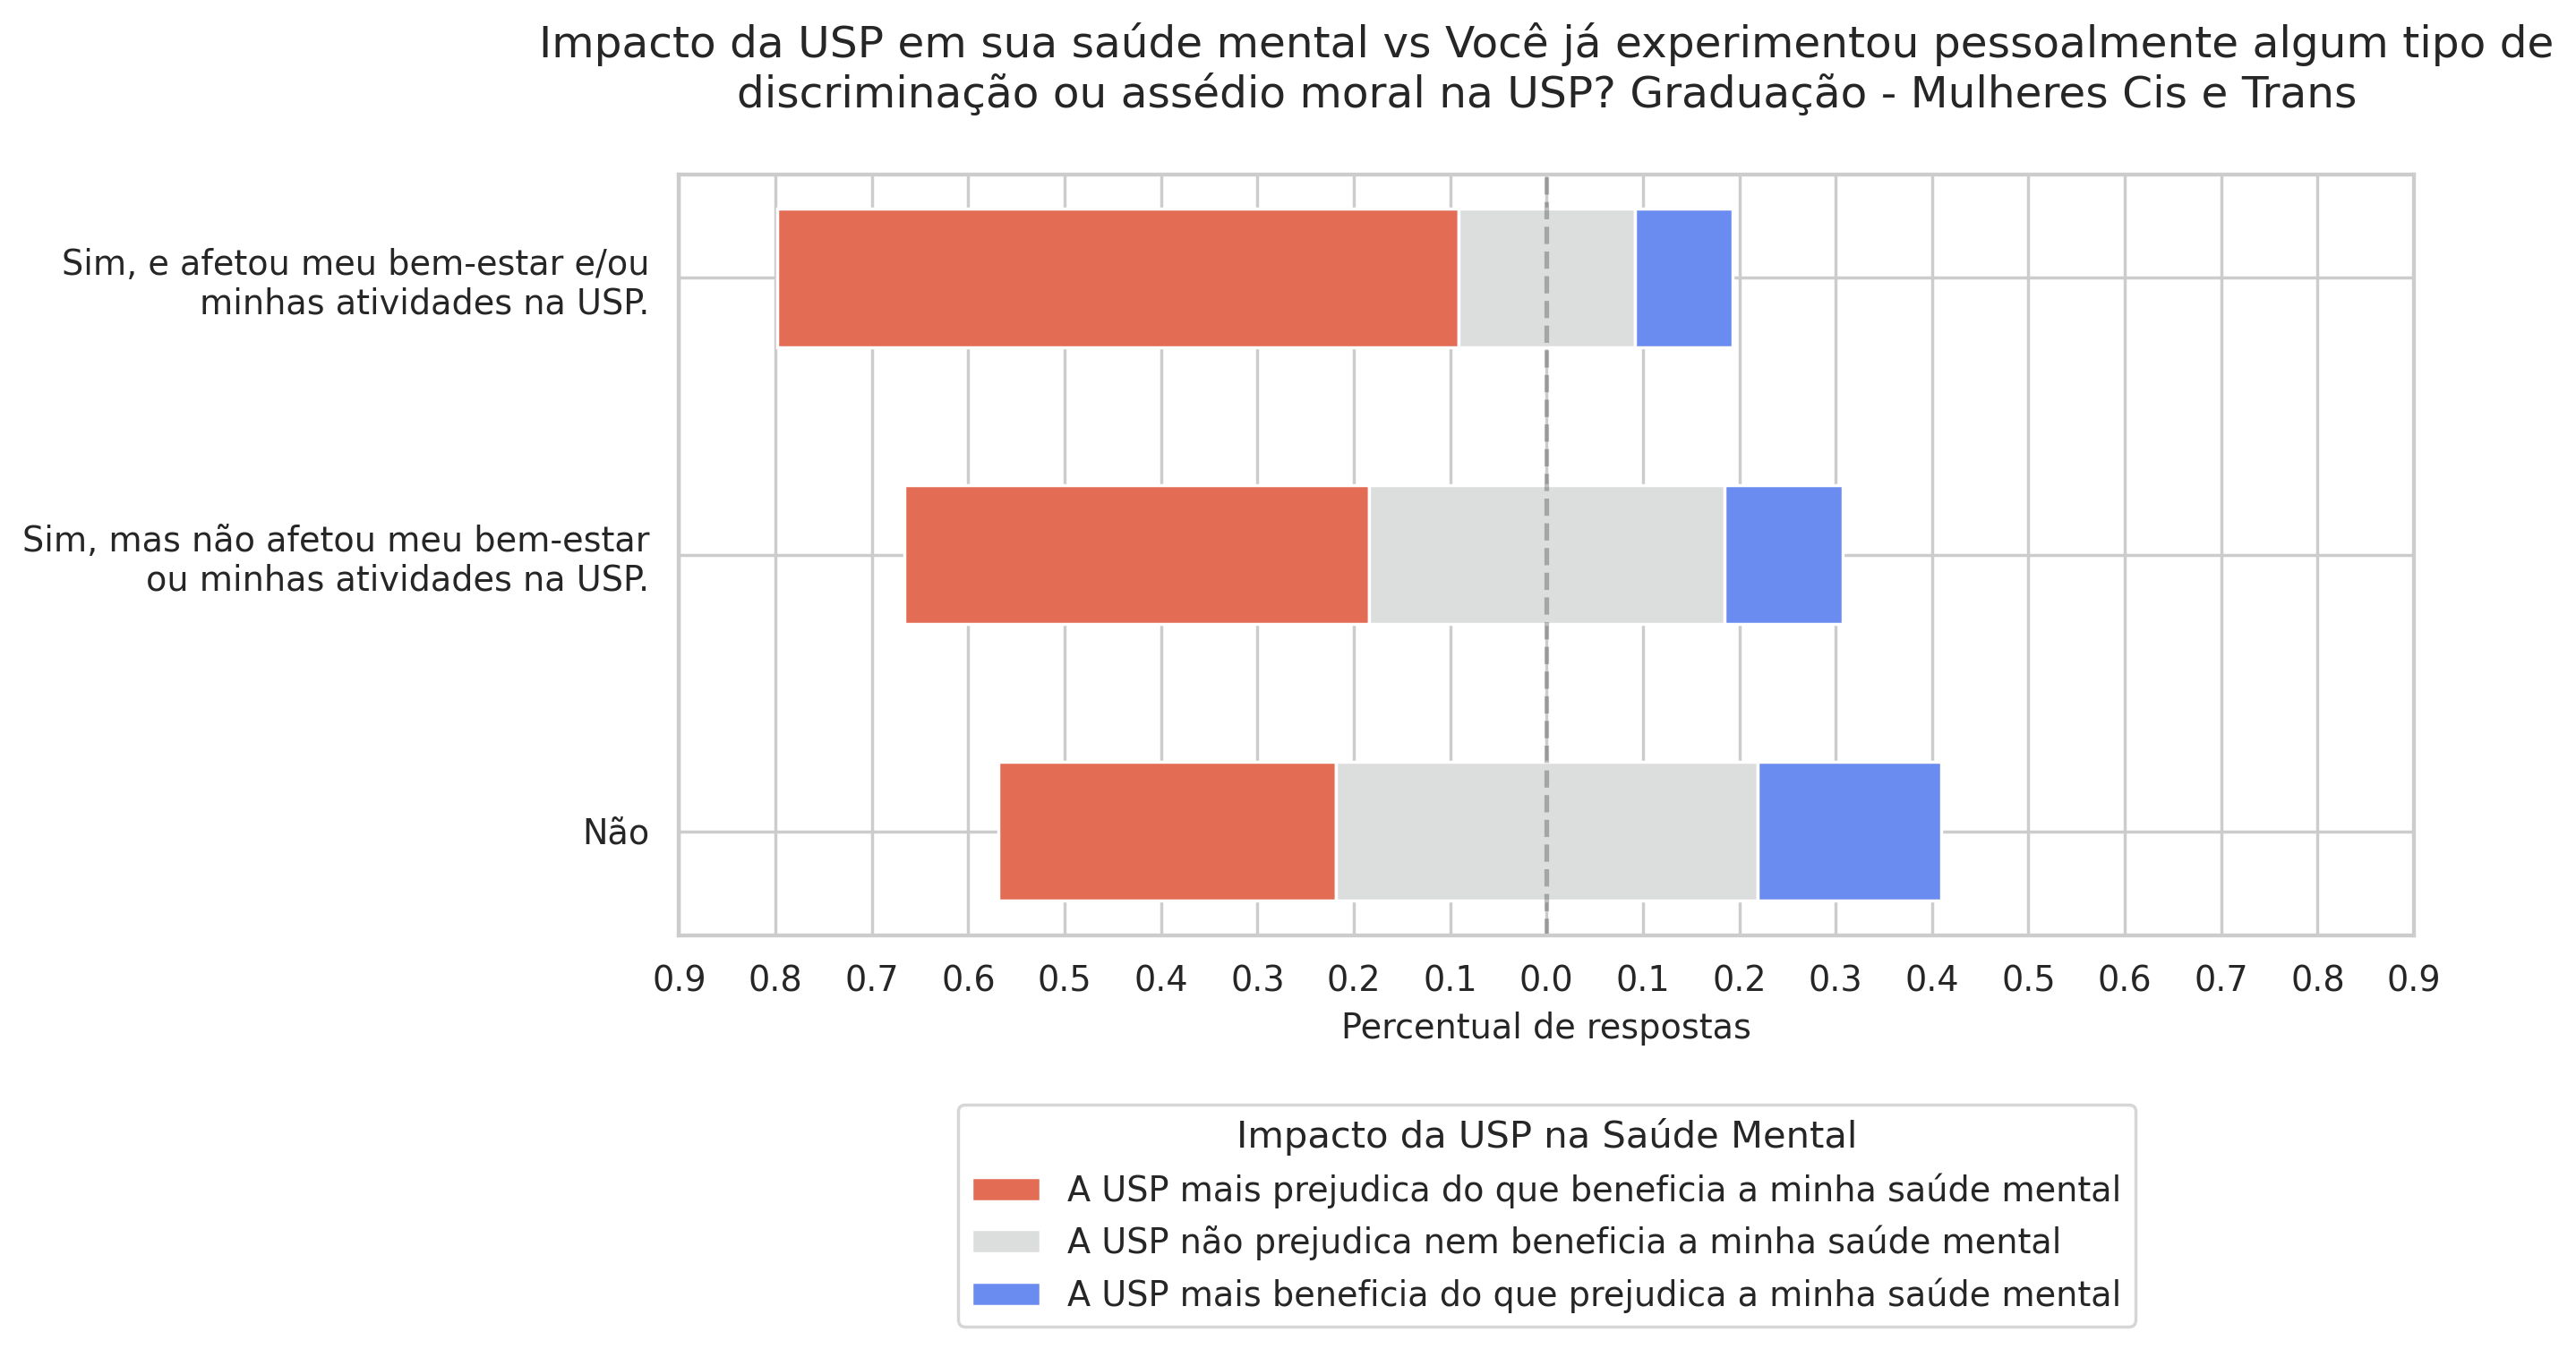

In [ ]:
df = tabcruzada_grad_a1m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim, e afetou meu bem-estar e/ou minhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Você já experimentou pessoalmente algum tipo de\ndiscriminação ou assédio moral na USP? Graduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar\nou minhas atividades na USP.','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
cores = ['royalblue', 'cornflowerblue', 'lightsteelblue']
cmap = plt.cm.colors.ListedColormap(cores)

ax = condicao_mental.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.ylabel('')
plt.xlabel('Percentual')
plt.title('Condição de Saúde Mental por Gênero (docentes)')

ax.invert_yaxis()

legenda = plt.legend(title='Você apresentou alguma condição de saúde mental?', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.savefig('seu_grafico.png')
plt.show()

#### Homens

/tmp/ipykernel_6935/2685295167.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',


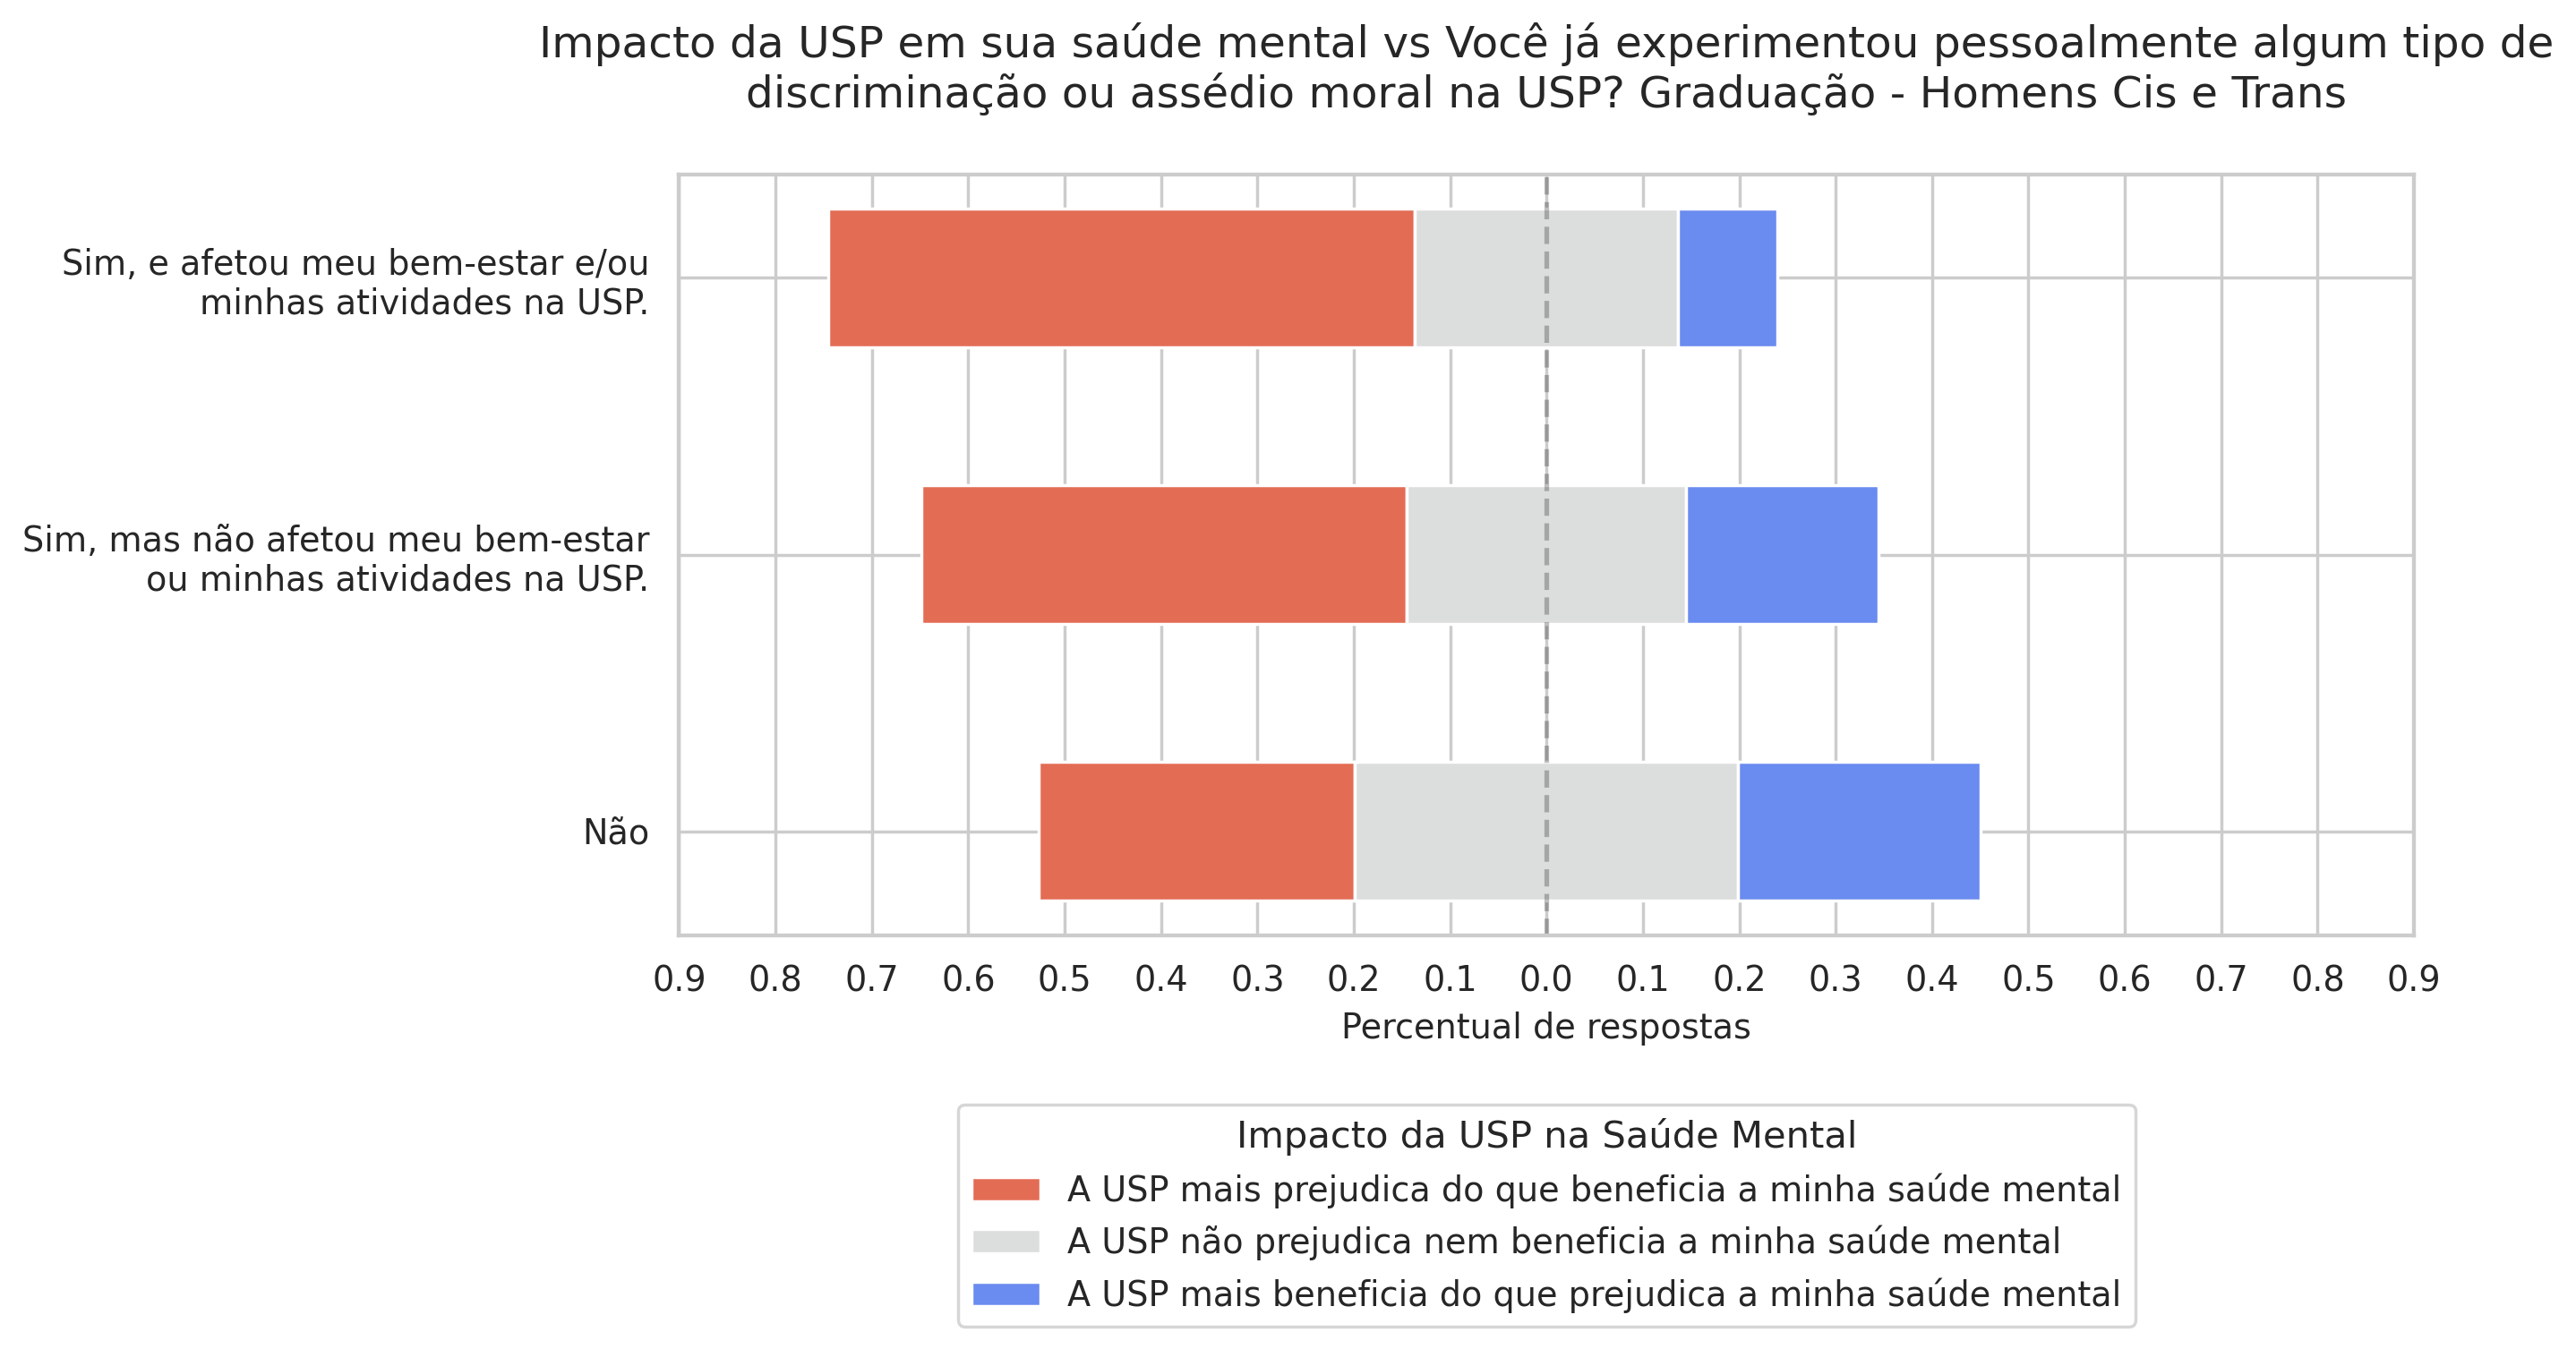

In [ ]:
df = tabcruzada_grad_a1h_float.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim, e afetou meu bem-estar e/ou minhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Você já experimentou pessoalmente algum tipo de\ndiscriminação ou assédio moral na USP? Graduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar\nou minhas atividades na USP.','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 2: Saúde mental vs Recorrência das vivências hostis/discriminatórias

In [ ]:
ordem_recorrencia = ['Mais de dez vezes',
                                         'Entre cinco e dez vezes',
                                         'Entre duas e quatro vezes',
                                         'Uma única vez']

### Tabela cruzada

In [ ]:
tabcruzada_grad_a2m = pd.crosstab(df_grad_mulheres['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a2m = tabcruzada_grad_a2m.astype(float)
tabcruzada_grad_a2m = tabcruzada_grad_a2m.reindex(index=ordem_recorrencia, columns=ordem_saude_mental)

tabcruzada_grad_a2m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                               
Mais de dez vezes                                                                                                                            0.780488            
Entre cinco e dez vezes                                                                                                                      0.706522            
Entre duas e quatro vezes                                                                                                                    0.577236            
Uma única vez                                                                                                                                0.504673            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                                                                                        
Mais de dez vezes                                                                                                                            0.207317                                                                     
Entre cinco e dez vezes                                                                                                                      0.173913                                                                     
Entre duas e quatro vezes                                                                                                                    0.292683                                                                     
Uma única vez                                                                                                                                0.317757                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Quantas vezes ocorreram situações desse tipo, d...                                                                                                              
Mais de dez vezes                                                                                                                            0.012195           
Entre cinco e dez vezes                                                                                                                      0.119565           
Entre duas e quatro vezes                                                                                                                    0.113821           
Uma única vez                                                                                                                                0.158879

In [ ]:
tabcruzada_grad_a2h = pd.crosstab(df_grad_homens['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a2h = tabcruzada_grad_a2h.astype(float)
tabcruzada_grad_a2h = tabcruzada_grad_a2h.reindex(index=ordem_recorrencia, columns=ordem_saude_mental)

tabcruzada_grad_a2h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                               
Mais de dez vezes                                                                                                                            0.678571            
Entre cinco e dez vezes                                                                                                                      0.555556            
Entre duas e quatro vezes                                                                                                                    0.510490            
Uma única vez                                                                                                                                0.583333            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                                                                                        
Mais de dez vezes                                                                                                                            0.232143                                                                     
Entre cinco e dez vezes                                                                                                                      0.349206                                                                     
Entre duas e quatro vezes                                                                                                                    0.265734                                                                     
Uma única vez                                                                                                                                0.333333                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Quantas vezes ocorreram situações desse tipo, d...                                                                                                              
Mais de dez vezes                                                                                                                            0.089286           
Entre cinco e dez vezes                                                                                                                      0.095238           
Entre duas e quatro vezes                                                                                                                    0.223776           
Uma única vez                                                                                                                                0.083333

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'])

Qui2       p-Valor
Quantas vezes ocorreram situações desse tipo, d...  147.439978  7.770855e-24

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'])

Qui2       p-Valor
Quantas vezes ocorreram situações desse tipo, d...  96.336472  6.427297e-14

### Plot likert

/tmp/ipykernel_6935/2433666619.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Mais de dez vezes',


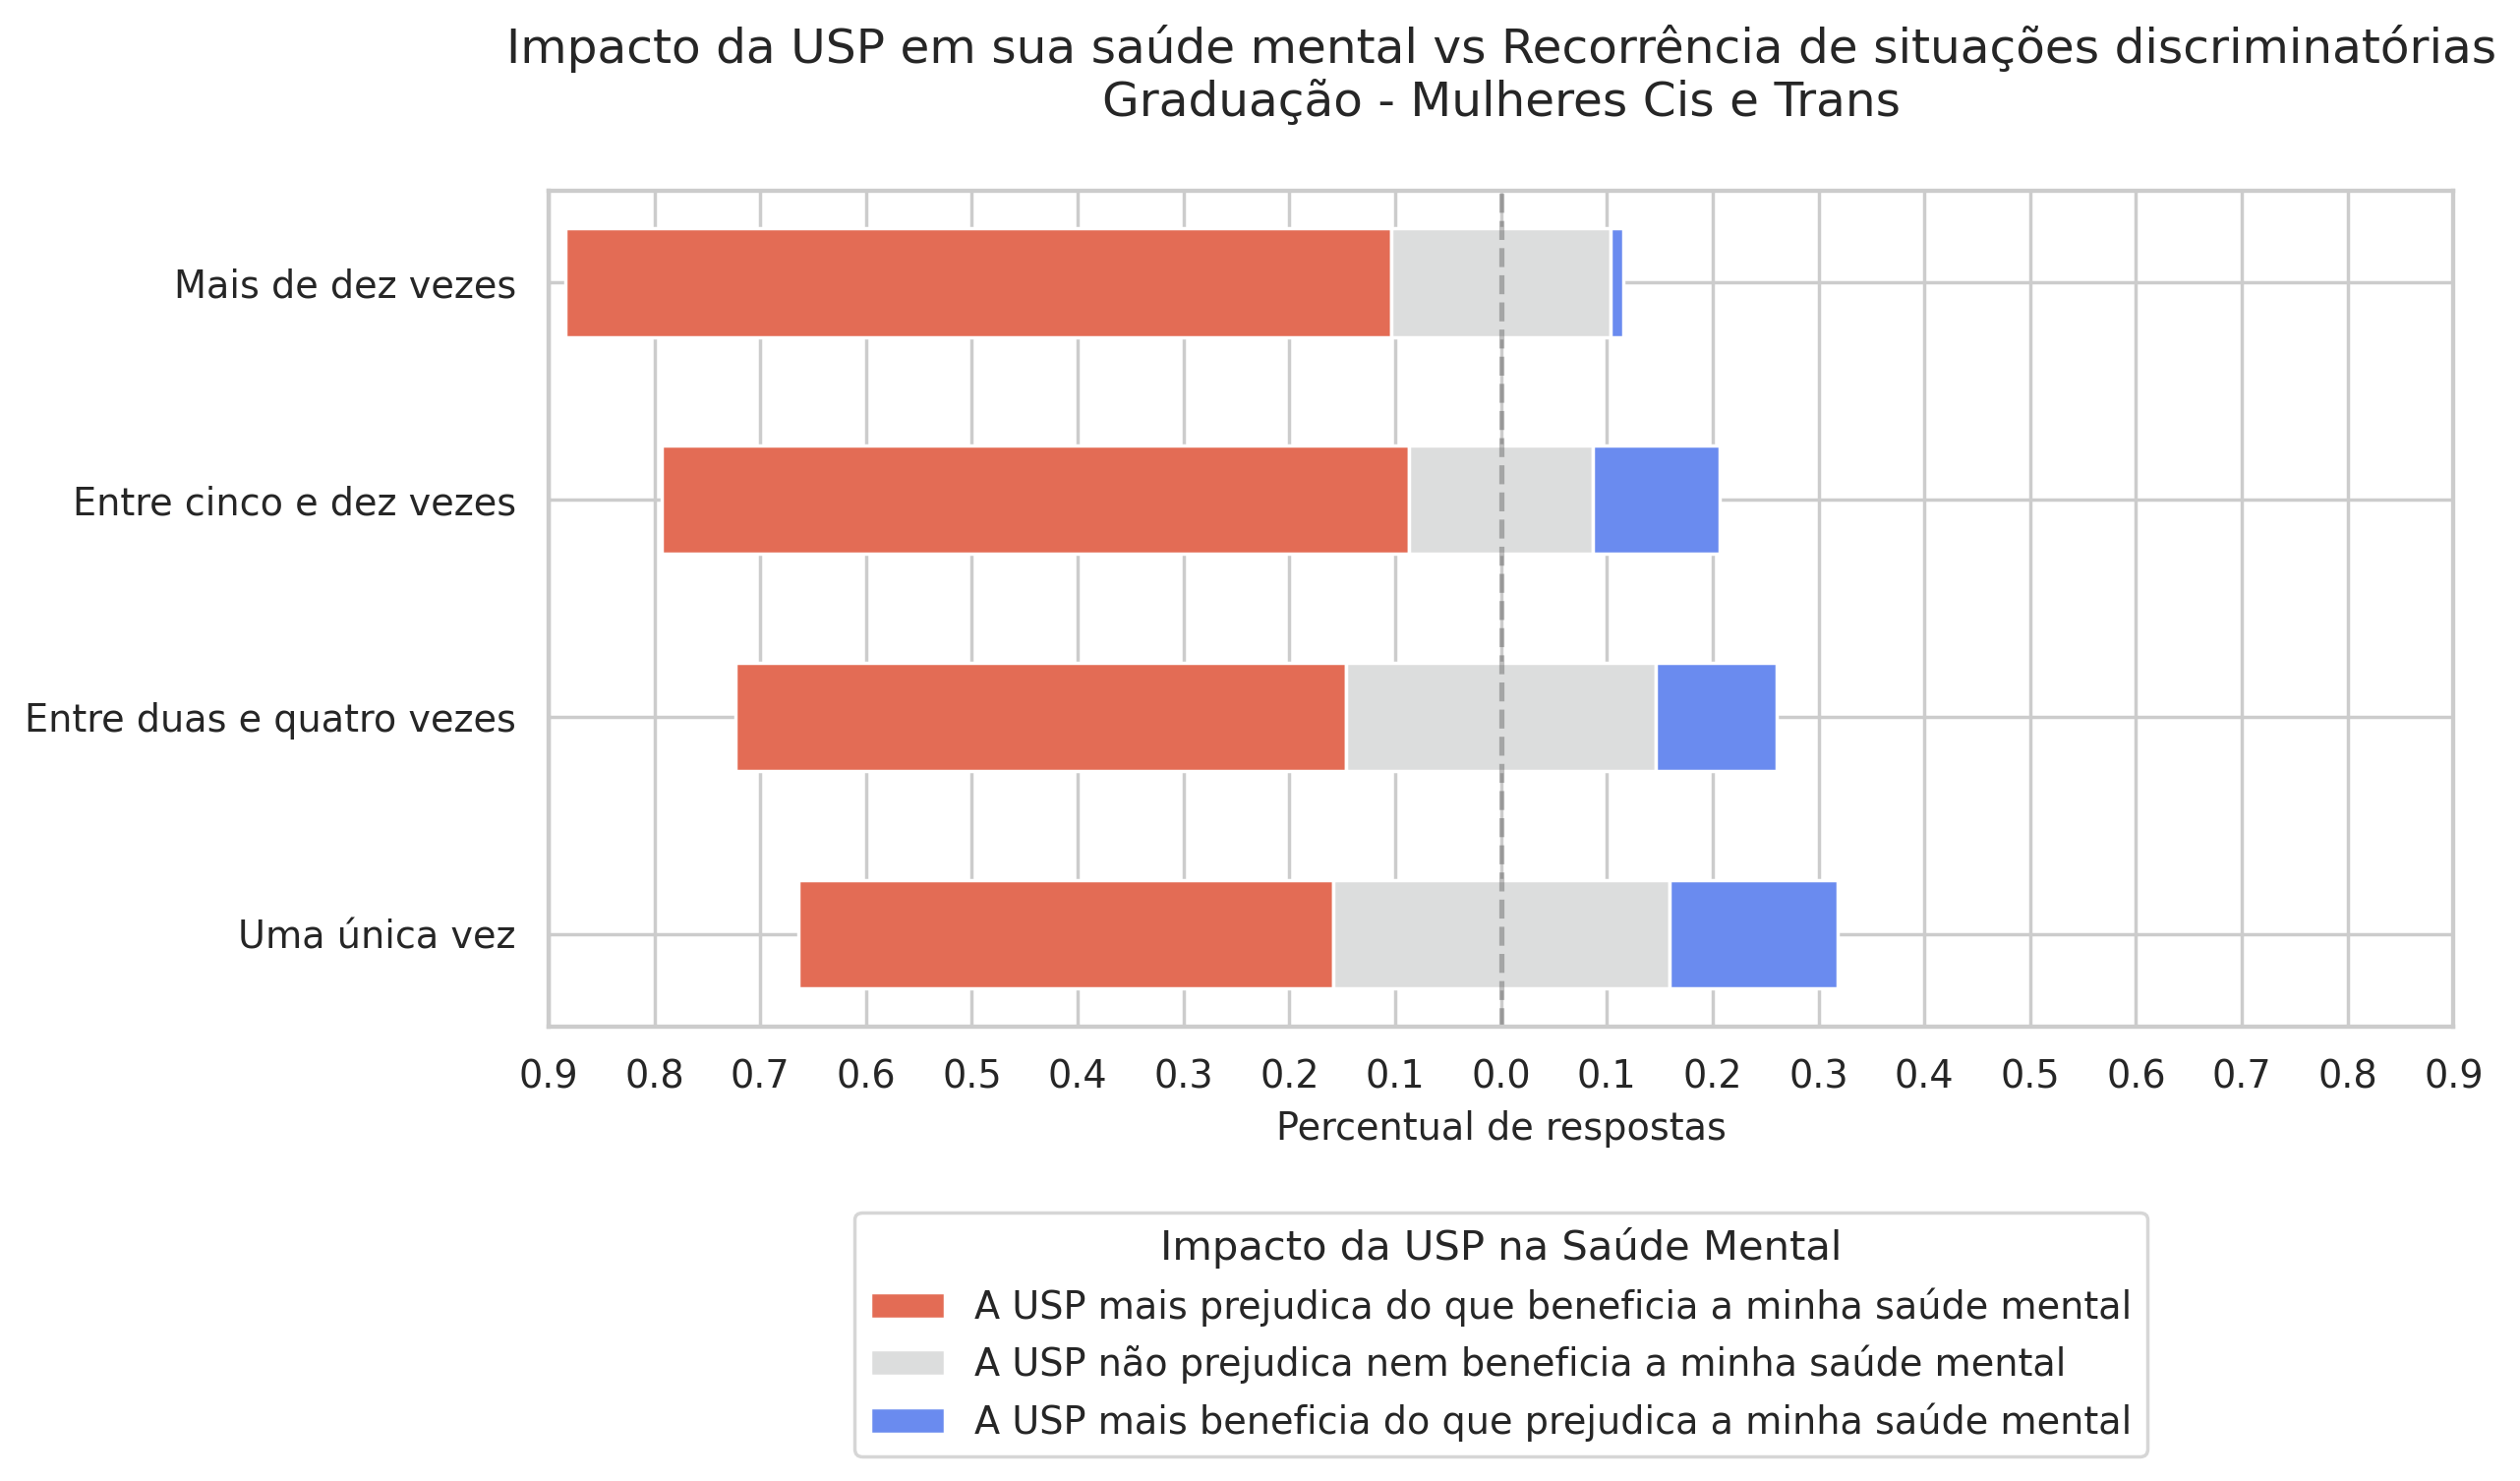

In [ ]:
df = tabcruzada_grad_a2m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Mais de dez vezes',
 'Entre cinco e dez vezes',
 'Entre duas e quatro vezes',
 'Uma única vez'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Recorrência de situações discriminatórias\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Mais de dez vezes',
 'Entre cinco e dez vezes',
 'Entre duas e quatro vezes',
 'Uma única vez'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/206113549.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Mais de dez vezes',


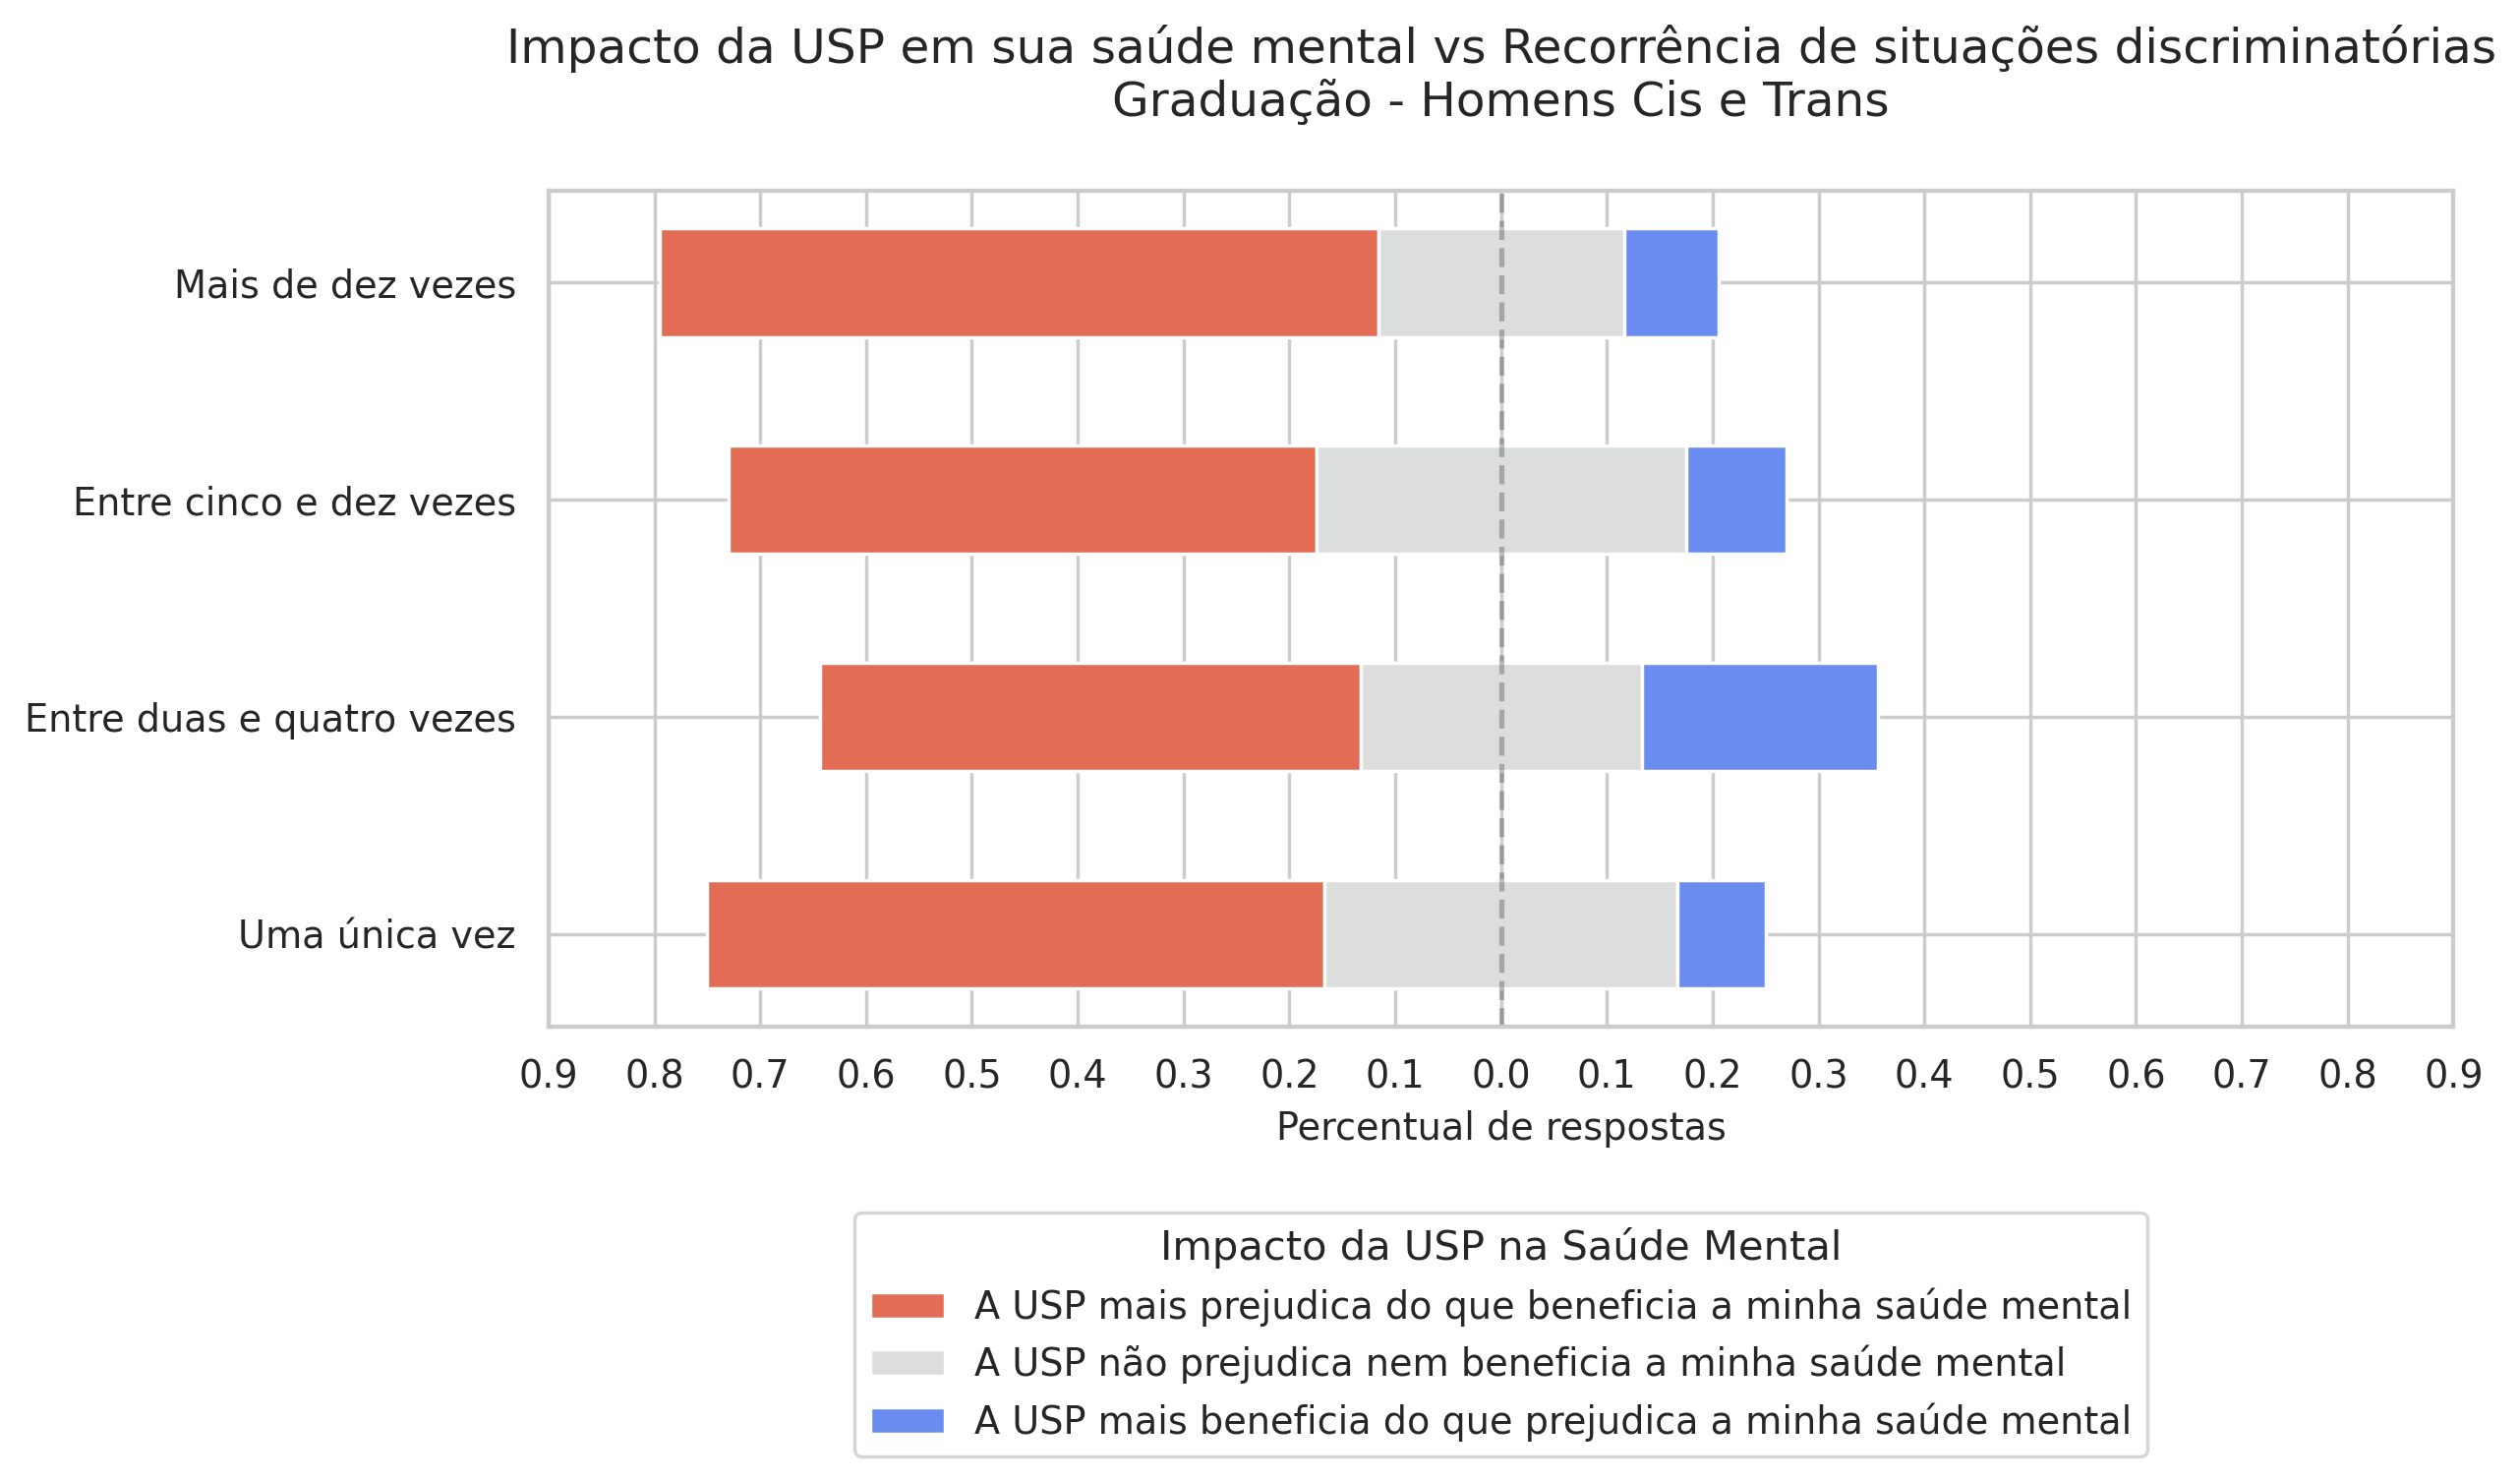

In [ ]:
df = tabcruzada_grad_a2h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Mais de dez vezes',
 'Entre cinco e dez vezes',
 'Entre duas e quatro vezes',
 'Uma única vez'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Recorrência de situações discriminatórias\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Mais de dez vezes',
 'Entre cinco e dez vezes',
 'Entre duas e quatro vezes',
 'Uma única vez'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 3: Saúde mental vs Recorrência das vivências hostis/discriminatórias

In [ ]:
q3_col_order = ['1 Hostil','2', '3', '4', '5 Amigável']

In [ ]:
tabcruzada_grad_a3m = pd.crosstab(df_grad_mulheres['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a3m = tabcruzada_grad_a3m.astype(float)
tabcruzada_grad_a3m = tabcruzada_grad_a3m.reindex(index=['1 Hostil','2', '3', '4', '5 Amigável'], columns=ordem_saude_mental)

tabcruzada_grad_a3m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
A partir da sua experiência dentro do campus da...                                                                                                               
1 Hostil                                                                                                                                     0.906250            
2                                                                                                                                            0.761905            
3                                                                                                                                            0.559611            
4                                                                                                                                            0.372712            
5 Amigável                                                                                                                                   0.230114            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
A partir da sua experiência dentro do campus da...                                                                                                                                                                        
1 Hostil                                                                                                                                     0.078125                                                                     
2                                                                                                                                            0.153439                                                                     
3                                                                                                                                            0.335766                                                                     
4                                                                                                                                            0.427621                                                                     
5 Amigável                                                                                                                                   0.460227                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
A partir da sua experiência dentro do campus da...                                                                                                              
1 Hostil                                                                                                                                     0.015625           
2                                                                                                                                            0.058201           
3                                                                                                                                            0.087591           
4                                                                                                                                            0.176373           
5 Amigável                                                                                                                                   0.301136

In [ ]:
tabcruzada_grad_a3h = pd.crosstab(df_grad_homens['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a3h = tabcruzada_grad_a3h.astype(float)
tabcruzada_grad_a3h = tabcruzada_grad_a3h.reindex(index=['1 Hostil','2', '3', '4', '5 Amigável'], columns=ordem_saude_mental)

tabcruzada_grad_a3h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
A partir da sua experiência dentro do campus da...                                                                                                               
1 Hostil                                                                                                                                     0.808511            
2                                                                                                                                            0.676692            
3                                                                                                                                            0.517460            
4                                                                                                                                            0.323276            
5 Amigável                                                                                                                                   0.217822            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
A partir da sua experiência dentro do campus da...                                                                                                                                                                        
1 Hostil                                                                                                                                     0.127660                                                                     
2                                                                                                                                            0.233083                                                                     
3                                                                                                                                            0.326984                                                                     
4                                                                                                                                            0.433190                                                                     
5 Amigável                                                                                                                                   0.379538                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
A partir da sua experiência dentro do campus da...                                                                                                              
1 Hostil                                                                                                                                     0.042553           
2                                                                                                                                            0.067669           
3                                                                                                                                            0.126984           
4                                                                                                                                            0.219828           
5 Amigável                                                                                                                                   0.399340

### Qui quadrado

In [ ]:
tabcruzada_grad_a3m = pd.crosstab(df_grad_mulheres['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a3m = tabcruzada_grad_a3m.astype(float)
tabcruzada_grad_a3m = tabcruzada_grad_a3m.reindex(index=['1 Hostil','2', '3', '4', '5 Amigável'], columns=ordem_saude_mental)

tabcruzada_grad_a3m
'A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'

'A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'

In [ ]:
qui_quadrado(df_grad_mulheres['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2       p-Valor
Considerando o impacto da USP em sua saúde ment...  262.316077  3.675587e-49

In [ ]:
qui_quadrado(df_grad_homens['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2       p-Valor
Considerando o impacto da USP em sua saúde ment...  192.822788  9.849136e-35

### Plot likert

/tmp/ipykernel_6935/1066686747.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['1 Hostil','2', '3', '4', '5 Amigável'])


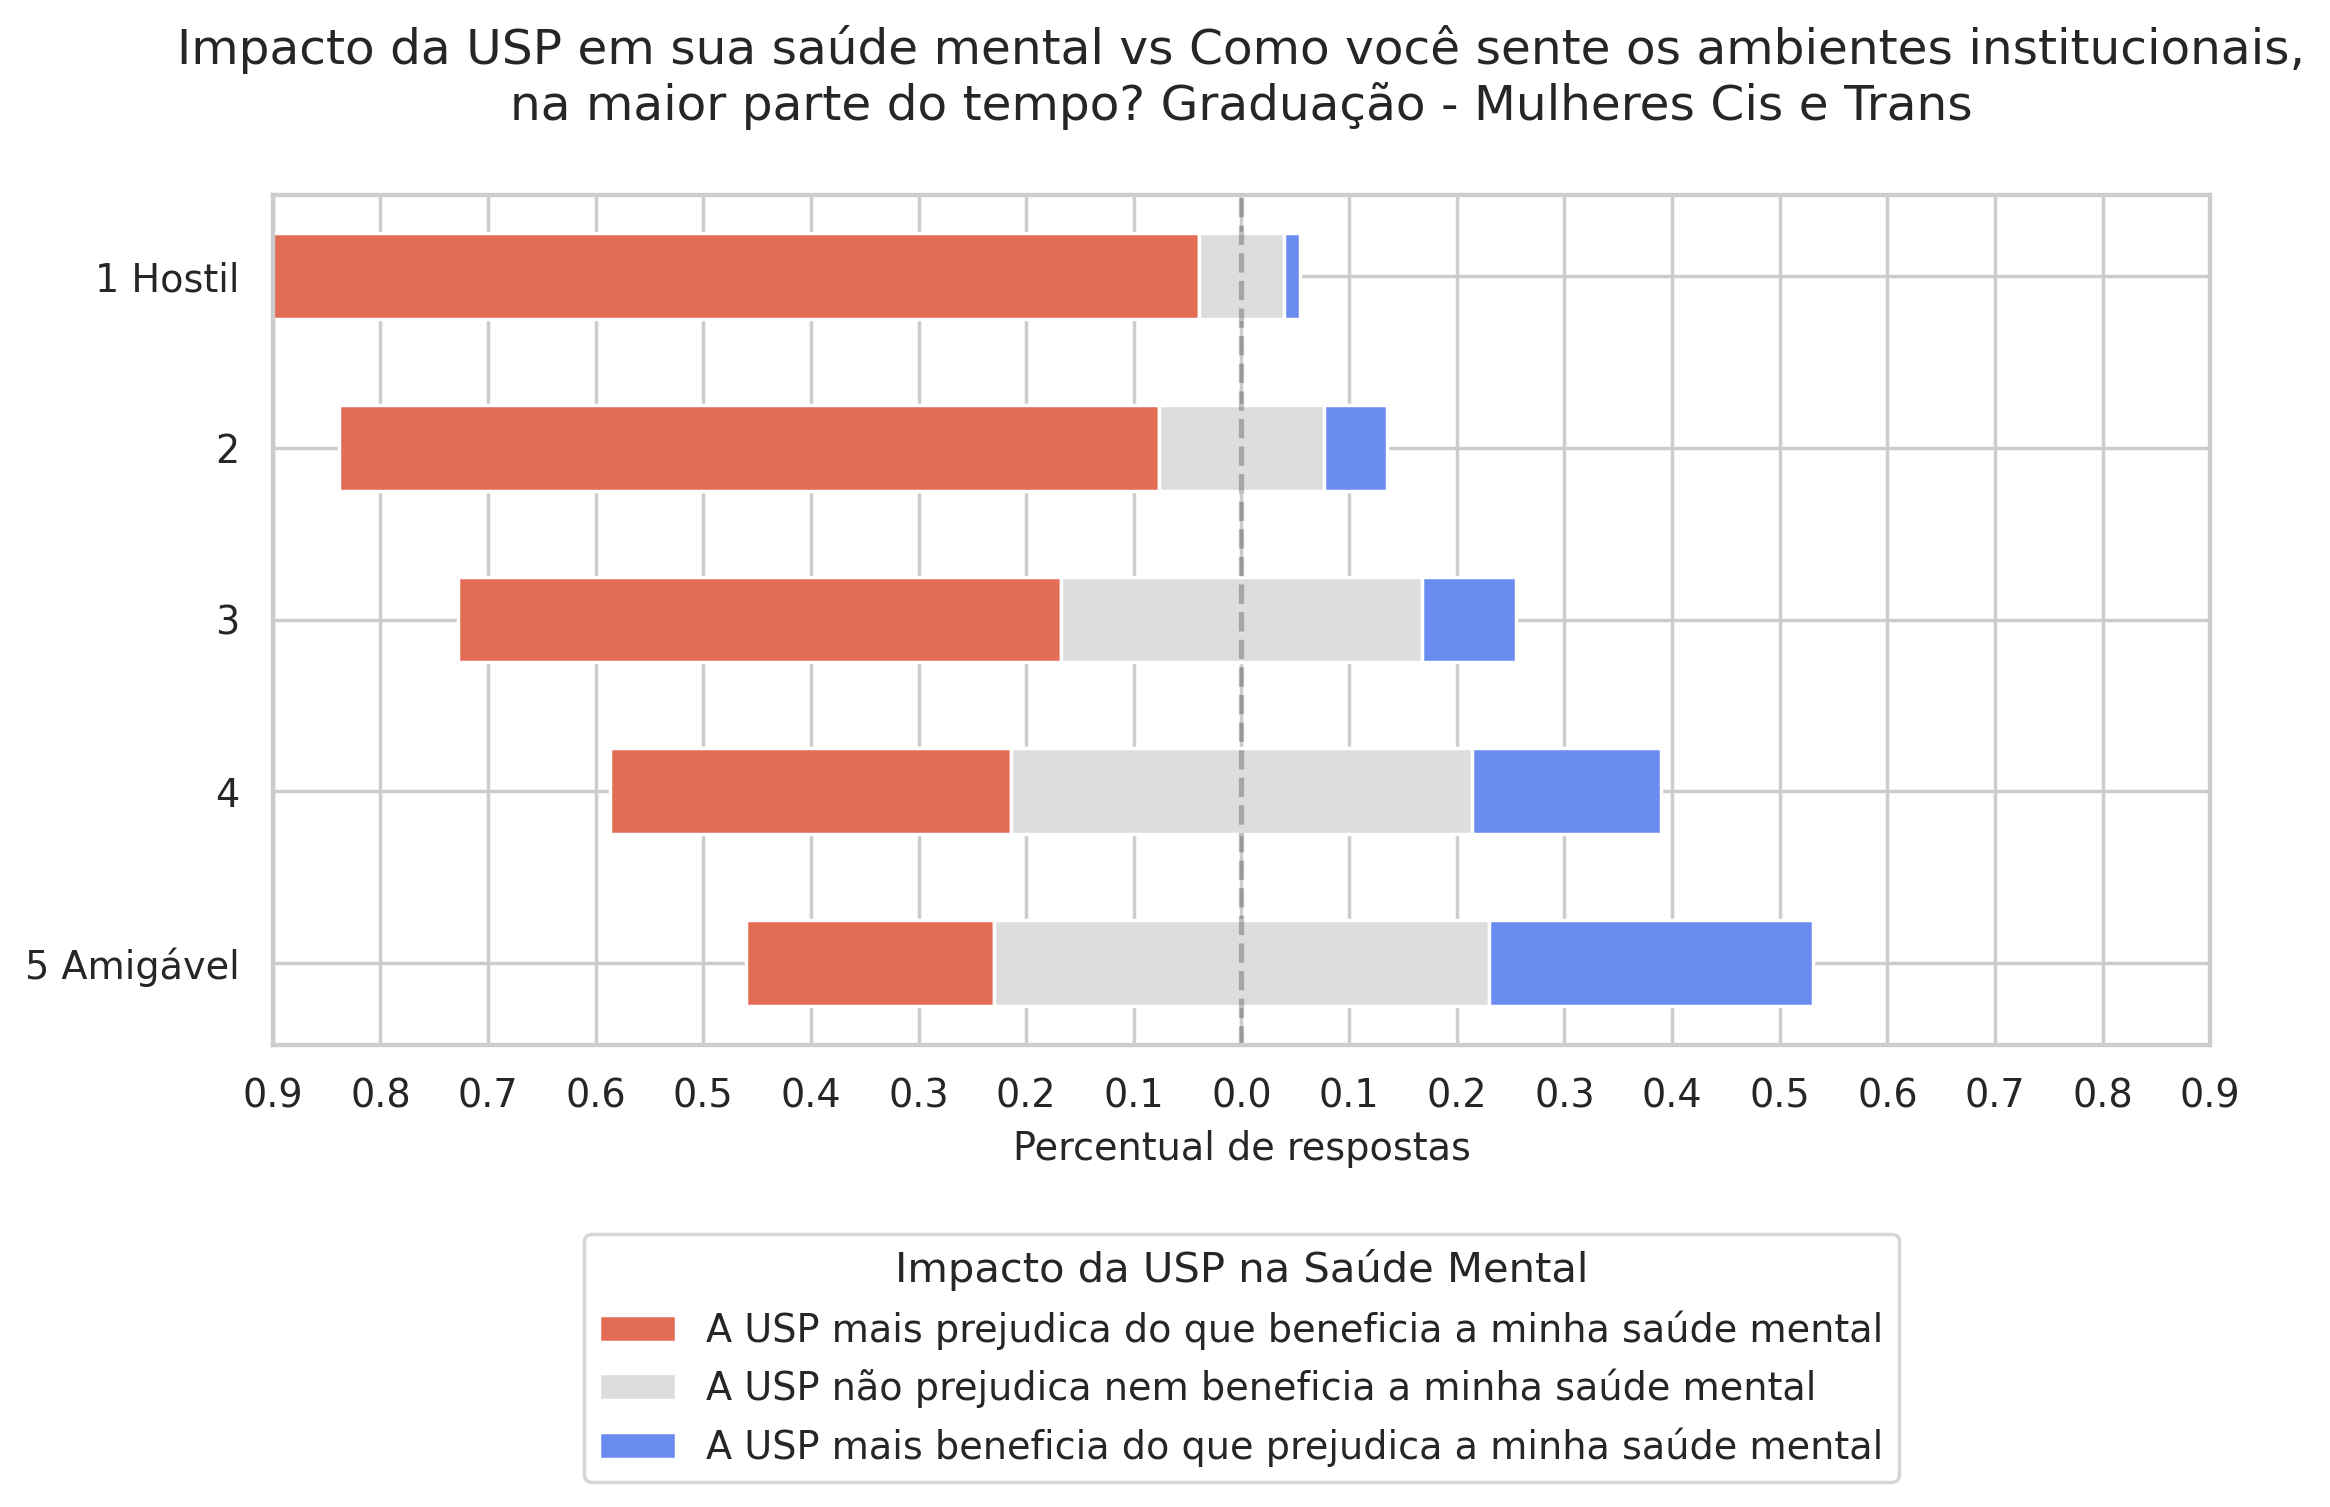

In [ ]:
df = tabcruzada_grad_a3m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['1 Hostil','2', '3', '4', '5 Amigável'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Como você sente os ambientes institucionais,\nna maior parte do tempo? Graduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['1 Hostil','2', '3', '4', '5 Amigável'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/3468031208.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['1 Hostil','2', '3', '4', '5 Amigável'])


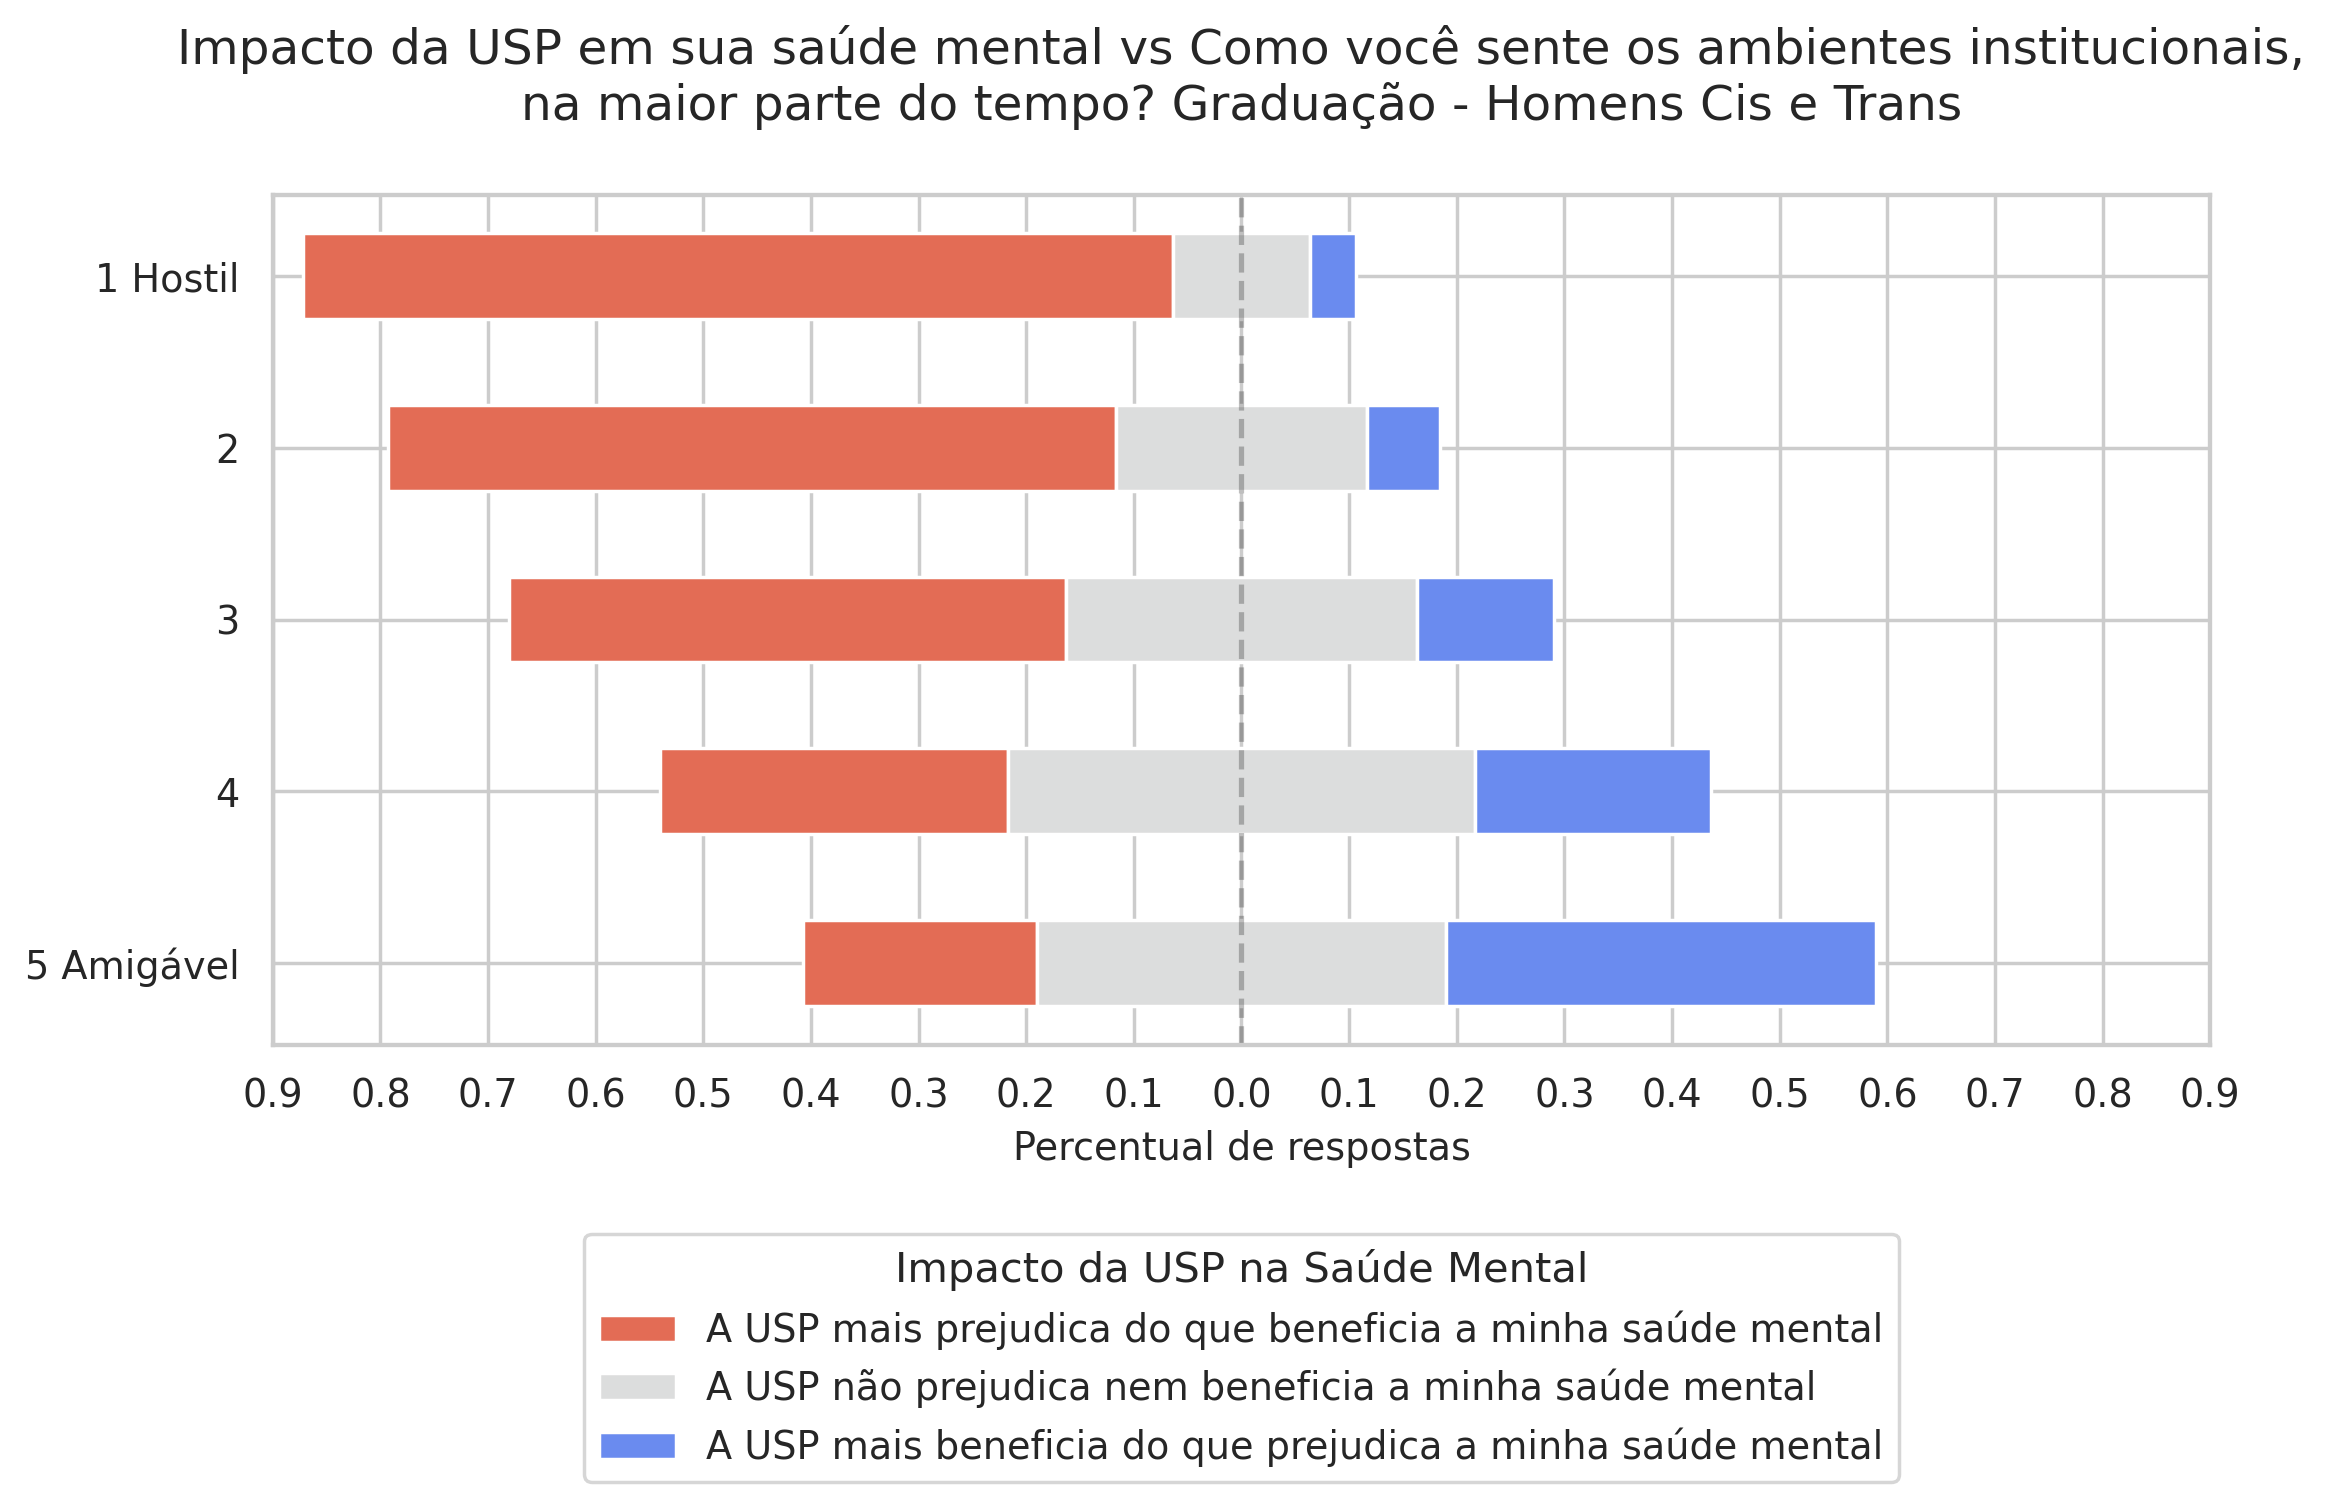

In [ ]:
df = tabcruzada_grad_a3h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['1 Hostil','2', '3', '4', '5 Amigável'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Como você sente os ambientes institucionais,\nna maior parte do tempo? Graduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['1 Hostil','2', '3', '4', '5 Amigável'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 4: Saúde mental vs Recebeu ou recebe bolsa de pesquisa

### Tabela cruzada

In [ ]:
tabcruzada_grad_a4m = pd.crosstab(df_grad_mulheres['Recebeu ou recebe bolsa de pesquisa?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a4m = tabcruzada_grad_a4m.astype(float)
tabcruzada_grad_a4m = tabcruzada_grad_a4m.reindex(index=['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'], columns=ordem_saude_mental)

tabcruzada_grad_a4m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                             
Solicitei e não fui contemplado(a)                                                                                                           0.560000            
Solicitei e fui contemplado(a)                                                                                                               0.526531            
Não                                                                                                                                          0.411879            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                                                                                      
Solicitei e não fui contemplado(a)                                                                                                           0.390000                                                                     
Solicitei e fui contemplado(a)                                                                                                               0.328571                                                                     
Não                                                                                                                                          0.380721                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Recebeu ou recebe bolsa de pesquisa?                                                                                                                            
Solicitei e não fui contemplado(a)                                                                                                           0.050000           
Solicitei e fui contemplado(a)                                                                                                               0.134694           
Não                                                                                                                                          0.184031

In [ ]:
tabcruzada_grad_a4h = pd.crosstab(df_grad_homens['Recebeu ou recebe bolsa de pesquisa?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a4h = tabcruzada_grad_a4h.astype(float)
tabcruzada_grad_a4h = tabcruzada_grad_a4h.reindex(index=['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'], columns=ordem_saude_mental)

tabcruzada_grad_a4h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                             
Solicitei e não fui contemplado(a)                                                                                                           0.435484            
Solicitei e fui contemplado(a)                                                                                                               0.430380            
Não                                                                                                                                          0.389140            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                                                                                      
Solicitei e não fui contemplado(a)                                                                                                           0.435484                                                                     
Solicitei e fui contemplado(a)                                                                                                               0.370253                                                                     
Não                                                                                                                                          0.352941                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Recebeu ou recebe bolsa de pesquisa?                                                                                                                            
Solicitei e não fui contemplado(a)                                                                                                           0.112903           
Solicitei e fui contemplado(a)                                                                                                               0.167722           
Não                                                                                                                                          0.242081

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Recebeu ou recebe bolsa de pesquisa?'])

Qui2  p-Valor
Recebeu ou recebe bolsa de pesquisa?  33.027228  0.00001

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Recebeu ou recebe bolsa de pesquisa?'])

Qui2   p-Valor
Recebeu ou recebe bolsa de pesquisa?  14.526826  0.024274

### Plot likert

/tmp/ipykernel_6935/3858621243.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])


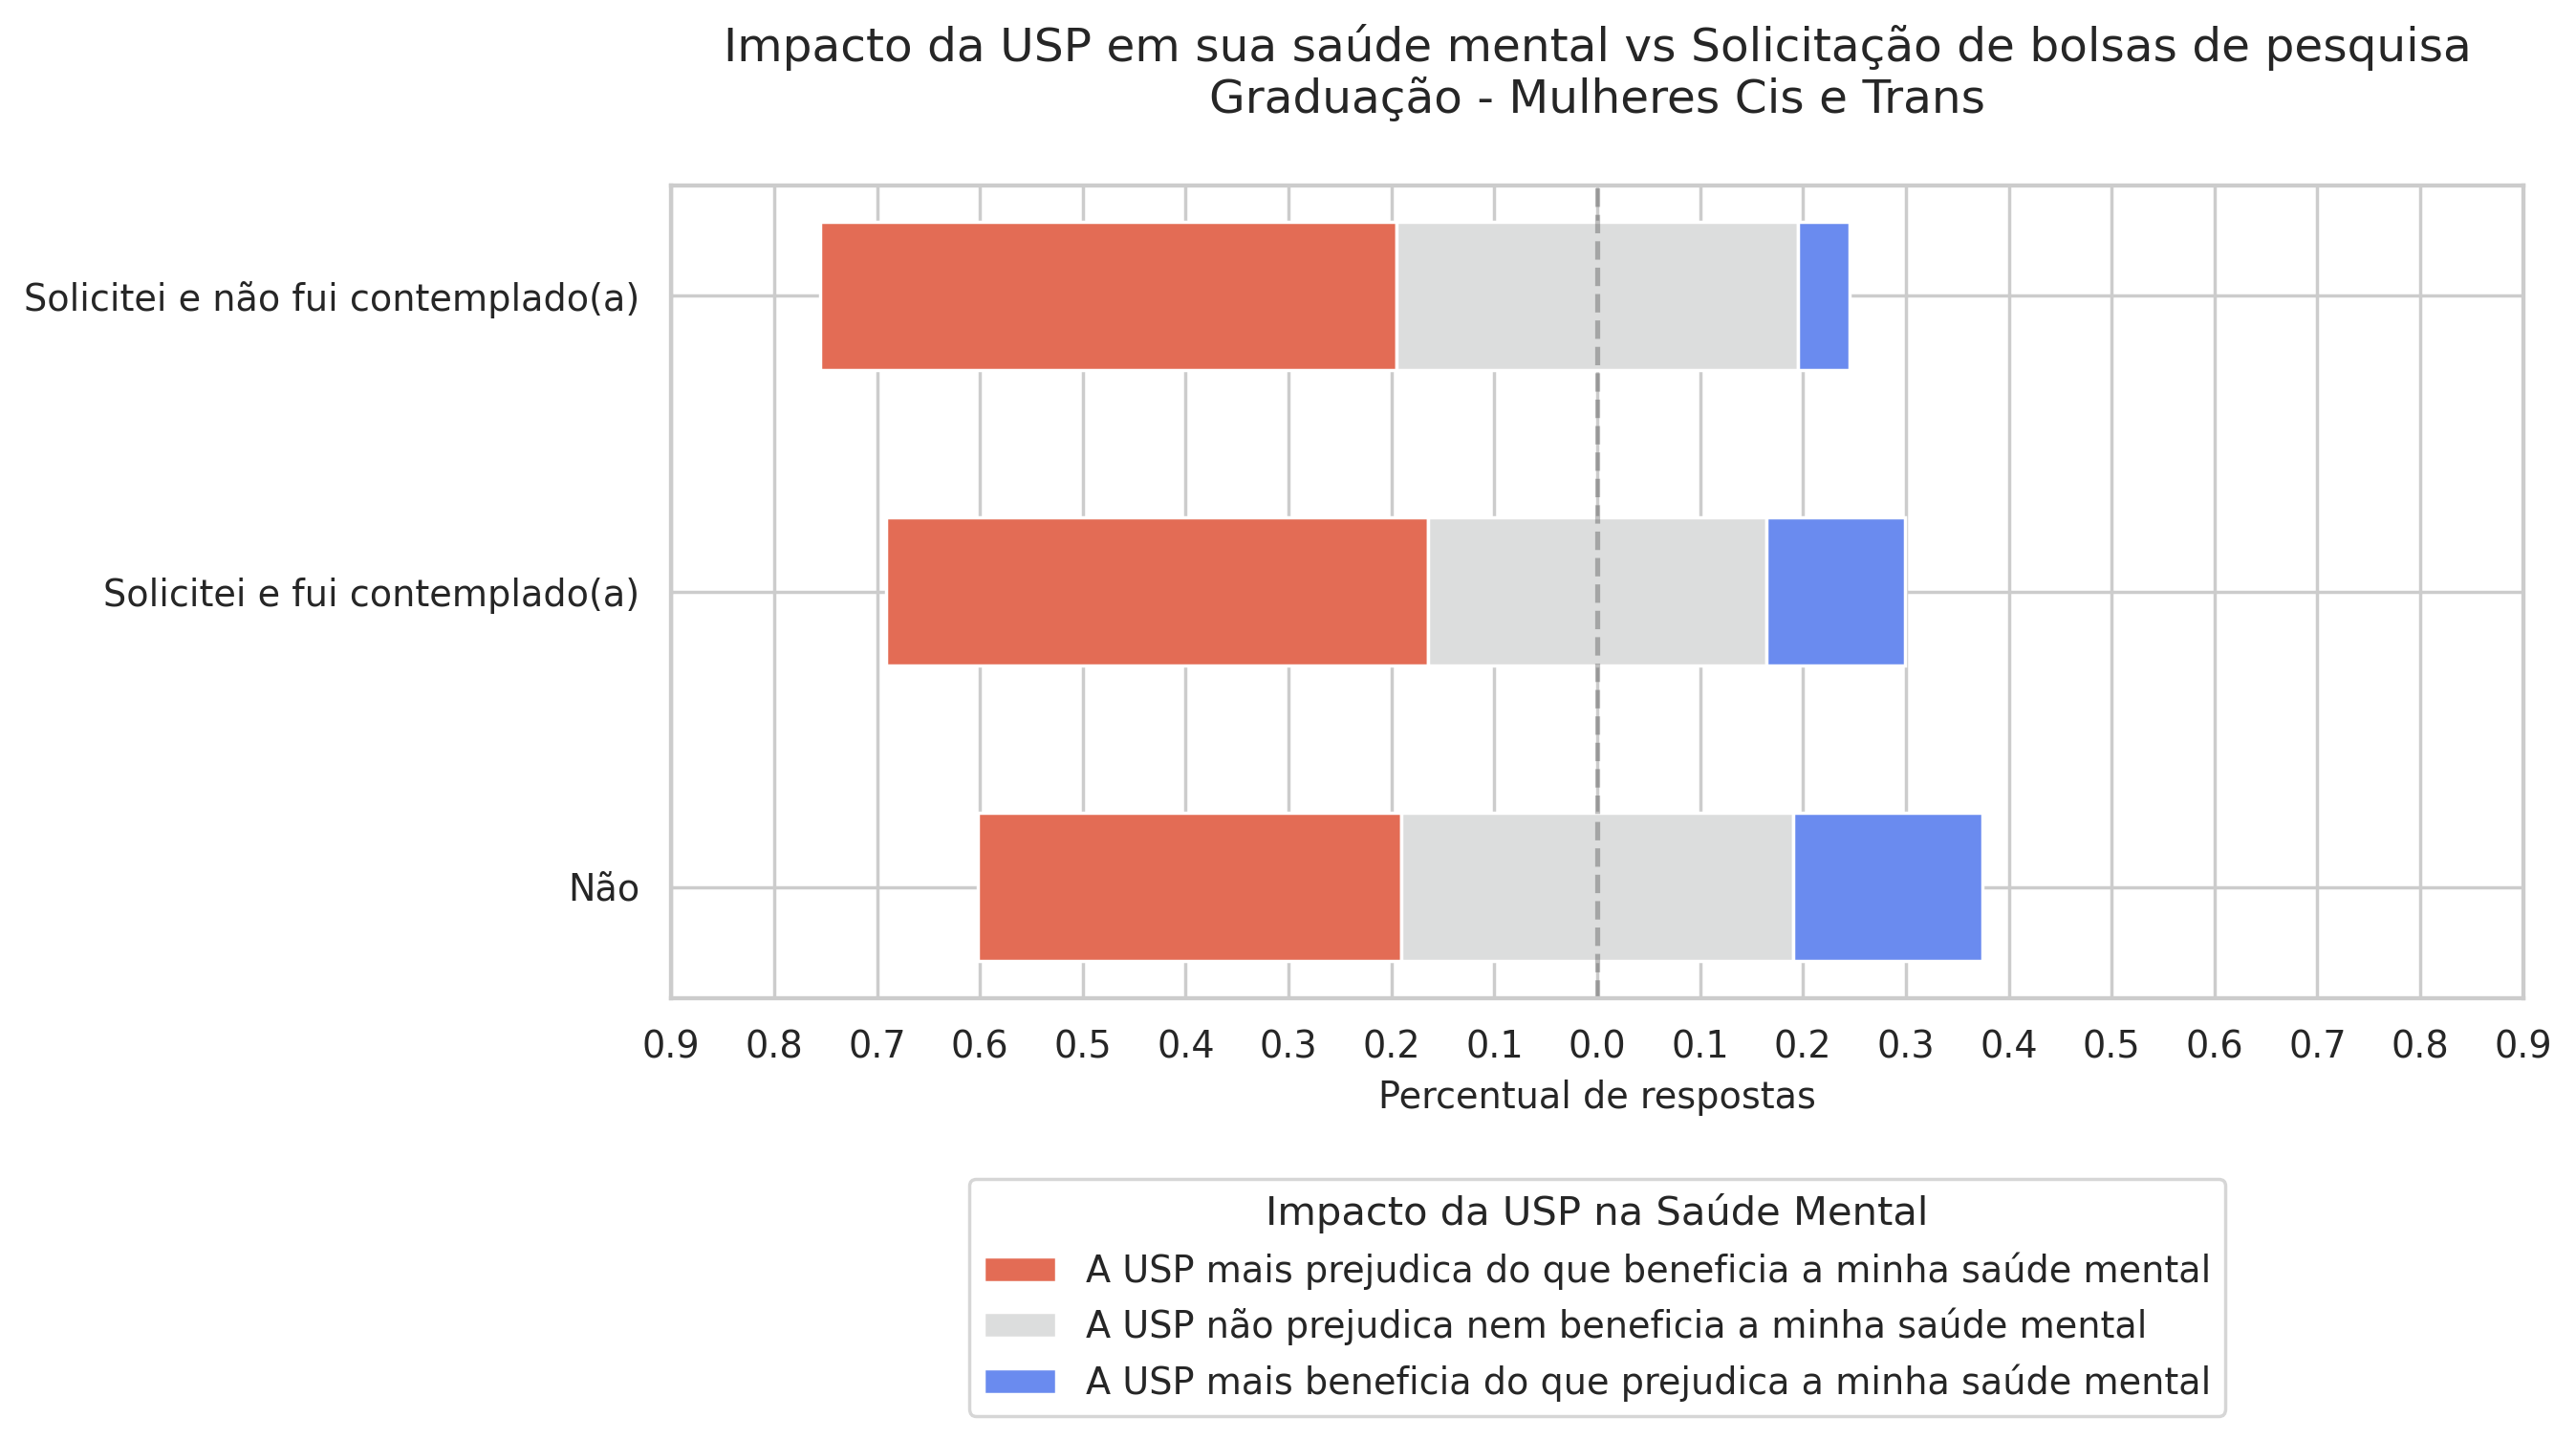

In [ ]:
df = tabcruzada_grad_a4m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Solicitação de bolsas de pesquisa\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/2915752785.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])


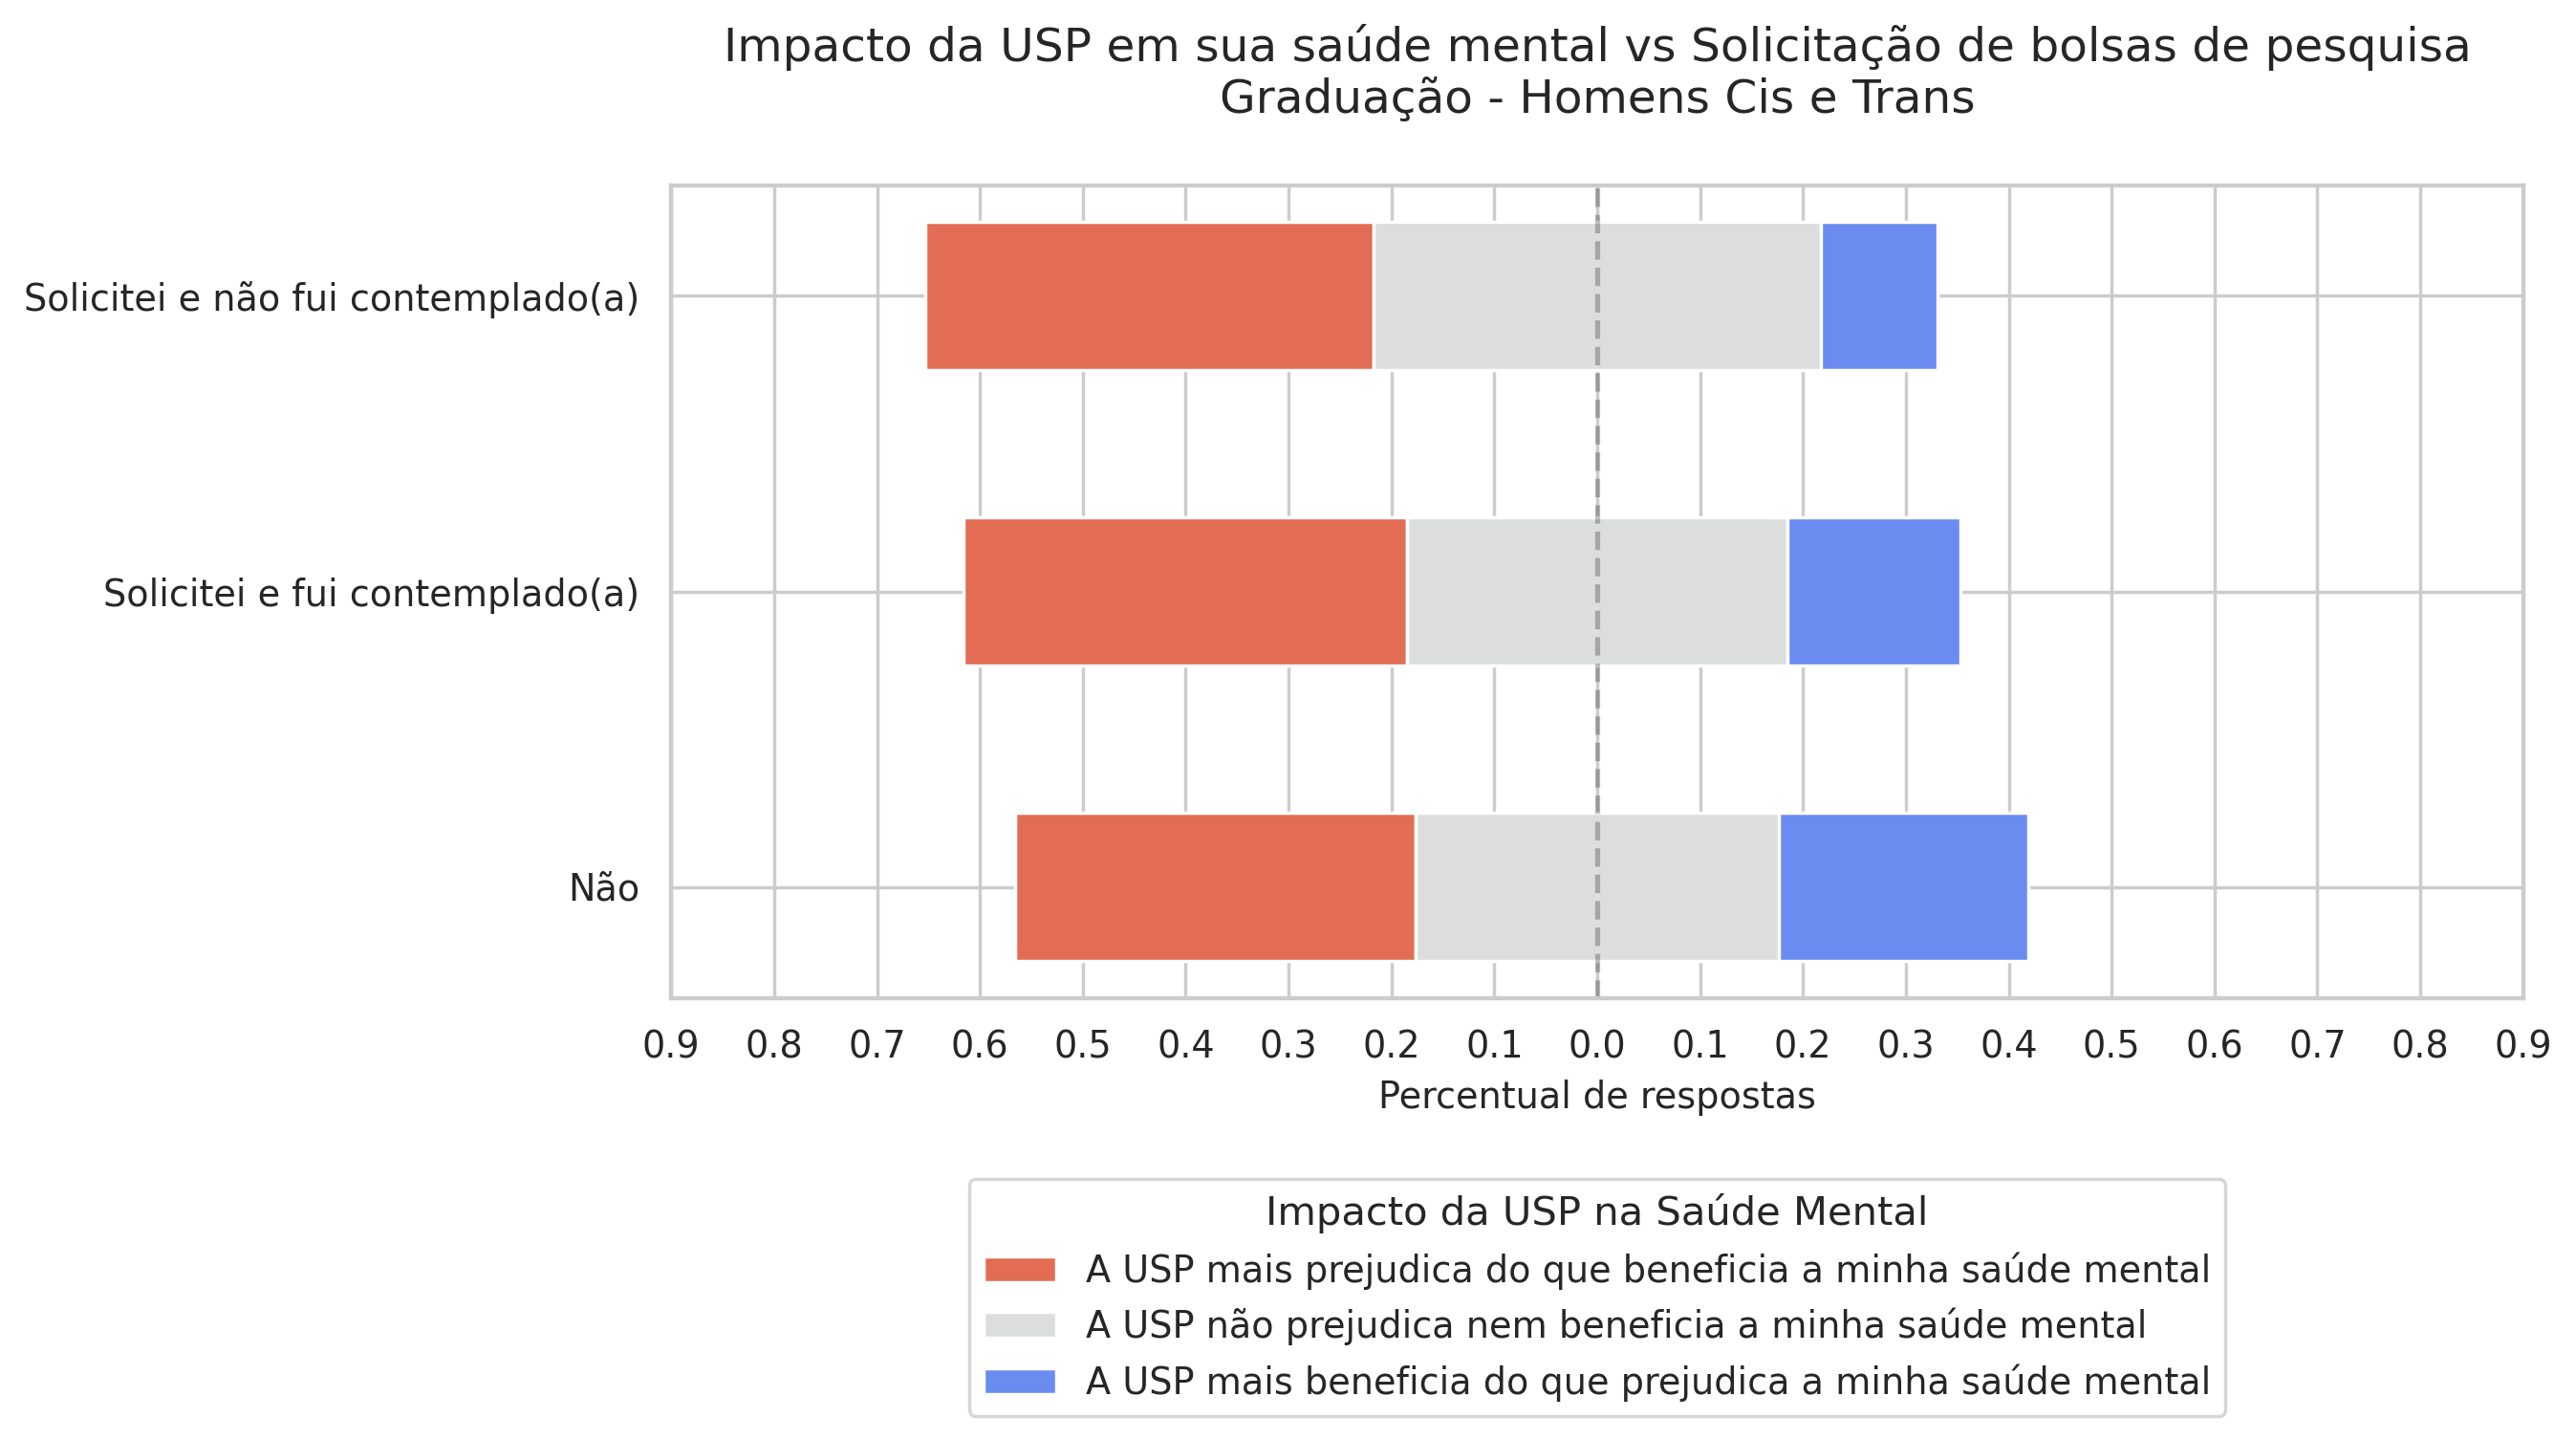

In [ ]:
df = tabcruzada_grad_a4h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Solicitação de bolsas de pesquisa\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 5: Você já pensou em deixar a USP? vs Impacto da USP na Saúde Mental.

### Tabela Cruzada

In [ ]:
tabcruzada_grad_a5m = pd.crosstab(df_grad_mulheres['Em algum momento você pensou em deixar a USP?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a5m = tabcruzada_grad_a5m.astype(float)
tabcruzada_grad_a5m = tabcruzada_grad_a5m.reindex(index=['Sim', 'Não'], columns=ordem_saude_mental)

tabcruzada_grad_a1m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você já experimentou pessoalmente algum tipo de...                                                                                                               
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.707042            
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.482051            
Não                                                                                                                                          0.350350            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você já experimentou pessoalmente algum tipo de...                                                                                                                                                                        
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.183099                                                                     
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.369231                                                                     
Não                                                                                                                                          0.437437                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você já experimentou pessoalmente algum tipo de...                                                                                                              
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.101408           
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.123077           
Não                                                                                                                                          0.191191

In [ ]:
tabcruzada_grad_a5h = pd.crosstab(df_grad_homens['Em algum momento você pensou em deixar a USP?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')

tabcruzada_grad_a5h = tabcruzada_grad_a5h.astype(float)
tabcruzada_grad_a5h = tabcruzada_grad_a5h.reindex(index=['Sim', 'Não'], columns=ordem_saude_mental)

tabcruzada_grad_a5h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Em algum momento você pensou em deixar a USP?                                                                                                                    
Sim                                                                                                                                          0.580920            
Não                                                                                                                                          0.239264            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Em algum momento você pensou em deixar a USP?                                                                                                                                                                             
Sim                                                                                                                                          0.286201                                                                     
Não                                                                                                                                          0.427914                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Em algum momento você pensou em deixar a USP?                                                                                                                   
Sim                                                                                                                                          0.115843           
Não                                                                                                                                          0.311350

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Em algum momento você pensou em deixar a USP?'])

Qui2       p-Valor
Em algum momento você pensou em deixar a USP?  202.27433  6.223955e-41

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Em algum momento você pensou em deixar a USP?'])

Qui2       p-Valor
Em algum momento você pensou em deixar a USP?  163.203168  1.241346e-32

### Plot likert

/tmp/ipykernel_6935/2670756330.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim', 'Não'])


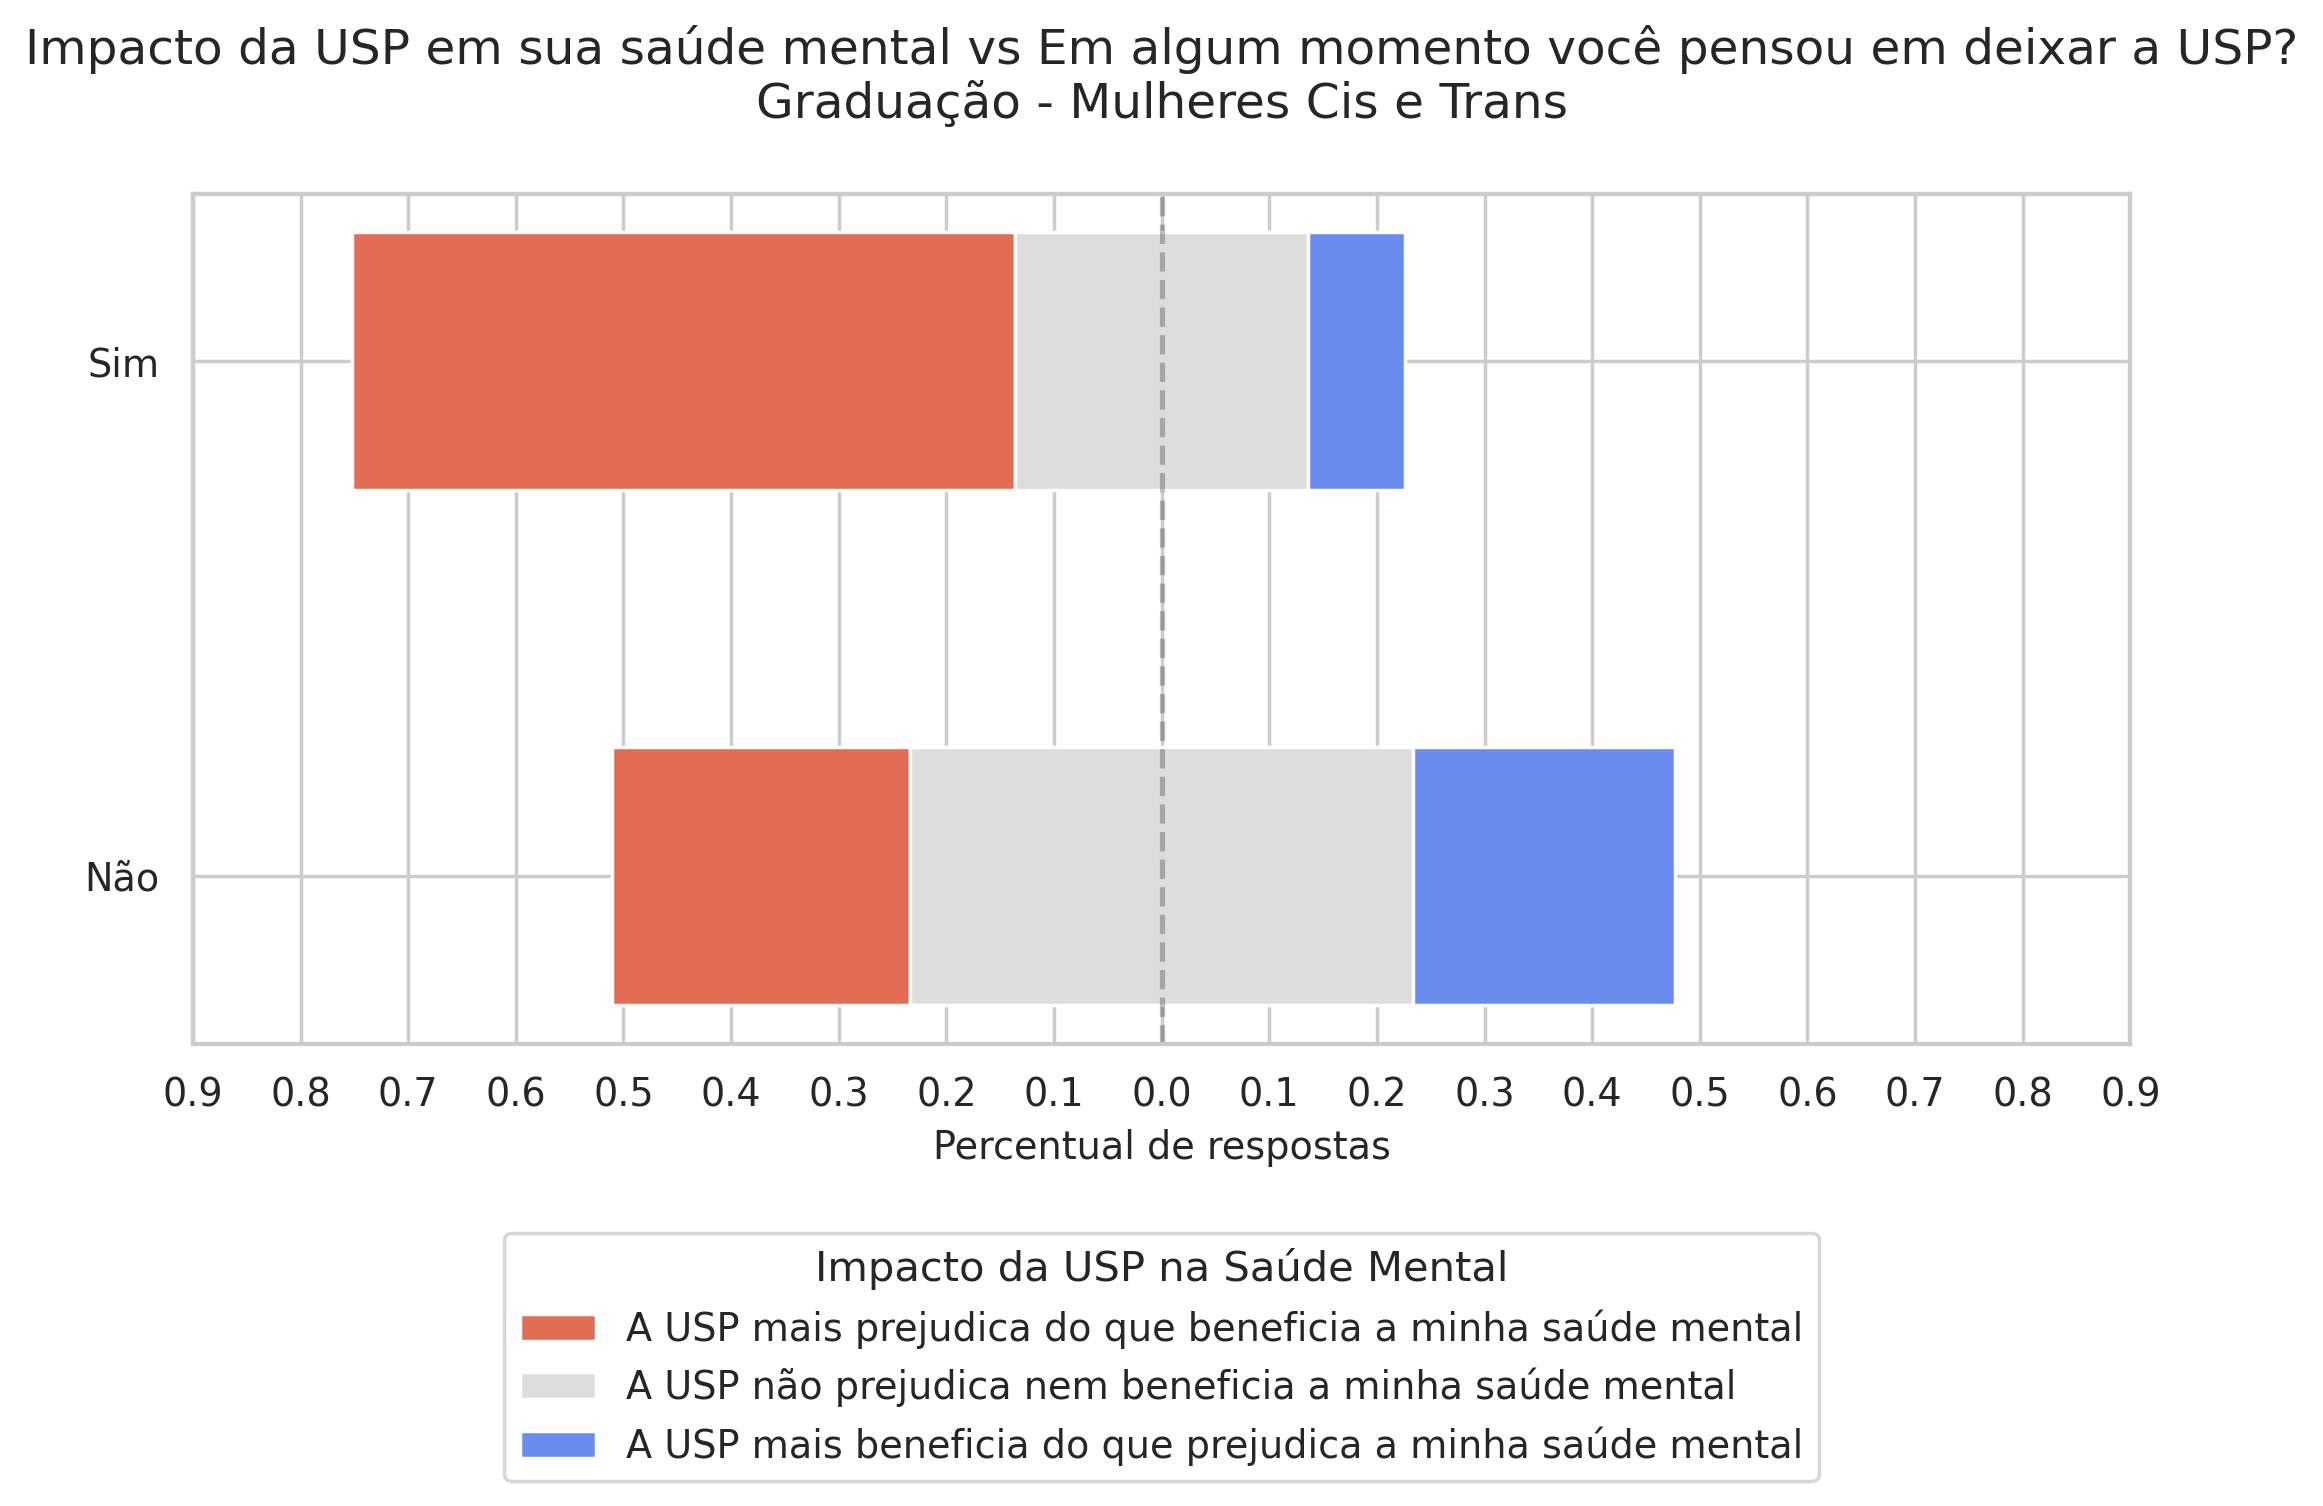

In [ ]:
df = tabcruzada_grad_a5m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim', 'Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Em algum momento você pensou em deixar a USP?\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Sim', 'Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/3082405291.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim', 'Não'])


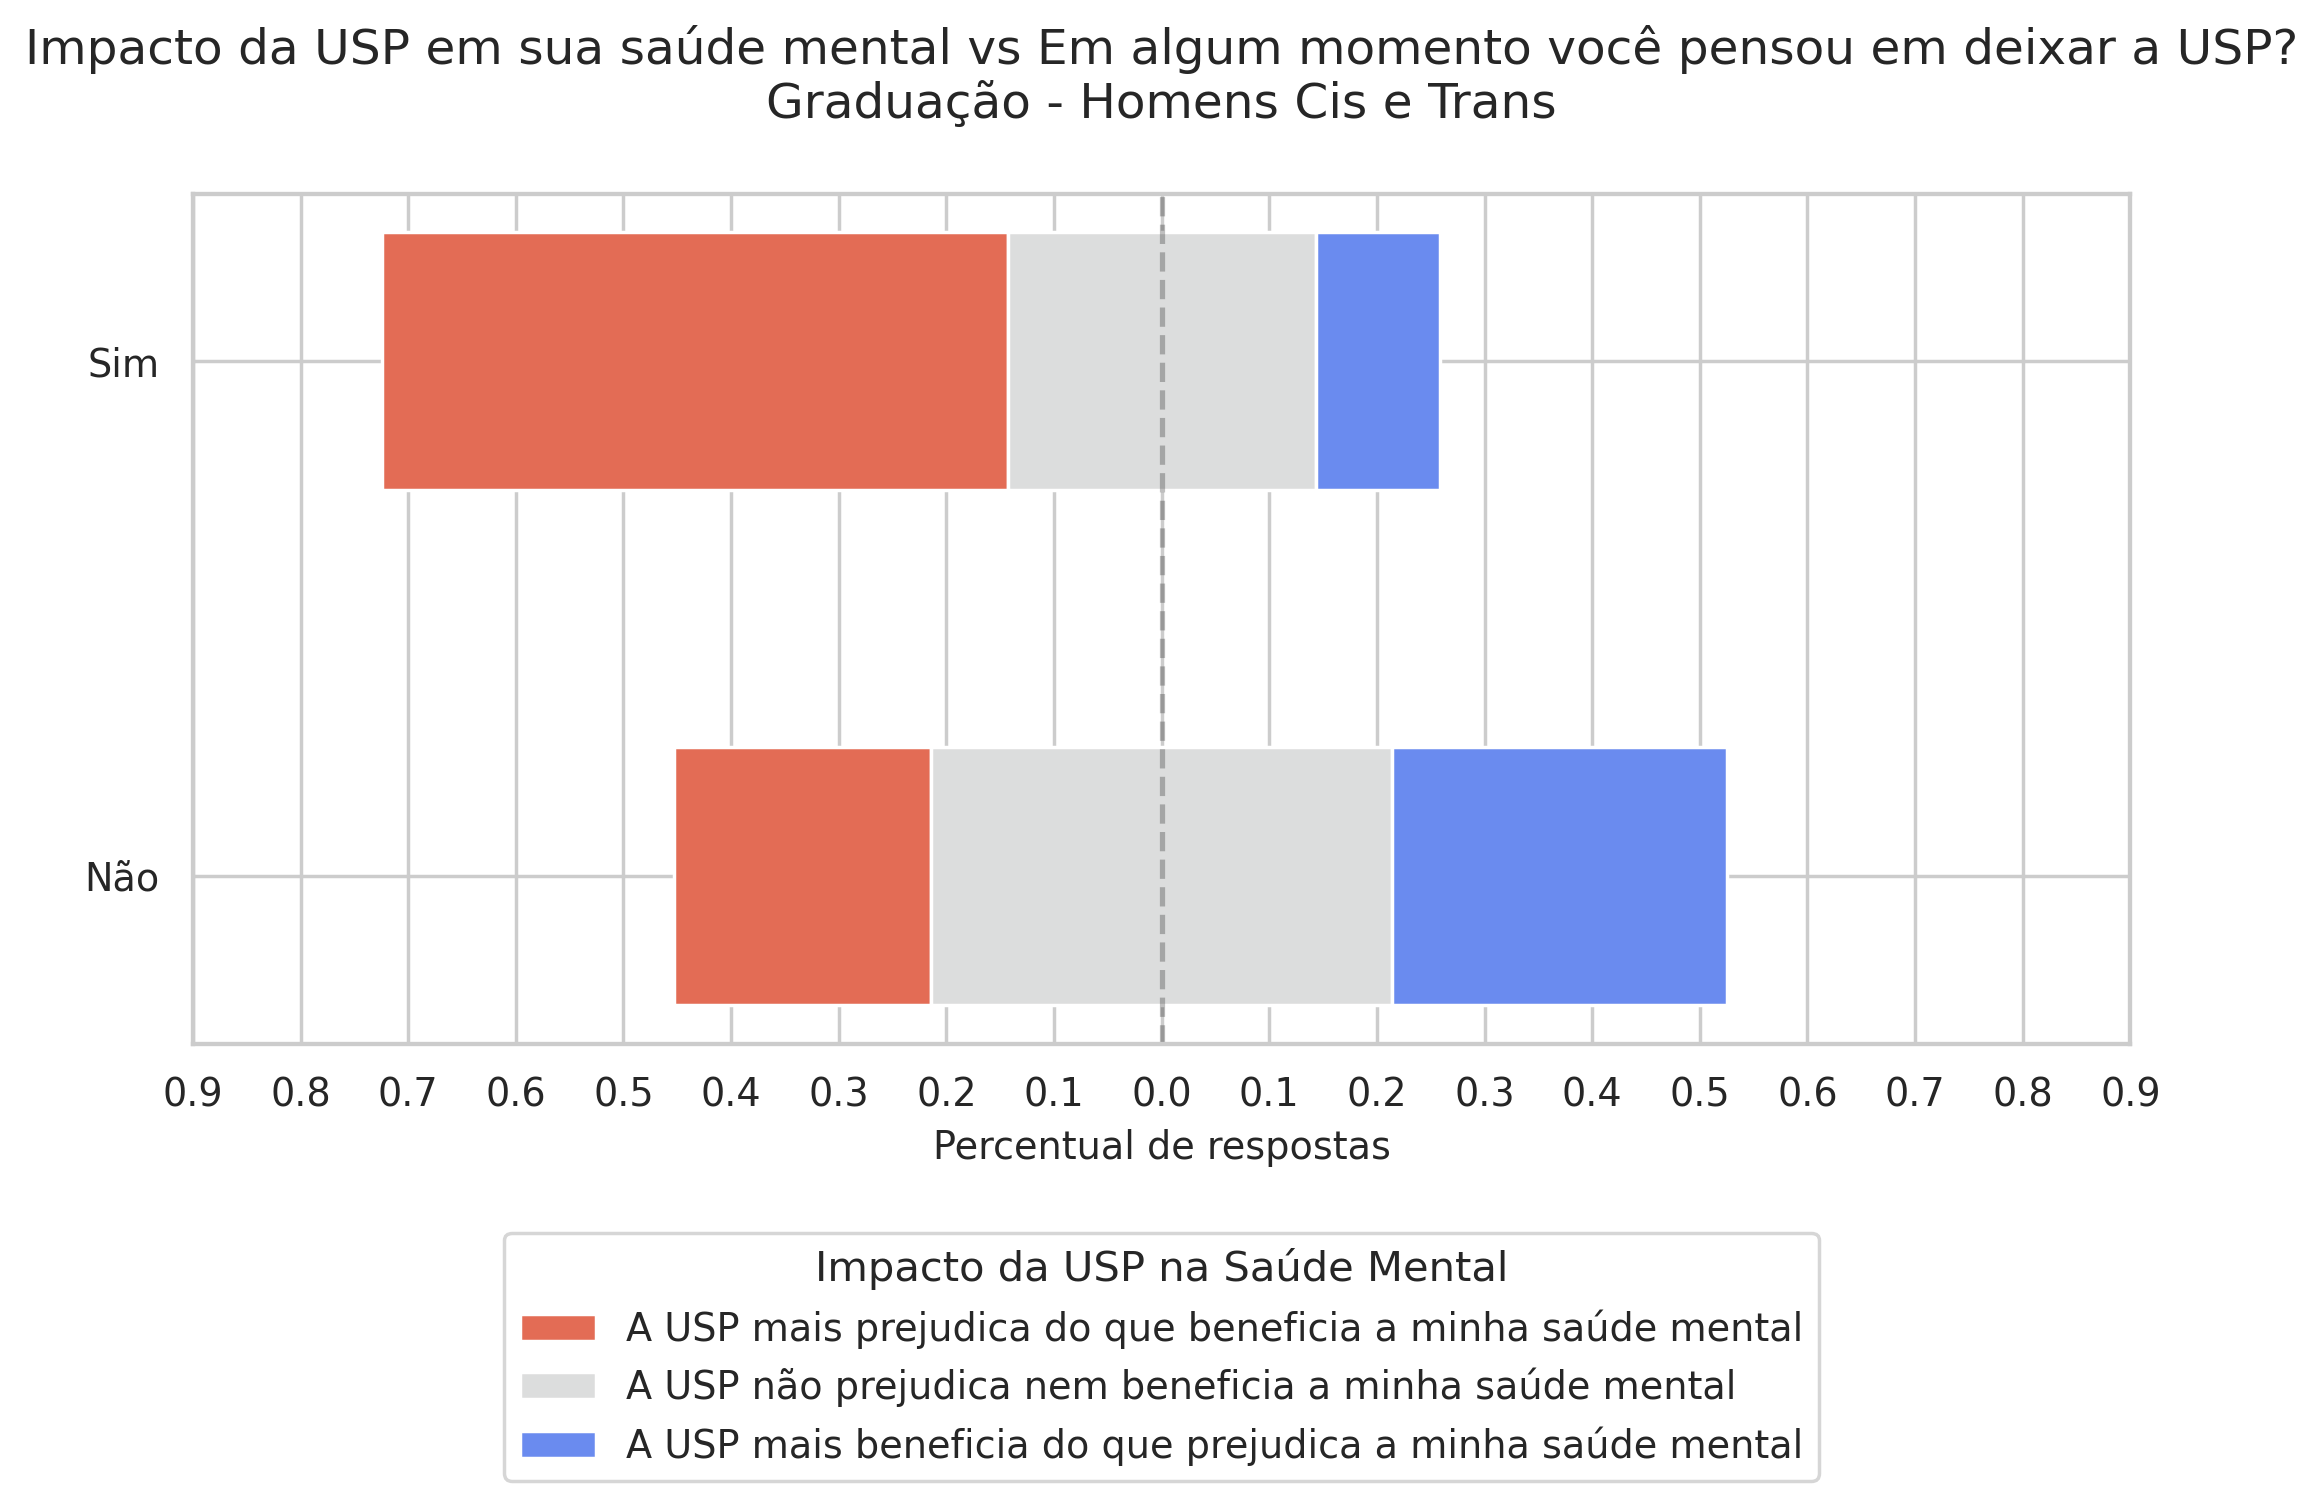

In [ ]:
df = tabcruzada_grad_a5h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim', 'Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Em algum momento você pensou em deixar a USP?\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Sim', 'Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 6: Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)? vs Impacto da USP na Saúde Mental.


### Tabela cruzada

In [ ]:
tabcruzada_grad_a6m = pd.crosstab(df_grad_mulheres['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a6m = tabcruzada_grad_a6m.astype(float)
tabcruzada_grad_a6m = tabcruzada_grad_a6m.reindex(index=['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'], columns=ordem_saude_mental)

tabcruzada_grad_a6m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                               
Sim, e fui contemplado                                                                                                                       0.551402            
Sim, mas não fui contemplado                                                                                                                 0.445378            
Não                                                                                                                                          0.385514            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                                                                                        
Sim, e fui contemplado                                                                                                                       0.325545                                                                     
Sim, mas não fui contemplado                                                                                                                 0.361345                                                                     
Não                                                                                                                                          0.396028                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Nos últimos dois anos, você se inscreveu para a...                                                                                                              
Sim, e fui contemplado                                                                                                                       0.116822           
Sim, mas não fui contemplado                                                                                                                 0.159664           
Não                                                                                                                                          0.193925

In [ ]:
tabcruzada_grad_a6h = pd.crosstab(df_grad_homens['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a6h = tabcruzada_grad_a6h.astype(float)
tabcruzada_grad_a6h = tabcruzada_grad_a6h.reindex(index=['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'], columns=ordem_saude_mental)

tabcruzada_grad_a6h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                               
Sim, e fui contemplado                                                                                                                       0.500000            
Sim, mas não fui contemplado                                                                                                                 0.424658            
Não                                                                                                                                          0.344692            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                                                                                        
Sim, e fui contemplado                                                                                                                       0.338028                                                                     
Sim, mas não fui contemplado                                                                                                                 0.383562                                                                     
Não                                                                                                                                          0.372215                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Nos últimos dois anos, você se inscreveu para a...                                                                                                              
Sim, e fui contemplado                                                                                                                       0.136150           
Sim, mas não fui contemplado                                                                                                                 0.178082           
Não                                                                                                                                          0.266055

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'])

Qui2       p-Valor
Nos últimos dois anos, você se inscreveu para a...  49.349966  6.345119e-09

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'])

Qui2       p-Valor
Nos últimos dois anos, você se inscreveu para a...  40.506747  3.621244e-07

### Plot likert

/tmp/ipykernel_6935/3610051616.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])


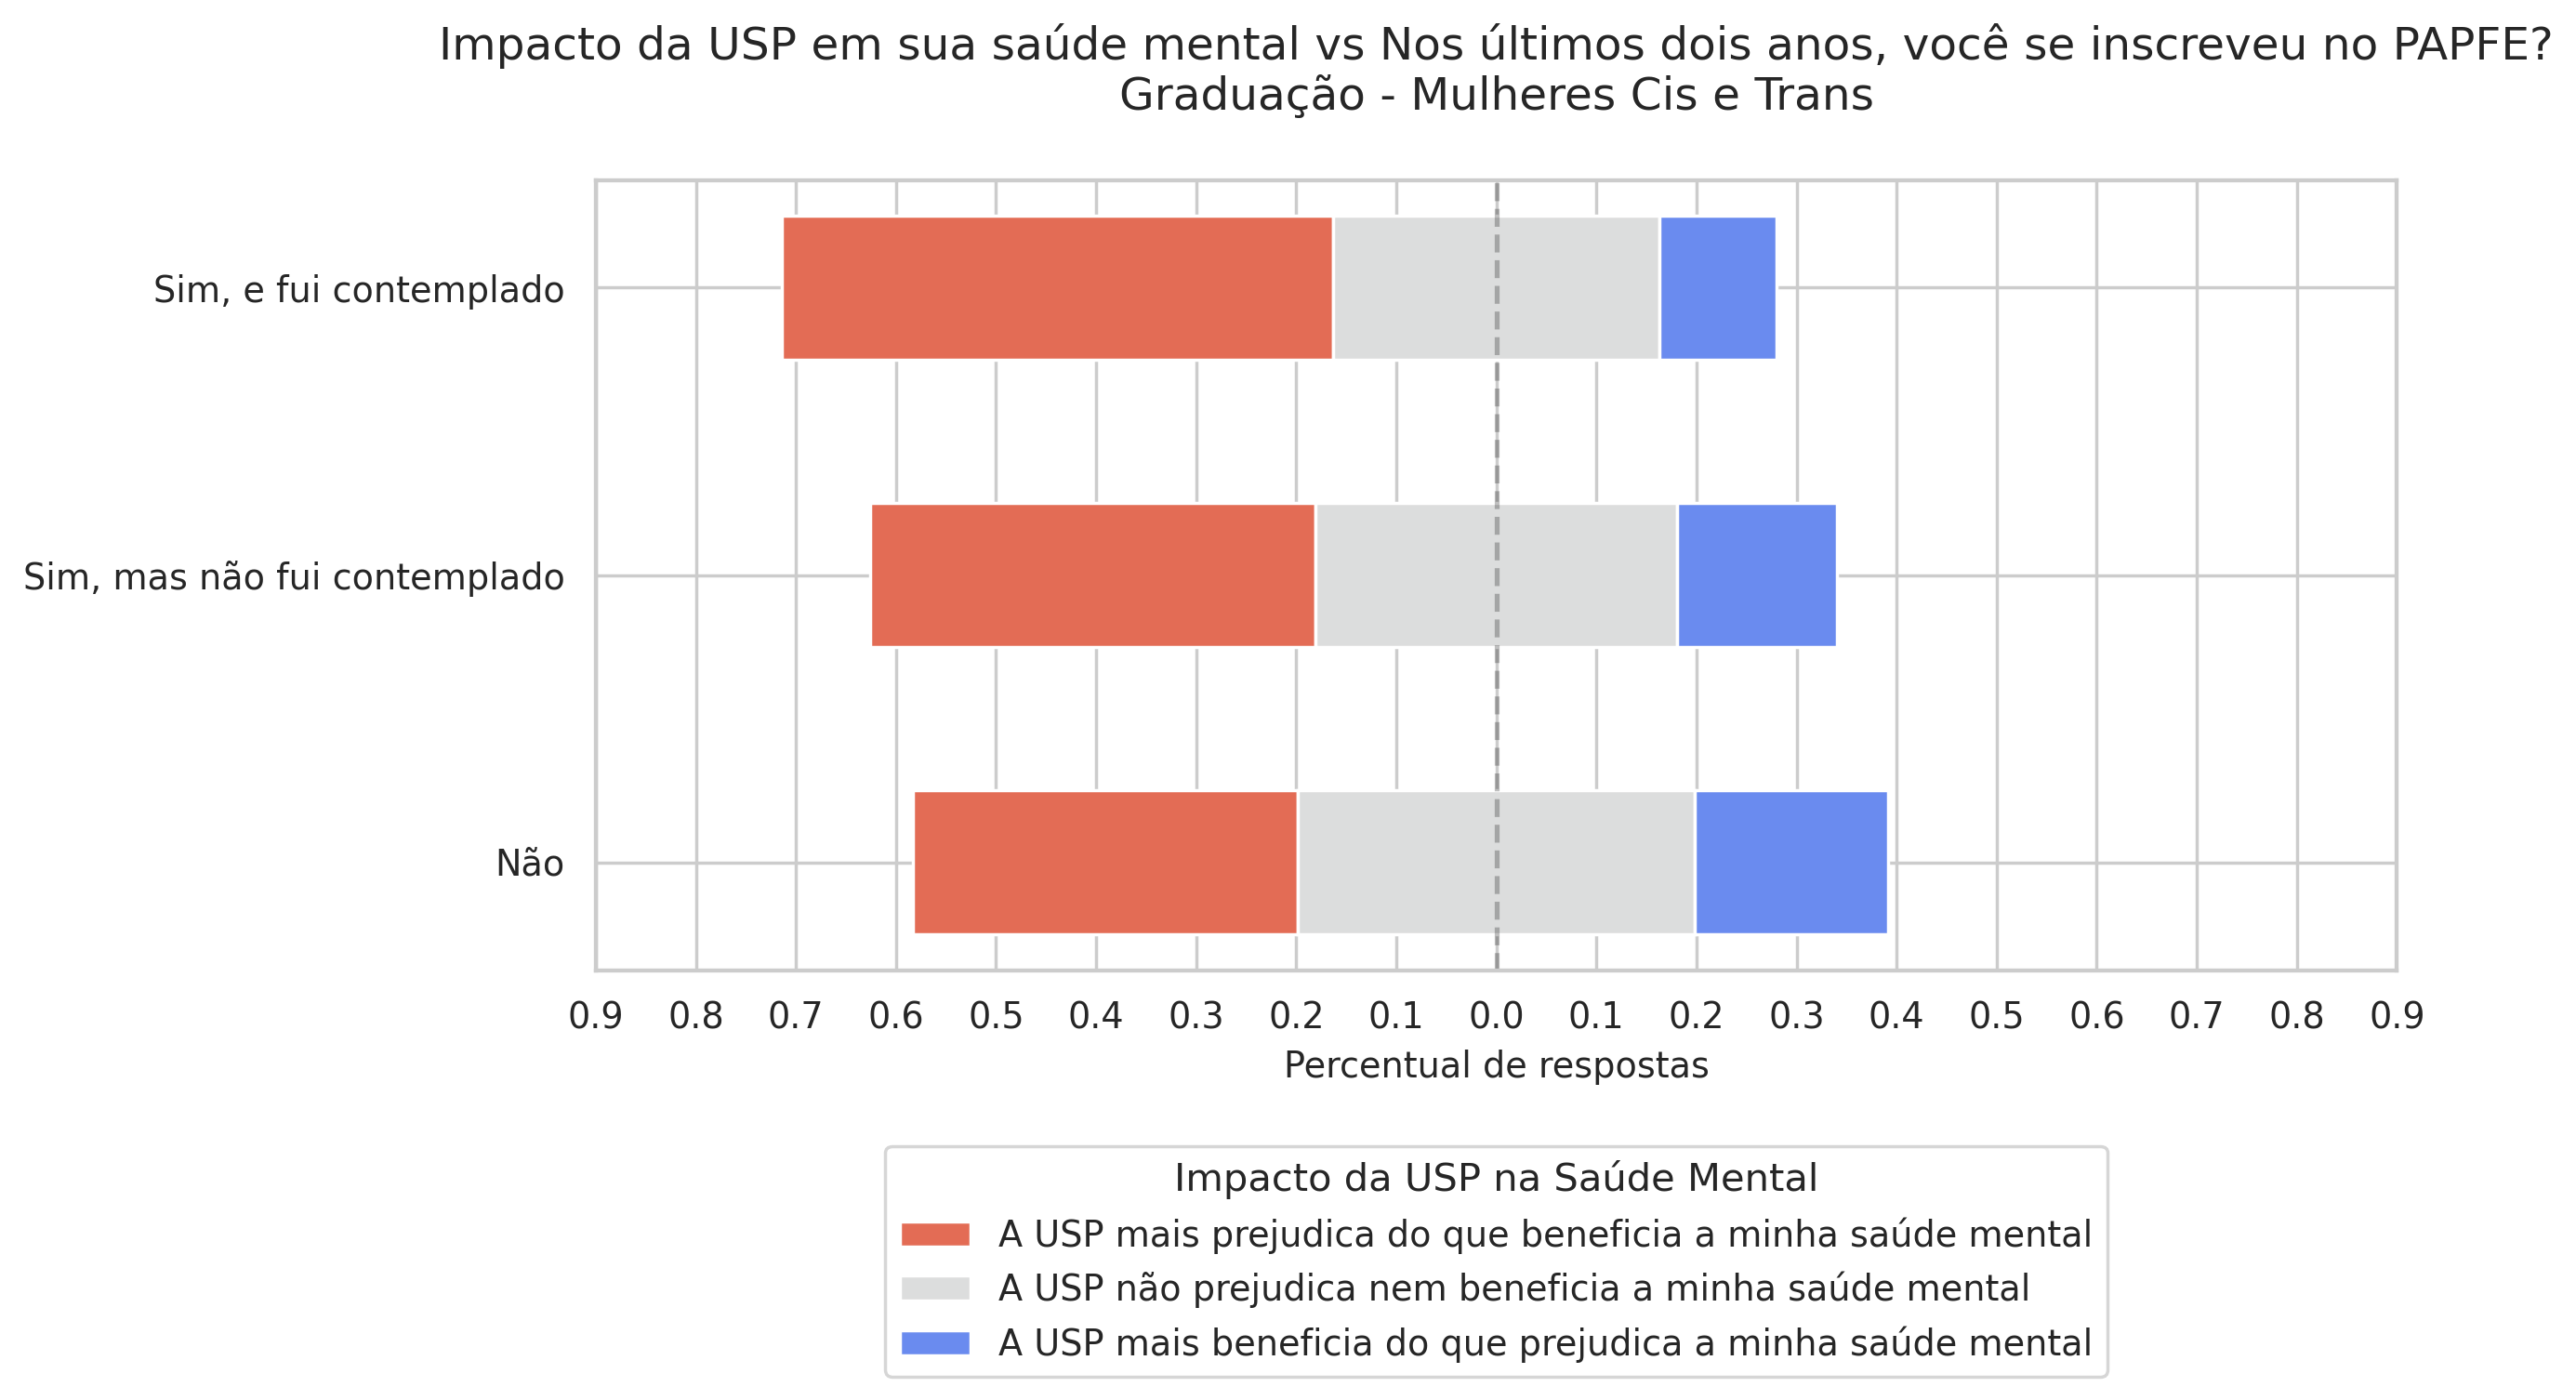

In [ ]:
df = tabcruzada_grad_a6m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Nos últimos dois anos, você se inscreveu no PAPFE?\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/3822077636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])


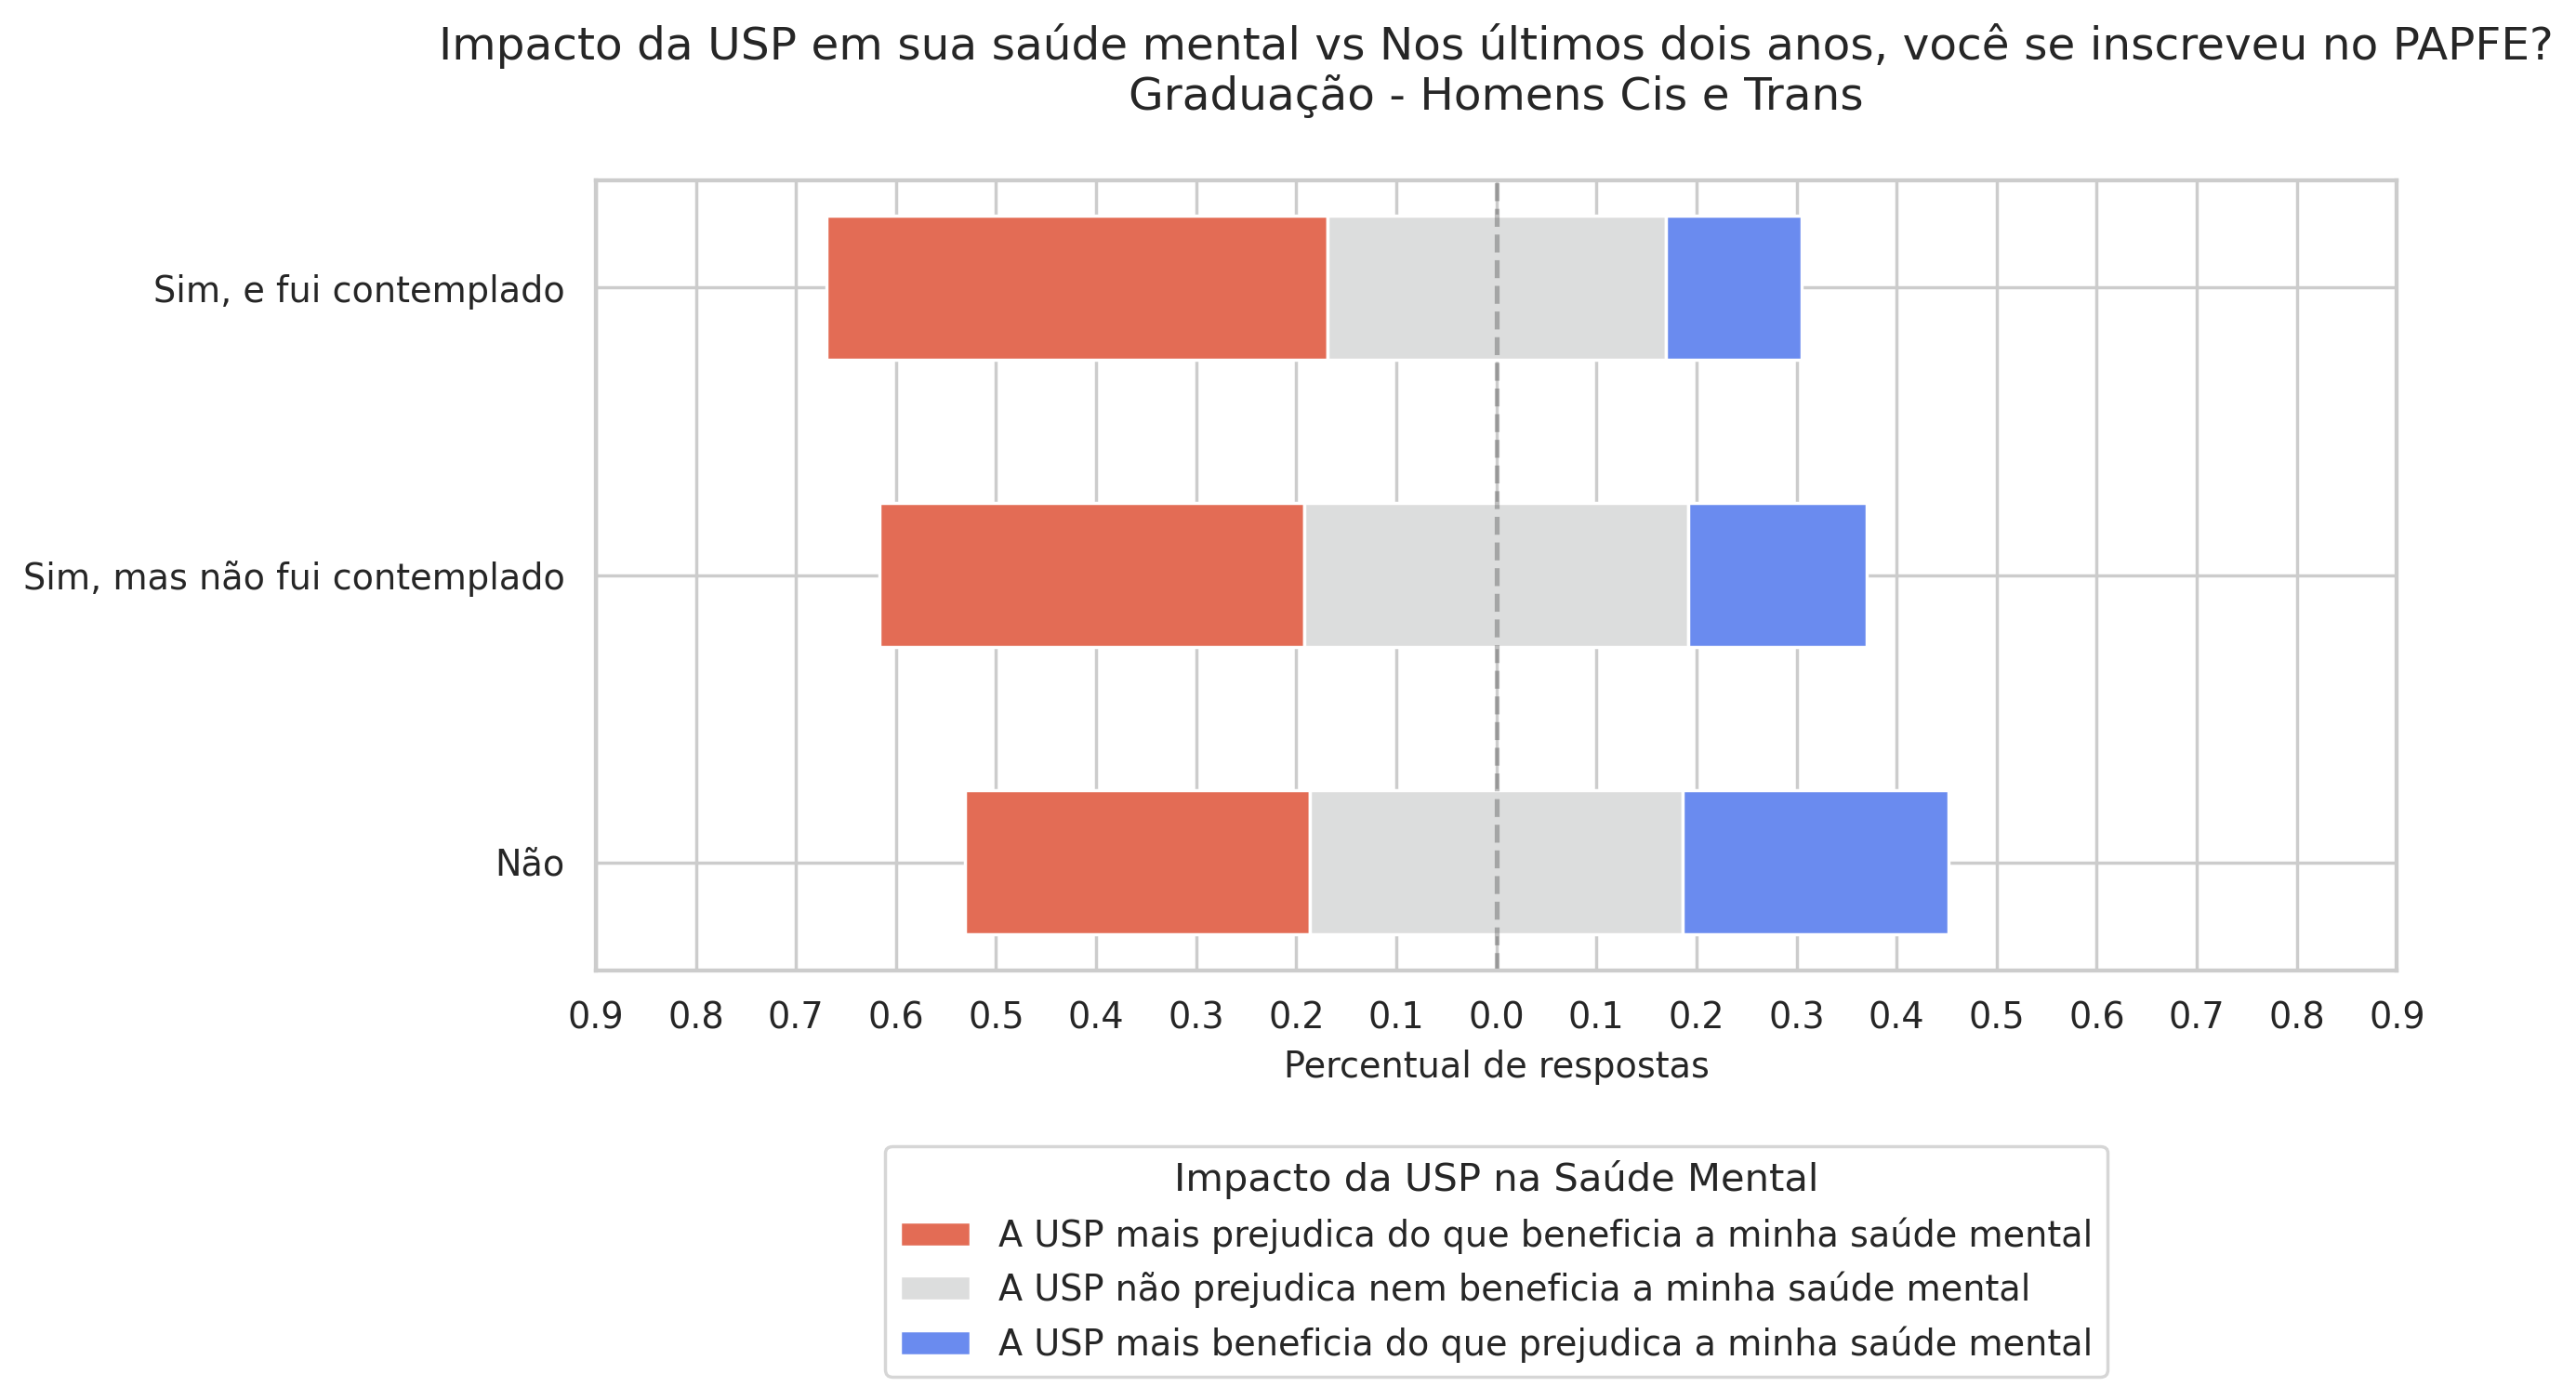

In [ ]:
df = tabcruzada_grad_a6h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Nos últimos dois anos, você se inscreveu no PAPFE?\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 7: Quantidade de horas trabalhadas vs Impacto da USP na Saúde Mental.


### Configuração

In [ ]:
lista_m = []
for idx, valor in df_grad_mulheres[['Você trabalha?','Quantas horas semanais?']].iterrows():
  if valor['Você trabalha?'] == "Não":
    lista_m.append(0)
  elif valor['Você trabalha?'] == "Prefiro não responder":
    lista_m.append("Prefiro não responder")
  else:
    lista_m.append(valor['Quantas horas semanais?'])

In [ ]:
lista_h = []
for idx, valor in df_grad_homens[['Você trabalha?','Quantas horas semanais?']].iterrows():
  if valor['Você trabalha?'] == "Não":
    lista_h.append(0)
  elif valor['Você trabalha?'] == "Prefiro não responder":
    lista_h.append("Prefiro não responder")
  else:
    lista_h.append(valor['Quantas horas semanais?'])

In [ ]:
# Retirar o primeiro número da string, MULHER
import re

horas_lista_m = []
for horas in lista_m:
  string = f'{horas}'
  match = re.search(r'\d+\.\d+|\d+', string)

  # Verifique se houve uma correspondência
  if match:
      primeiro_numero = match.group()
      horas_lista_m.append(int(primeiro_numero))
  else:
      horas_lista_m.append("Não informado")

In [ ]:
# Retirar o primeiro número da string, HOMEM
import re

horas_lista_h = []
for horas in lista_h:
  string = f'{horas}'
  match = re.search(r'\d+\.\d+|\d+', string)

  # Verifique se houve uma correspondência
  if match:
      primeiro_numero = match.group()
      horas_lista_h.append(int(primeiro_numero))
  else:
      horas_lista_h.append("Não informado")

In [ ]:
# Há 27 horas trabalhadas distintas, vamos classificá-las em "Não informado", "Não trabalho", "Menos de 20h", "Entre 20h e 30h" e "Mais de 30h"

horas_agrupada_lista_m = []
for horas in horas_lista_m:
  if isinstance(horas, str):
    horas_agrupada_lista_m.append("Não informado")
  elif horas == 0:
    horas_agrupada_lista_m.append("Não trabalho")
  elif horas <= 20:
    horas_agrupada_lista_m.append("Menos de 20h")
  elif horas <= 30:
    horas_agrupada_lista_m.append("Entre 20h e 30h")
  else:
    horas_agrupada_lista_m.append("Mais de 30h")

In [ ]:
# Há 27 horas trabalhadas distintas, vamos classificá-las em "Não informado", "Não trabalho", "Menos de 20h", "Entre 20h e 30h" e "Mais de 30h"

horas_agrupada_lista_h = []
for horas in horas_lista_h:
  if isinstance(horas, str):
    horas_agrupada_lista_h.append("Não informado")
  elif horas == 0:
    horas_agrupada_lista_h.append("Não trabalho")
  elif horas <= 20:
    horas_agrupada_lista_h.append("Menos de 20h")
  elif horas <= 30:
    horas_agrupada_lista_h.append("Entre 20h e 30h")
  else:
    horas_agrupada_lista_h.append("Mais de 30h")

In [ ]:
df_grad_mulheres['horas_agrupadas'] = horas_agrupada_lista_m
df_grad_homens['horas_agrupadas'] = horas_agrupada_lista_h

/tmp/ipykernel_6935/3213673496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_mulheres['horas_agrupadas'] = horas_agrupada_lista_m
/tmp/ipykernel_6935/3213673496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_homens['horas_agrupadas'] = horas_agrupada_lista_h


### Tabela cruzada

In [ ]:
tabcruzada_grad_a7m = pd.crosstab(df_grad_mulheres['horas_agrupadas'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a7m = tabcruzada_grad_a7m.astype(float)
tabcruzada_grad_a7m = tabcruzada_grad_a7m.reindex(index=['Não trabalho','Menos de 20h', 'Entre 20h e 30h', 'Mais de 30h'], columns=ordem_saude_mental)

tabcruzada_grad_a7m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
horas_agrupadas                                                                                                                                                  
Não trabalho                                                                                                                                 0.460539            
Menos de 20h                                                                                                                                 0.375000            
Entre 20h e 30h                                                                                                                              0.519531            
Mais de 30h                                                                                                                                  0.430303            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
horas_agrupadas                                                                                                                                                                                                           
Não trabalho                                                                                                                                 0.391608                                                                     
Menos de 20h                                                                                                                                 0.388889                                                                     
Entre 20h e 30h                                                                                                                              0.265625                                                                     
Mais de 30h                                                                                                                                  0.309091                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
horas_agrupadas                                                                                                                                                 
Não trabalho                                                                                                                                 0.135864           
Menos de 20h                                                                                                                                 0.222222           
Entre 20h e 30h                                                                                                                              0.187500           
Mais de 30h                                                                                                                                  0.218182

In [ ]:
tabcruzada_grad_a7h = pd.crosstab(df_grad_homens['horas_agrupadas'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a7h = tabcruzada_grad_a7h.astype(float)
tabcruzada_grad_a7h = tabcruzada_grad_a7h.reindex(index=['Não trabalho','Menos de 20h', 'Entre 20h e 30h', 'Mais de 30h'], columns=ordem_saude_mental)

tabcruzada_grad_a7h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
horas_agrupadas                                                                                                                                                  
Não trabalho                                                                                                                                 0.405890            
Menos de 20h                                                                                                                                 0.425743            
Entre 20h e 30h                                                                                                                              0.423469            
Mais de 30h                                                                                                                                  0.346667            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
horas_agrupadas                                                                                                                                                                                                           
Não trabalho                                                                                                                                 0.381562                                                                     
Menos de 20h                                                                                                                                 0.326733                                                                     
Entre 20h e 30h                                                                                                                              0.306122                                                                     
Mais de 30h                                                                                                                                  0.360000                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
horas_agrupadas                                                                                                                                                 
Não trabalho                                                                                                                                 0.193342           
Menos de 20h                                                                                                                                 0.227723           
Entre 20h e 30h                                                                                                                              0.250000           
Mais de 30h                                                                                                                                  0.266667

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['horas_agrupadas'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  38.522171  0.000126

In [ ]:
qui_quadrado(df_grad_homens['horas_agrupadas'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  12.329198  0.419617

### Plot likert

/tmp/ipykernel_6935/3624519617.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Mais de 30h', 'Entre 20h e 30h', 'Menos de 20h', 'Não trabalho'])


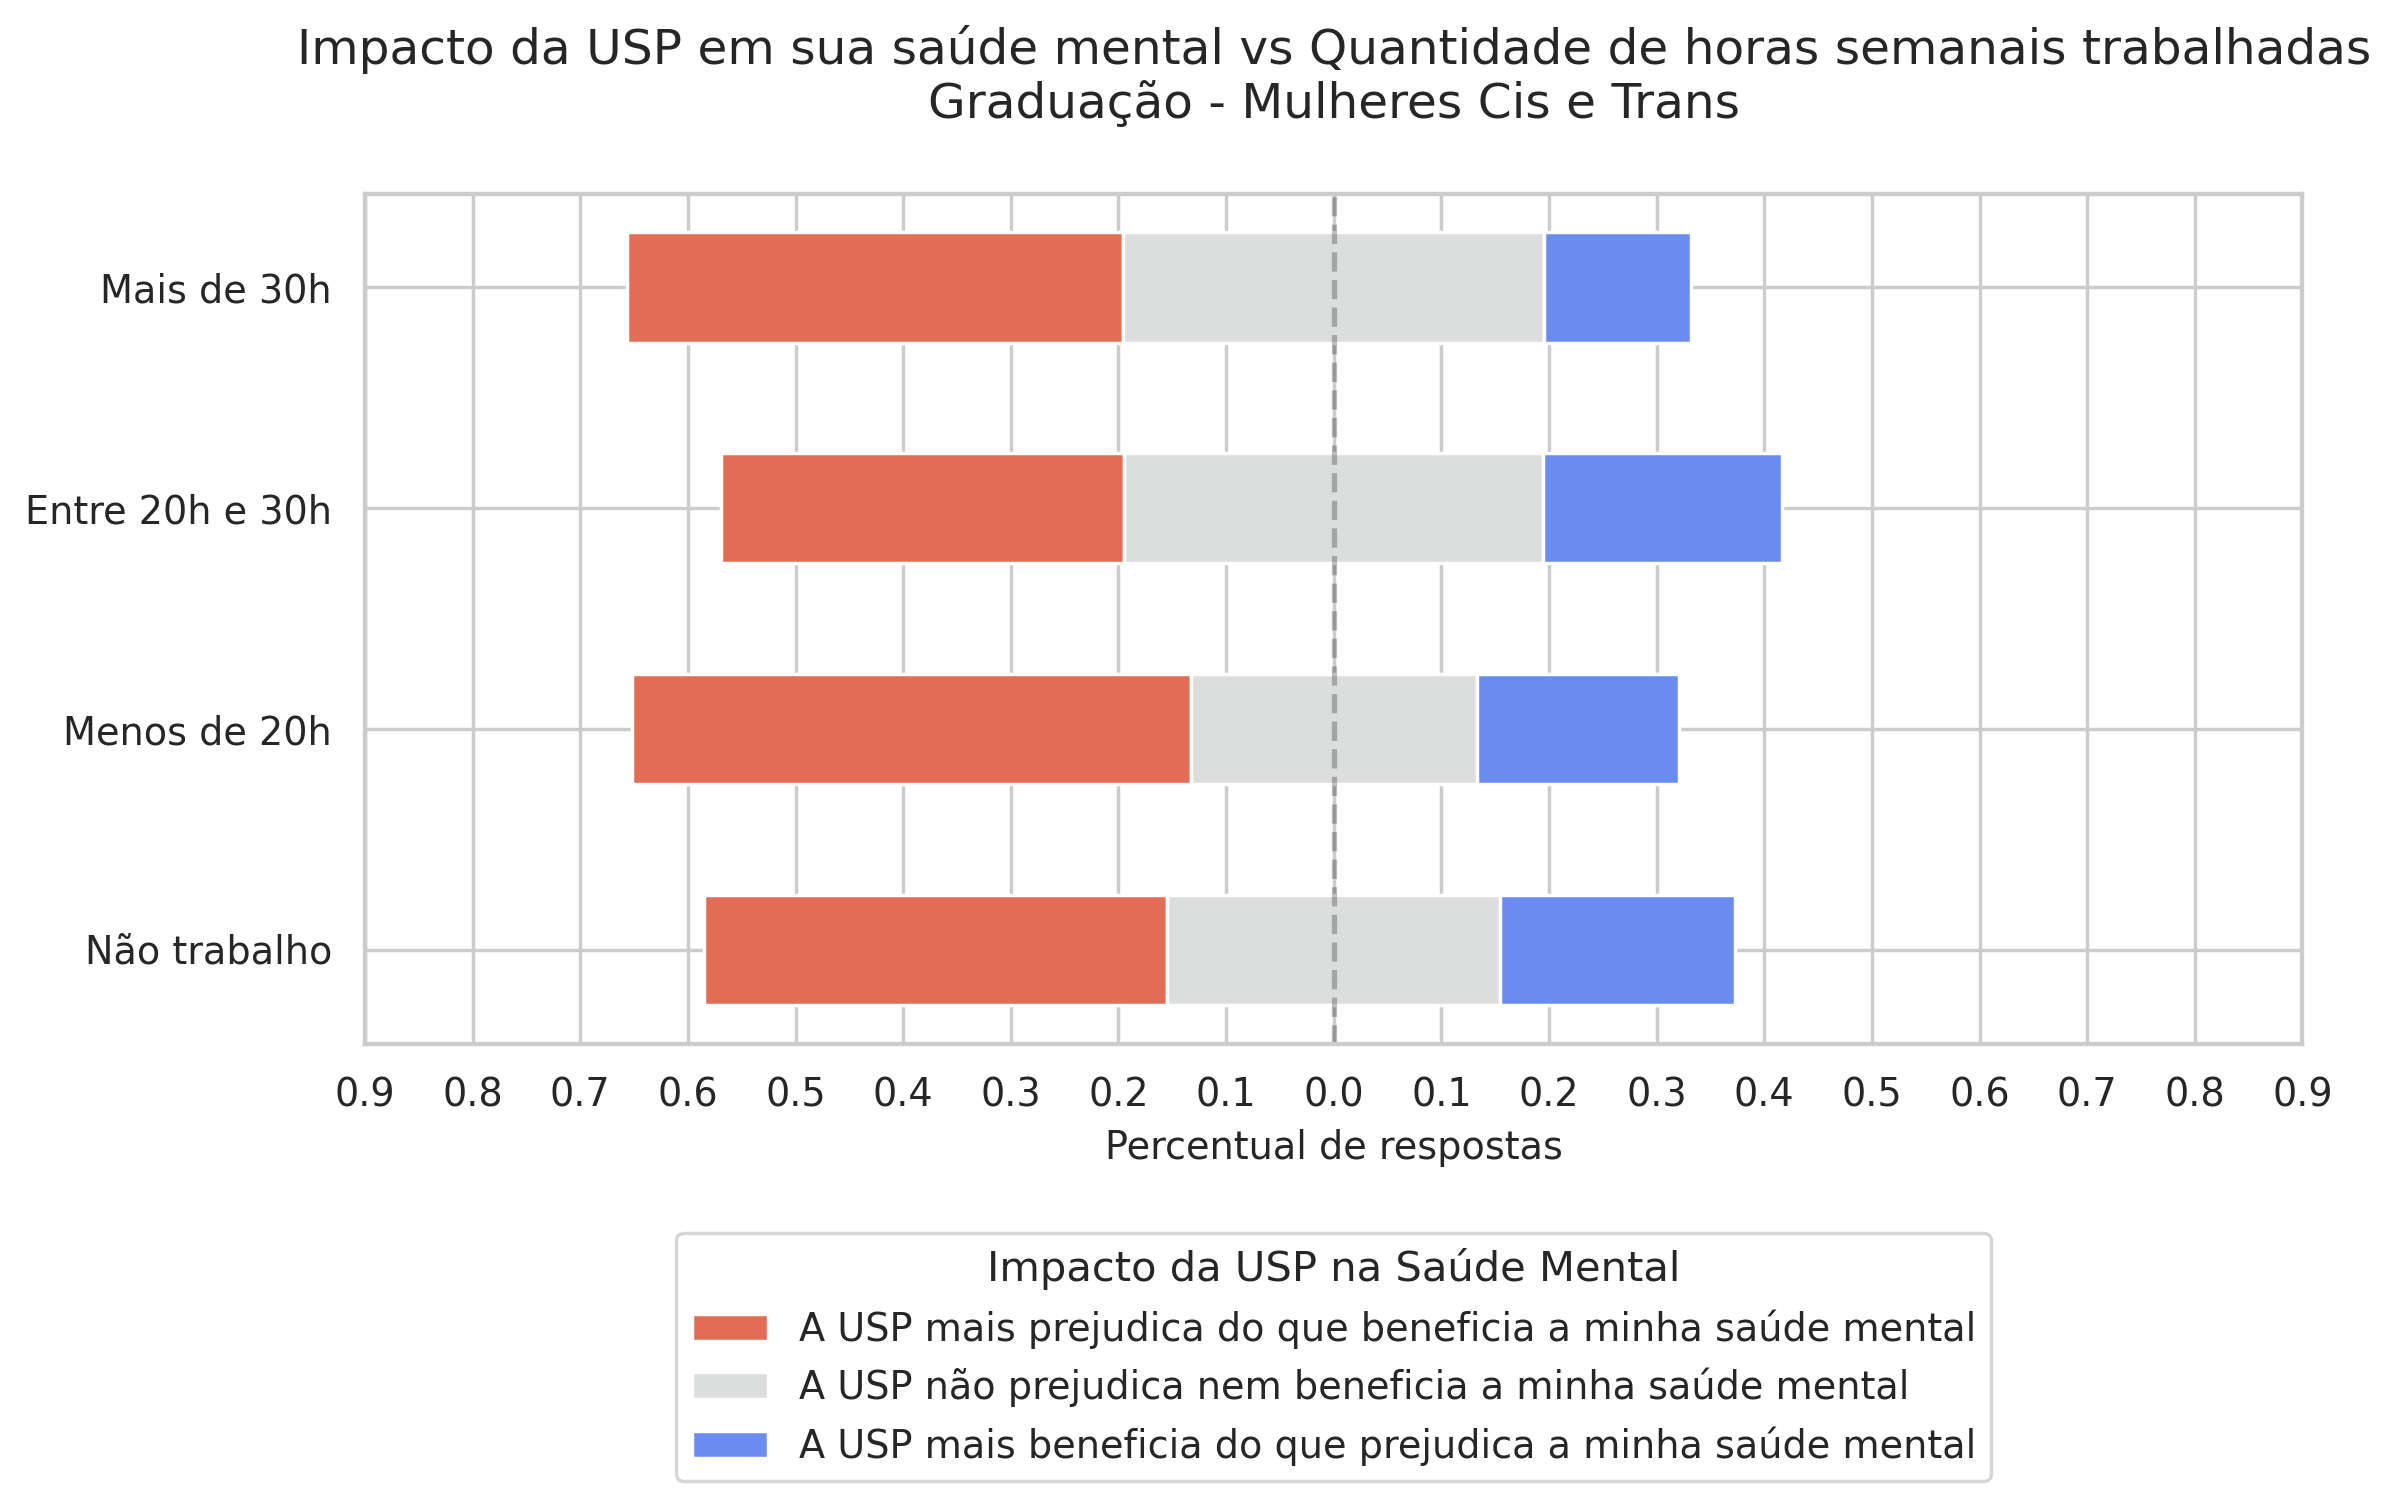

In [ ]:
df = tabcruzada_grad_a7m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Não trabalho',
                            'Menos de 20h',
                            'Entre 20h e 30h',
                            'Mais de 30h'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Quantidade de horas semanais trabalhadas\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Mais de 30h', 'Entre 20h e 30h', 'Menos de 20h', 'Não trabalho'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/3270750218.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Mais de 30h', 'Entre 20h e 30h', 'Menos de 20h', 'Não trabalho'])


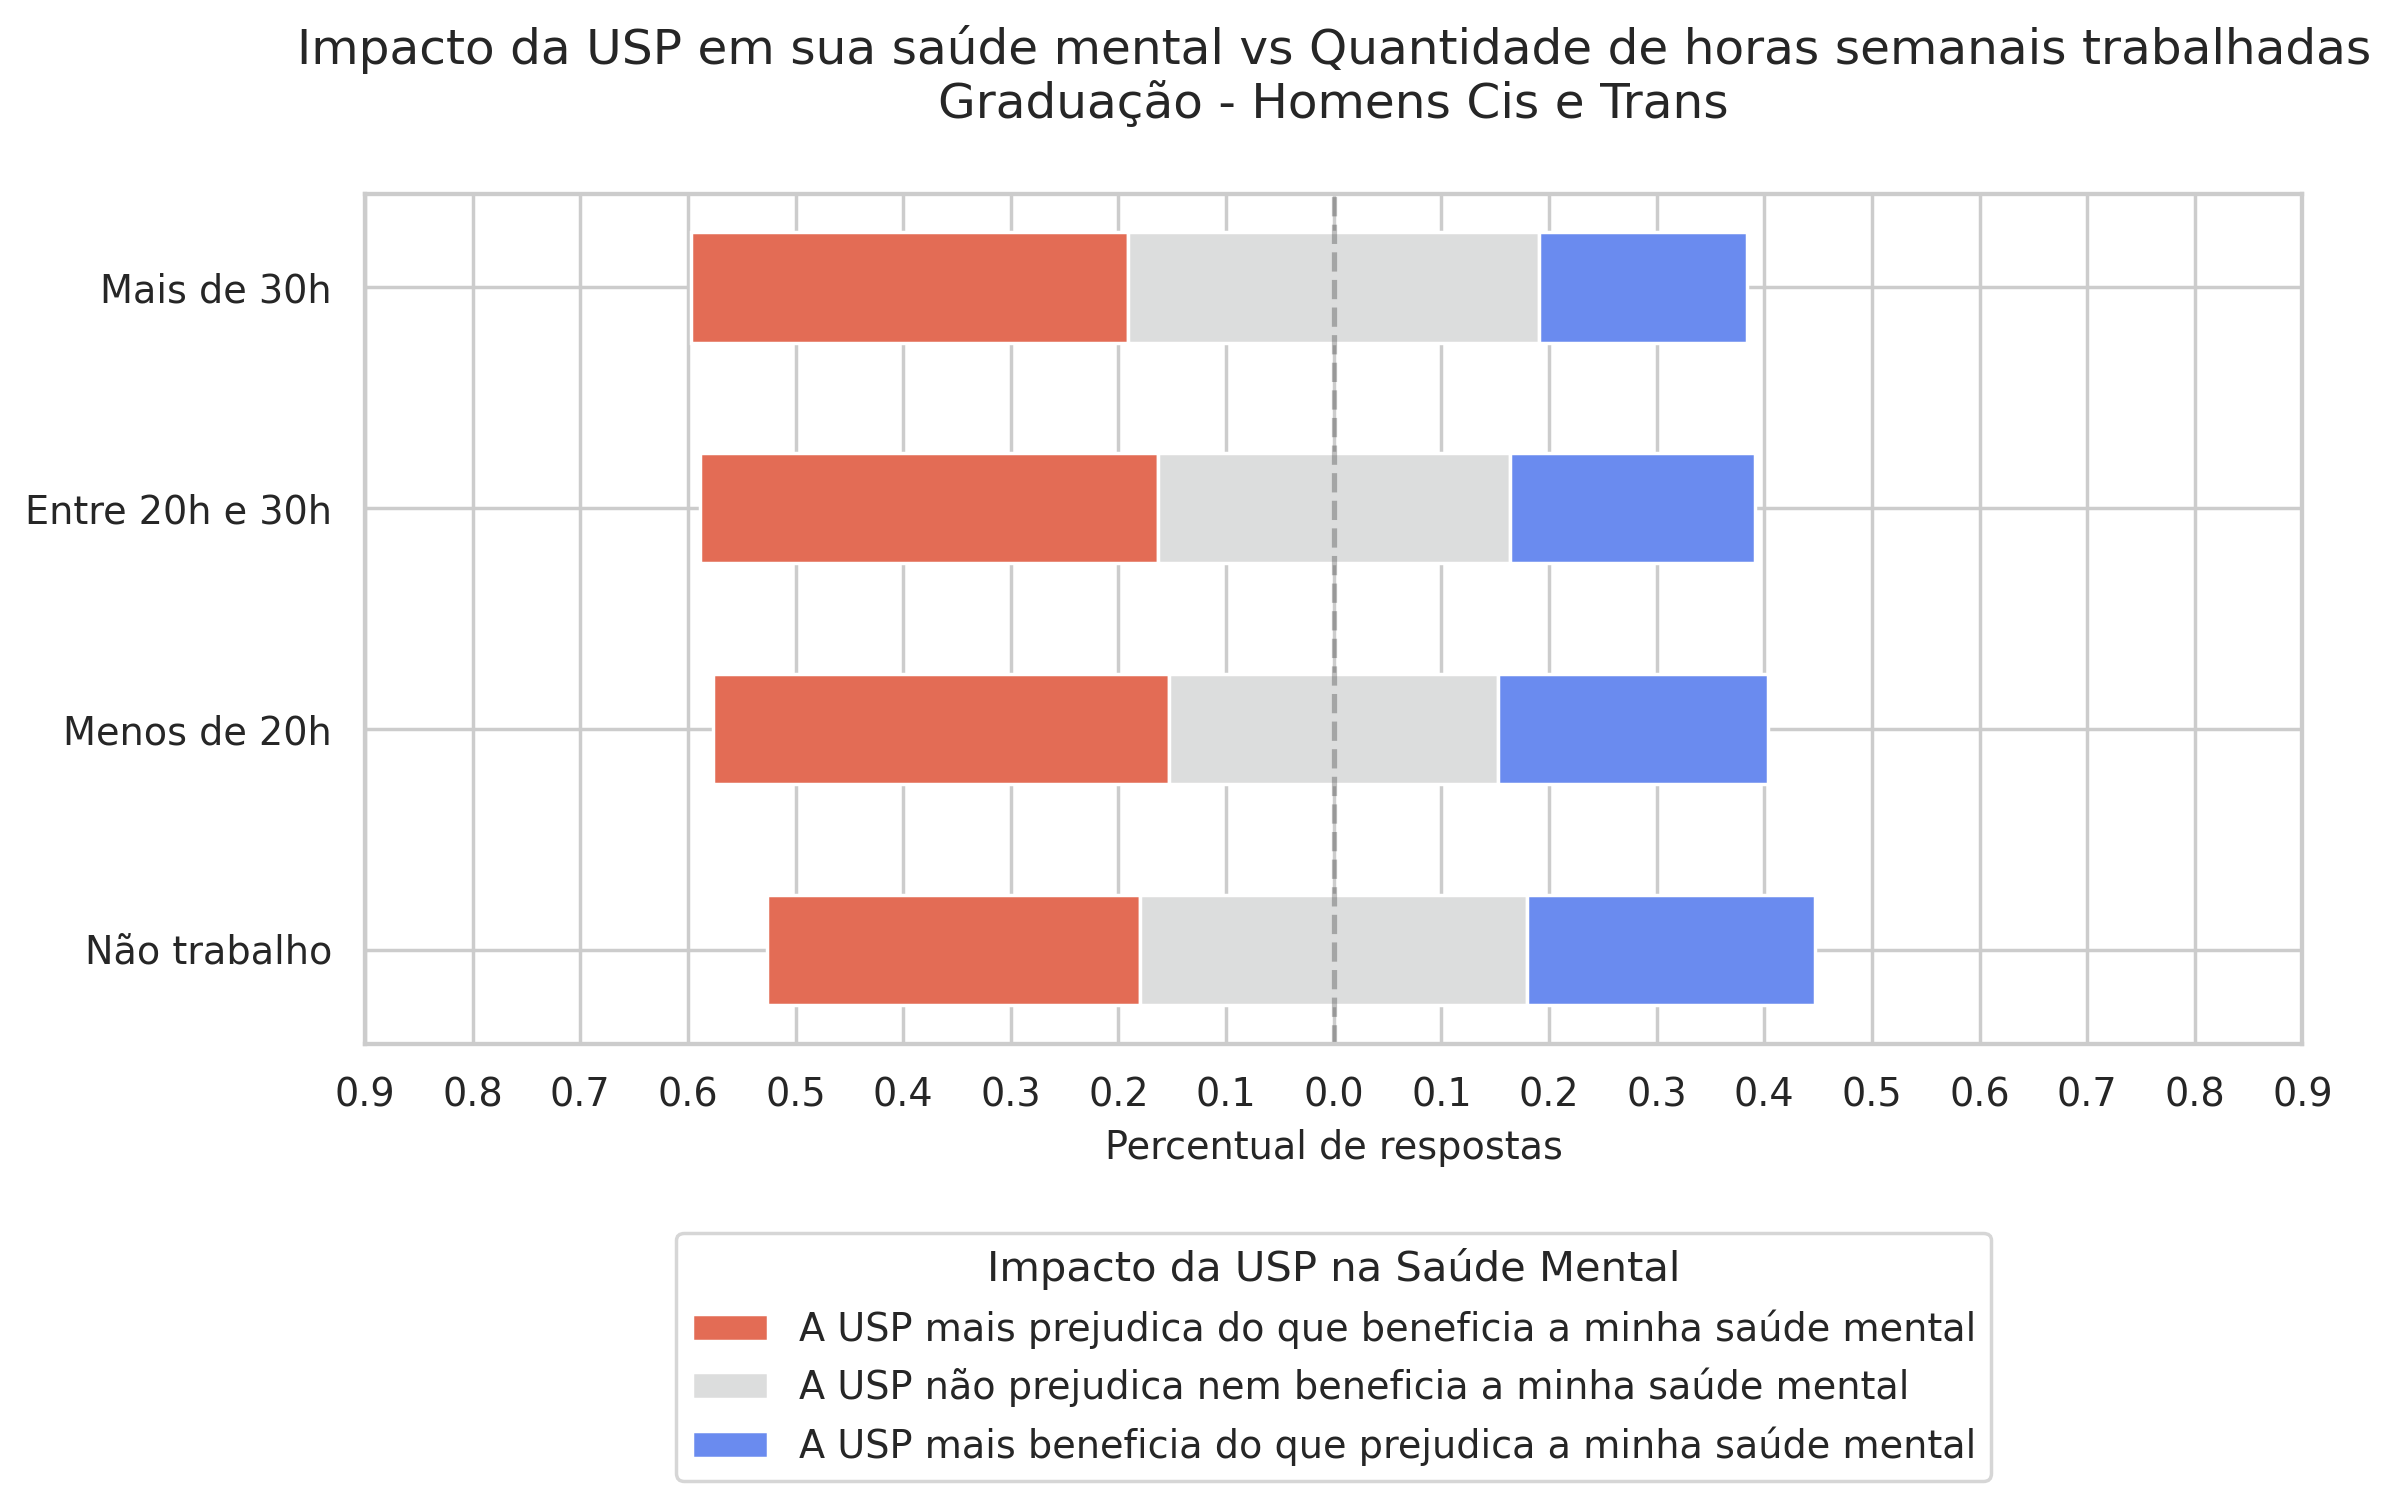

In [ ]:
df = tabcruzada_grad_a7h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Não trabalho',
                            'Menos de 20h',
                            'Entre 20h e 30h',
                            'Mais de 30h'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Quantidade de horas semanais trabalhadas\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Mais de 30h', 'Entre 20h e 30h', 'Menos de 20h', 'Não trabalho'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 8: Você é atualmente financeiramente dependente/independente? vs Impacto da USP na Saúde Mental.


### Tabela Cruzada

In [ ]:
tabcruzada_grad_a8m  = pd.crosstab(df_grad_mulheres['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a8m = tabcruzada_grad_a8m.astype(float)
tabcruzada_grad_a8m = tabcruzada_grad_a8m.reindex(index=['Dependente',	'Independente'], columns=ordem_saude_mental)

tabcruzada_grad_a8m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você é atualmente dependente financeiramente (f...                                                                                                               
Dependente                                                                                                                                   0.453775            
Independente                                                                                                                                 0.464883            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você é atualmente dependente financeiramente (f...                                                                                                                                                                        
Dependente                                                                                                                                   0.381356                                                                     
Independente                                                                                                                                 0.290970                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você é atualmente dependente financeiramente (f...                                                                                                              
Dependente                                                                                                                                   0.149461           
Independente                                                                                                                                 0.214047

In [ ]:
tabcruzada_grad_a8h  = pd.crosstab(df_grad_homens['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a8h = tabcruzada_grad_a8h.astype(float)
tabcruzada_grad_a8h = tabcruzada_grad_a8h.reindex(index=['Dependente',	'Independente'], columns=ordem_saude_mental)

tabcruzada_grad_a8h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você é atualmente dependente financeiramente (f...                                                                                                               
Dependente                                                                                                                                   0.405405            
Independente                                                                                                                                 0.392086            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você é atualmente dependente financeiramente (f...                                                                                                                                                                        
Dependente                                                                                                                                   0.378378                                                                     
Independente                                                                                                                                 0.302158                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você é atualmente dependente financeiramente (f...                                                                                                              
Dependente                                                                                                                                   0.199584           
Independente                                                                                                                                 0.280576

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  15.953169  0.014008

In [ ]:
qui_quadrado(df_grad_homens['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  16.797734  0.010056

### Plot likert

/tmp/ipykernel_6935/3519446255.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Dependente', 'Independente'])


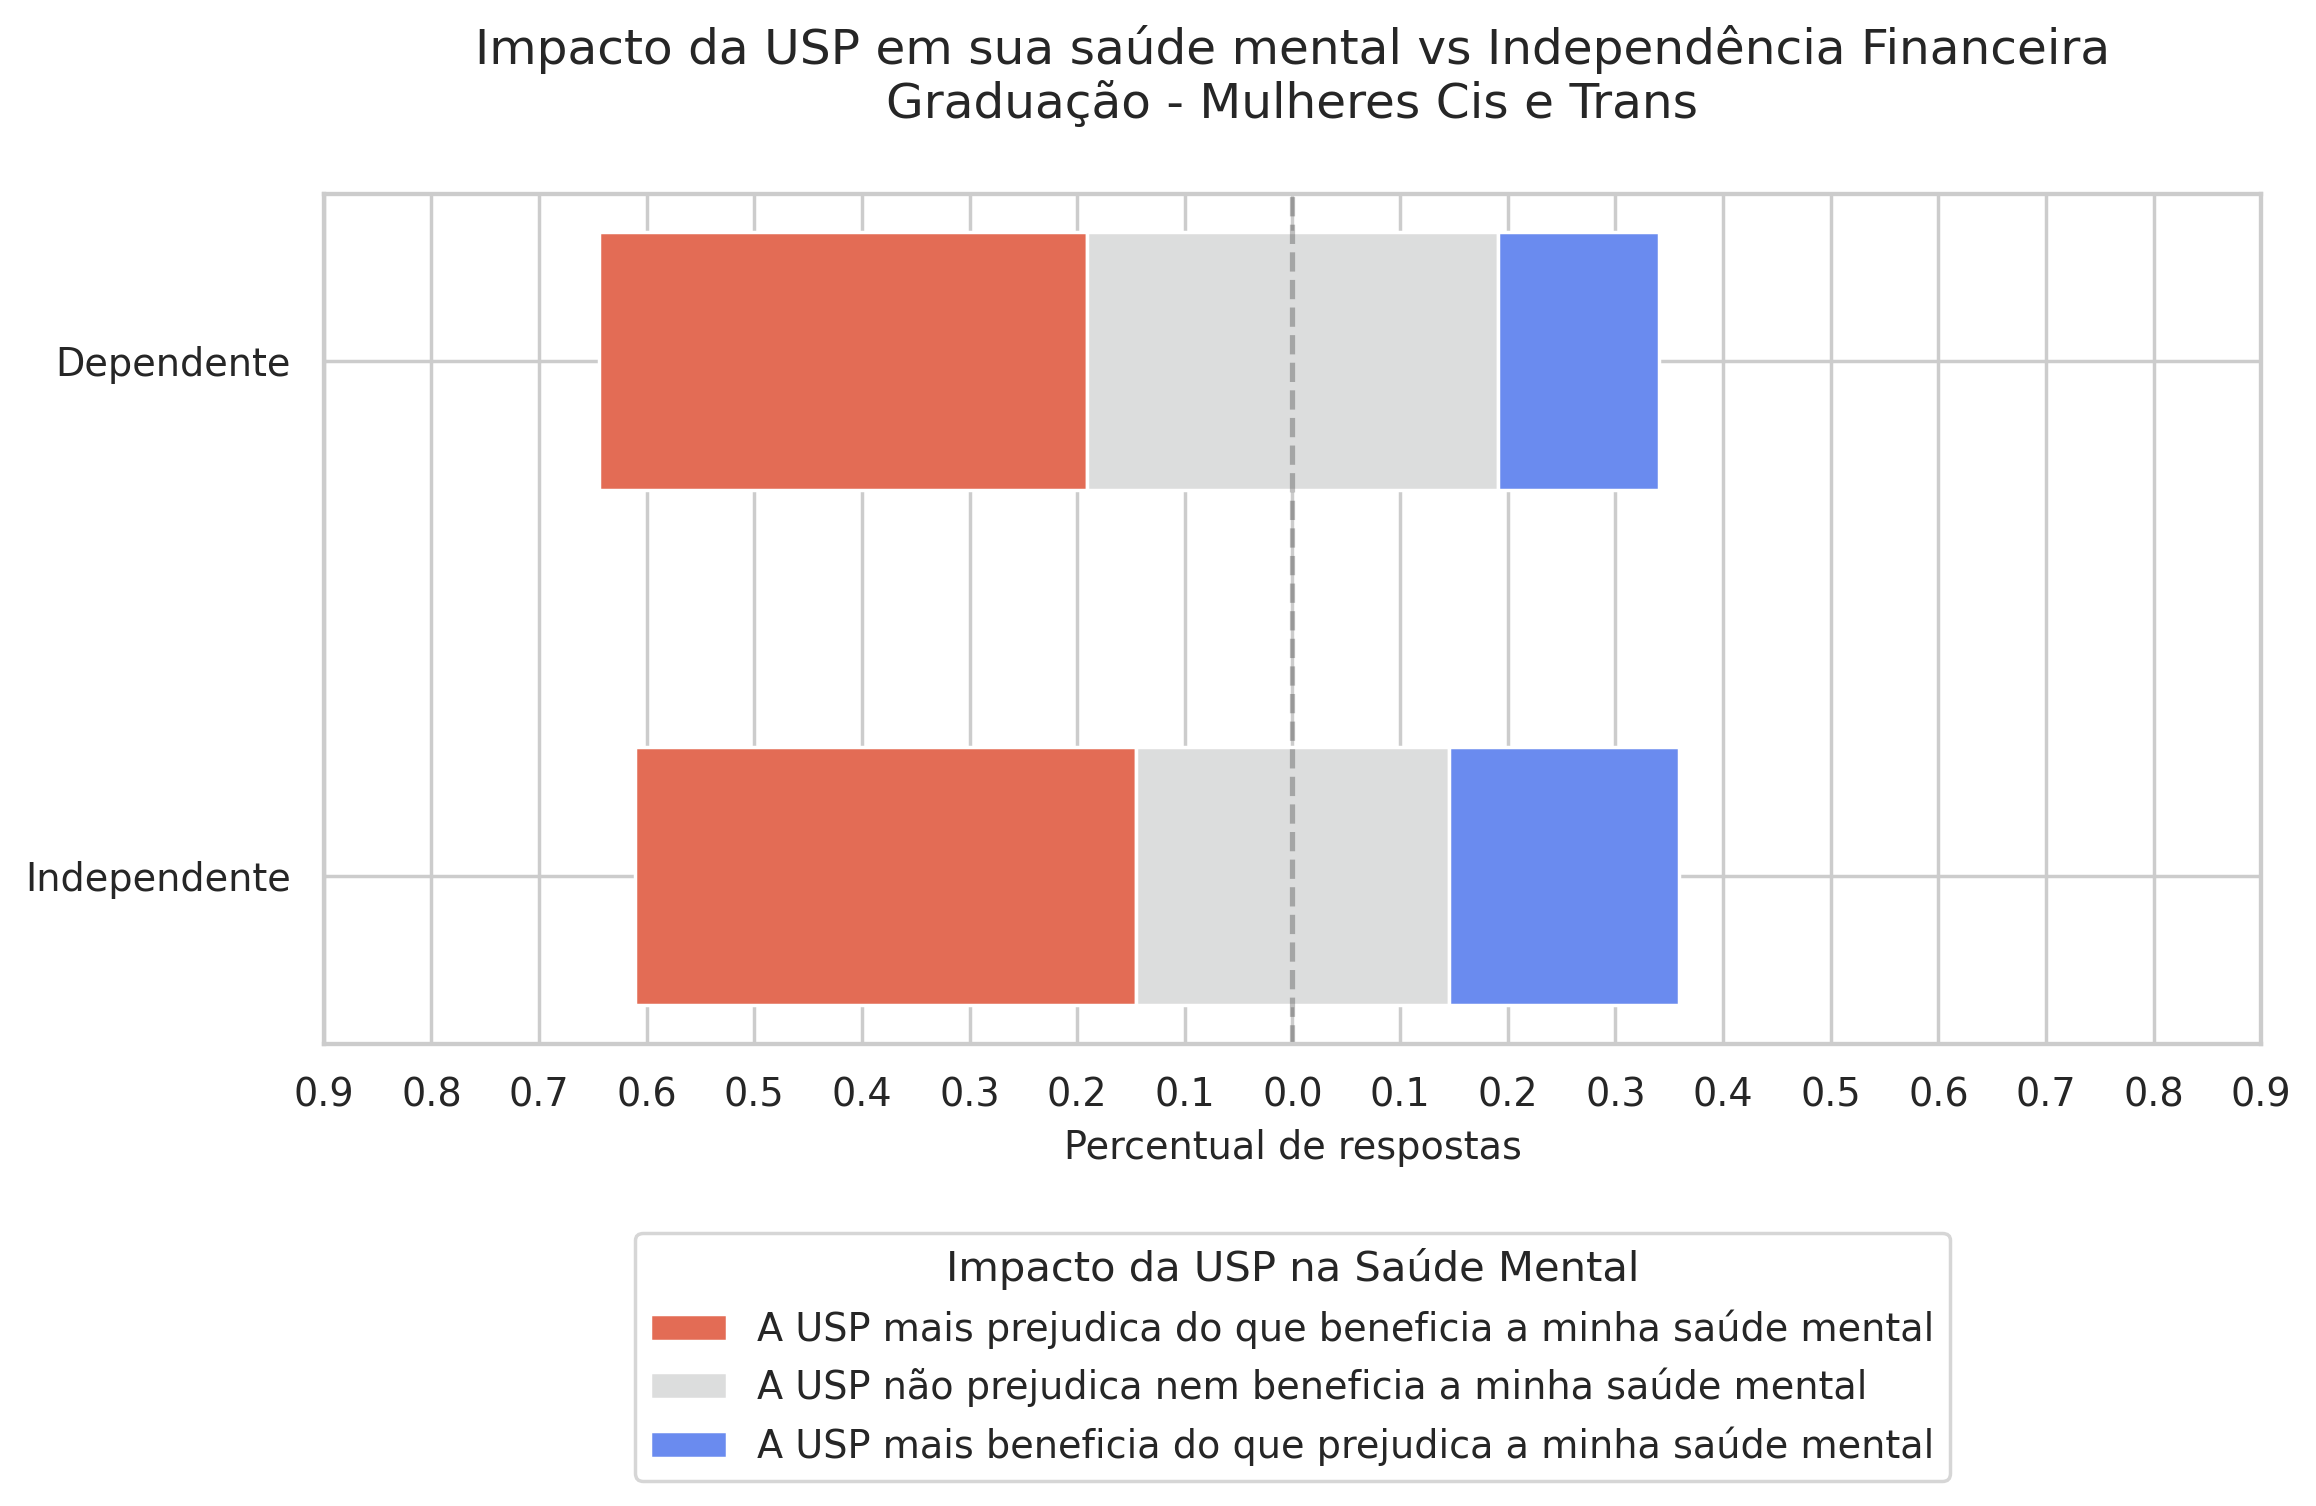

In [ ]:
df = tabcruzada_grad_a8m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Dependente', 'Independente'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Independência Financeira\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Dependente', 'Independente'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/1502699205.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Dependente', 'Independente'])


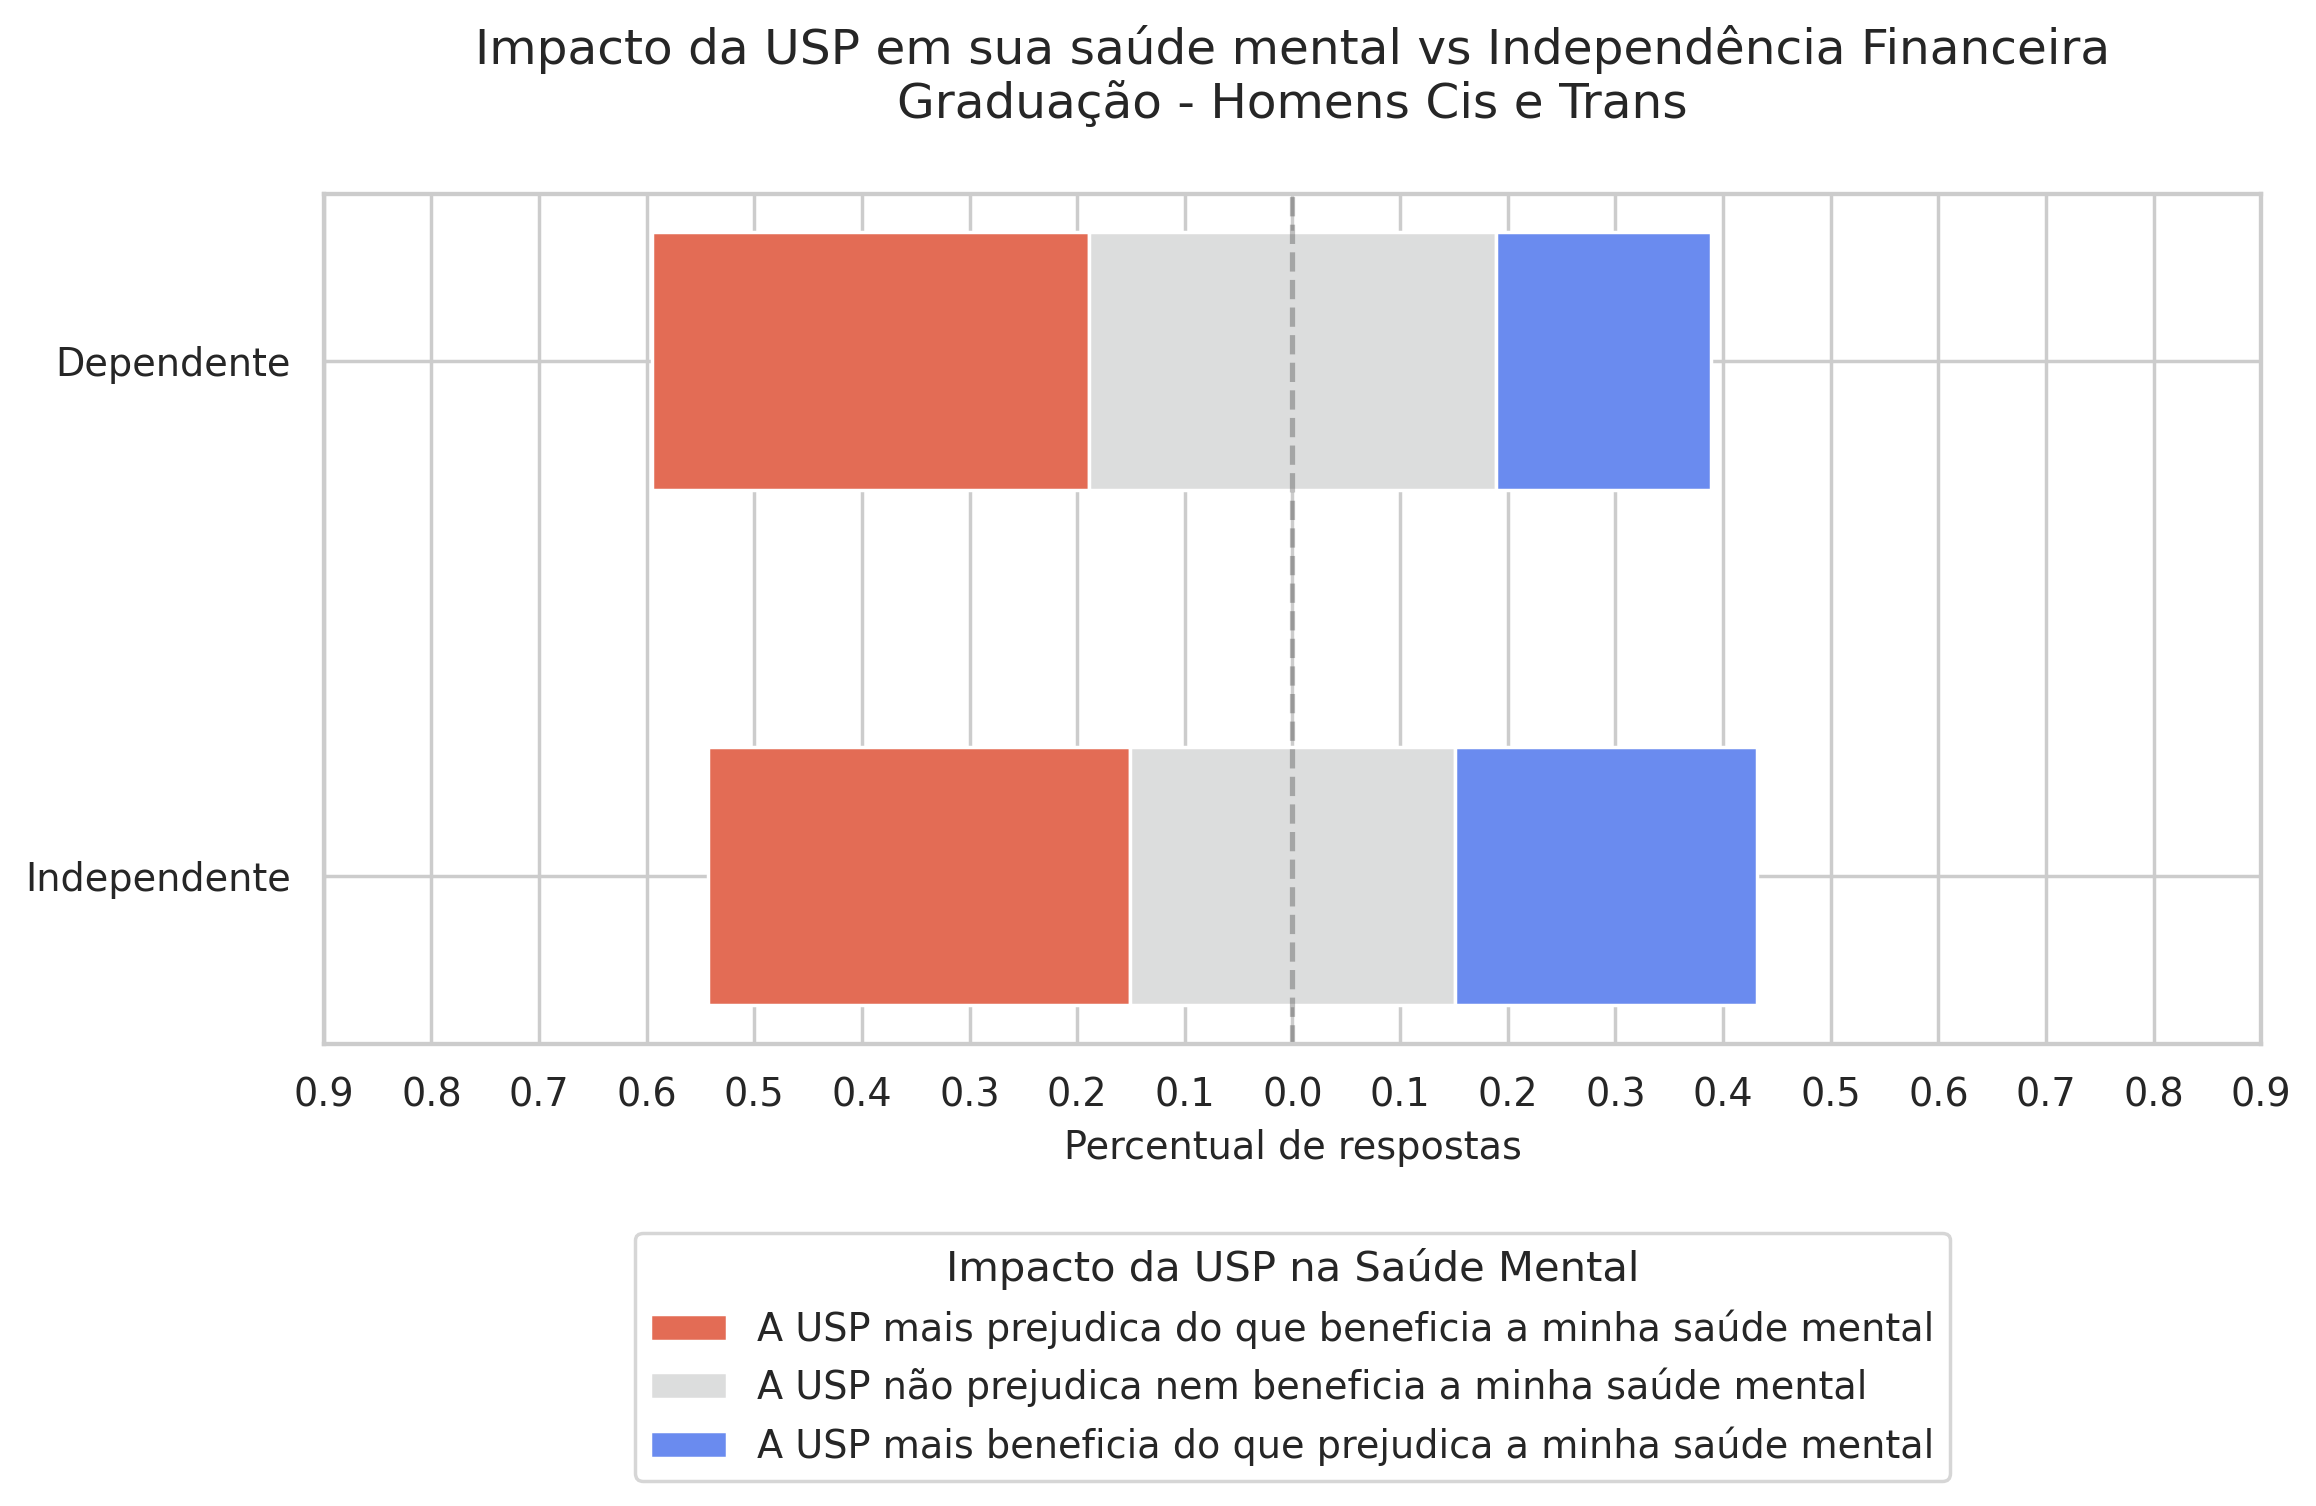

In [ ]:
df = tabcruzada_grad_a8h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Dependente', 'Independente'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Independência Financeira\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Dependente', 'Independente'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 9: Qual o seu tipo de ensino médio? vs Impacto da USP na Saúde Mental.

### Configurando

In [ ]:
# Substituir a resposta desejada
df_grad_mulheres['Tipo de ensino médio'] = df_grad_mulheres['Tipo de ensino médio'].replace('Curso regular, em escola escola regular', 'Curso regular, em escola regular')


/tmp/ipykernel_6935/257564341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_mulheres['Tipo de ensino médio'] = df_grad_mulheres['Tipo de ensino médio'].replace('Curso regular, em escola escola regular', 'Curso regular, em escola regular')


In [ ]:
df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
    df_grad_mulheres['Tipo de ensino médio'].str.contains('Integral|integral'),
    'Curso integral, em escola regular',
    df_grad_mulheres['Tipo de ensino médio']
)

df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
    df_grad_mulheres['Tipo de ensino médio'].str.contains('militar|Militar'),
    'Curso regular, em escola escola regular',
    df_grad_mulheres['Tipo de ensino médio']
)

df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
    df_grad_mulheres['Tipo de ensino médio'].str.contains('encceja|Encceja|ENCCEJA|Exame Nacional para Certificação de Competências de Jovens e Adultos'),
    'ENCCEJA',
    df_grad_mulheres['Tipo de ensino médio']
)

df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
    df_grad_mulheres['Tipo de ensino médio'].str.contains('EJA|eja|Ensino de Jovens Adultos|Supletivo|supletivo'),
    'Educação de Jovens e Adultos',
    df_grad_mulheres['Tipo de ensino médio']
)


/tmp/ipykernel_6935/3562890745.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_6935/3562890745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_6935/3562890745.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_grad_mulheres['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_6935/3562890745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [ ]:
df_grad_homens['Tipo de ensino médio'] = pd.np.where(
    df_grad_homens['Tipo de ensino médio'].str.contains('Integral|integral'),
    'Curso integral, em escola regular',
    df_grad_homens['Tipo de ensino médio']
)

df_grad_homens['Tipo de ensino médio'] = pd.np.where(
    df_grad_homens['Tipo de ensino médio'].str.contains('militar|Militar'),
    'Curso regular, em escola escola regular',
    df_grad_homens['Tipo de ensino médio']
)

df_grad_homens['Tipo de ensino médio'] = pd.np.where(
    df_grad_homens['Tipo de ensino médio'].str.contains('encceja|Encceja|ENCCEJA|Exame Nacional para Certificação de Competências de Jovens e Adultos'),
    'ENCCEJA',
    df_grad_homens['Tipo de ensino médio']
)

df_grad_homens['Tipo de ensino médio'] = pd.np.where(
    df_grad_homens['Tipo de ensino médio'].str.contains('EJA|eja|Ensino de Jovens Adultos|Supletivo|supletivo'),
    'Educação de Jovens e Adultos',
    df_grad_homens['Tipo de ensino médio']
)


/tmp/ipykernel_6935/3208638124.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_grad_homens['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_6935/3208638124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_homens['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_6935/3208638124.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_grad_homens['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_6935/3208638124.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

### Tabela cruzada

In [ ]:
tabcruzada_grad_a9m = pd.crosstab(df_grad_mulheres['Tipo de ensino médio'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a9m = tabcruzada_grad_a9m.astype(float)
tabcruzada_grad_a9m = tabcruzada_grad_a9m.reindex(index= ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'], columns=ordem_saude_mental)

tabcruzada_grad_a9m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Tipo de ensino médio                                                                                                                                             
Curso regular, em escola regular                                                                                                             0.426510            
Curso integral, em escola regular                                                                                                            0.500000            
Curso regular, em escola técnica                                                                                                             0.550336            
Curso regular e técnico em escola técnica                                                                                                    0.514881            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Tipo de ensino médio                                                                                                                                                                                                      
Curso regular, em escola regular                                                                                                             0.381425                                                                     
Curso integral, em escola regular                                                                                                            0.250000                                                                     
Curso regular, em escola técnica                                                                                                             0.281879                                                                     
Curso regular e técnico em escola técnica                                                                                                    0.357143                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Tipo de ensino médio                                                                                                                                            
Curso regular, em escola regular                                                                                                             0.174031           
Curso integral, em escola regular                                                                                                            0.250000           
Curso regular, em escola técnica                                                                                                             0.147651           
Curso regular e técnico em escola técnica                                                                                                    0.110119

In [ ]:
tabcruzada_grad_a9h = pd.crosstab(df_grad_homens['Tipo de ensino médio'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a9h = tabcruzada_grad_a9h.astype(float)
tabcruzada_grad_a9h = tabcruzada_grad_a9h.reindex(index= ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'], columns=ordem_saude_mental)

tabcruzada_grad_a9h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Tipo de ensino médio                                                                                                                                             
Curso regular, em escola regular                                                                                                             0.368990            
Curso integral, em escola regular                                                                                                            0.111111            
Curso regular, em escola técnica                                                                                                             0.470085            
Curso regular e técnico em escola técnica                                                                                                    0.482759            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Tipo de ensino médio                                                                                                                                                                                                      
Curso regular, em escola regular                                                                                                             0.362981                                                                     
Curso integral, em escola regular                                                                                                            0.666667                                                                     
Curso regular, em escola técnica                                                                                                             0.384615                                                                     
Curso regular e técnico em escola técnica                                                                                                    0.337931                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Tipo de ensino médio                                                                                                                                            
Curso regular, em escola regular                                                                                                             0.246394           
Curso integral, em escola regular                                                                                                            0.222222           
Curso regular, em escola técnica                                                                                                             0.111111           
Curso regular e técnico em escola técnica                                                                                                    0.168966

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Tipo de ensino médio'])

Qui2   p-Valor
Tipo de ensino médio  66.077863  0.042705

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Tipo de ensino médio'])

Qui2   p-Valor
Tipo de ensino médio  45.472133  0.014491

### Plot likert

/tmp/ipykernel_6935/2856141020.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Curso regular, em escola regular',


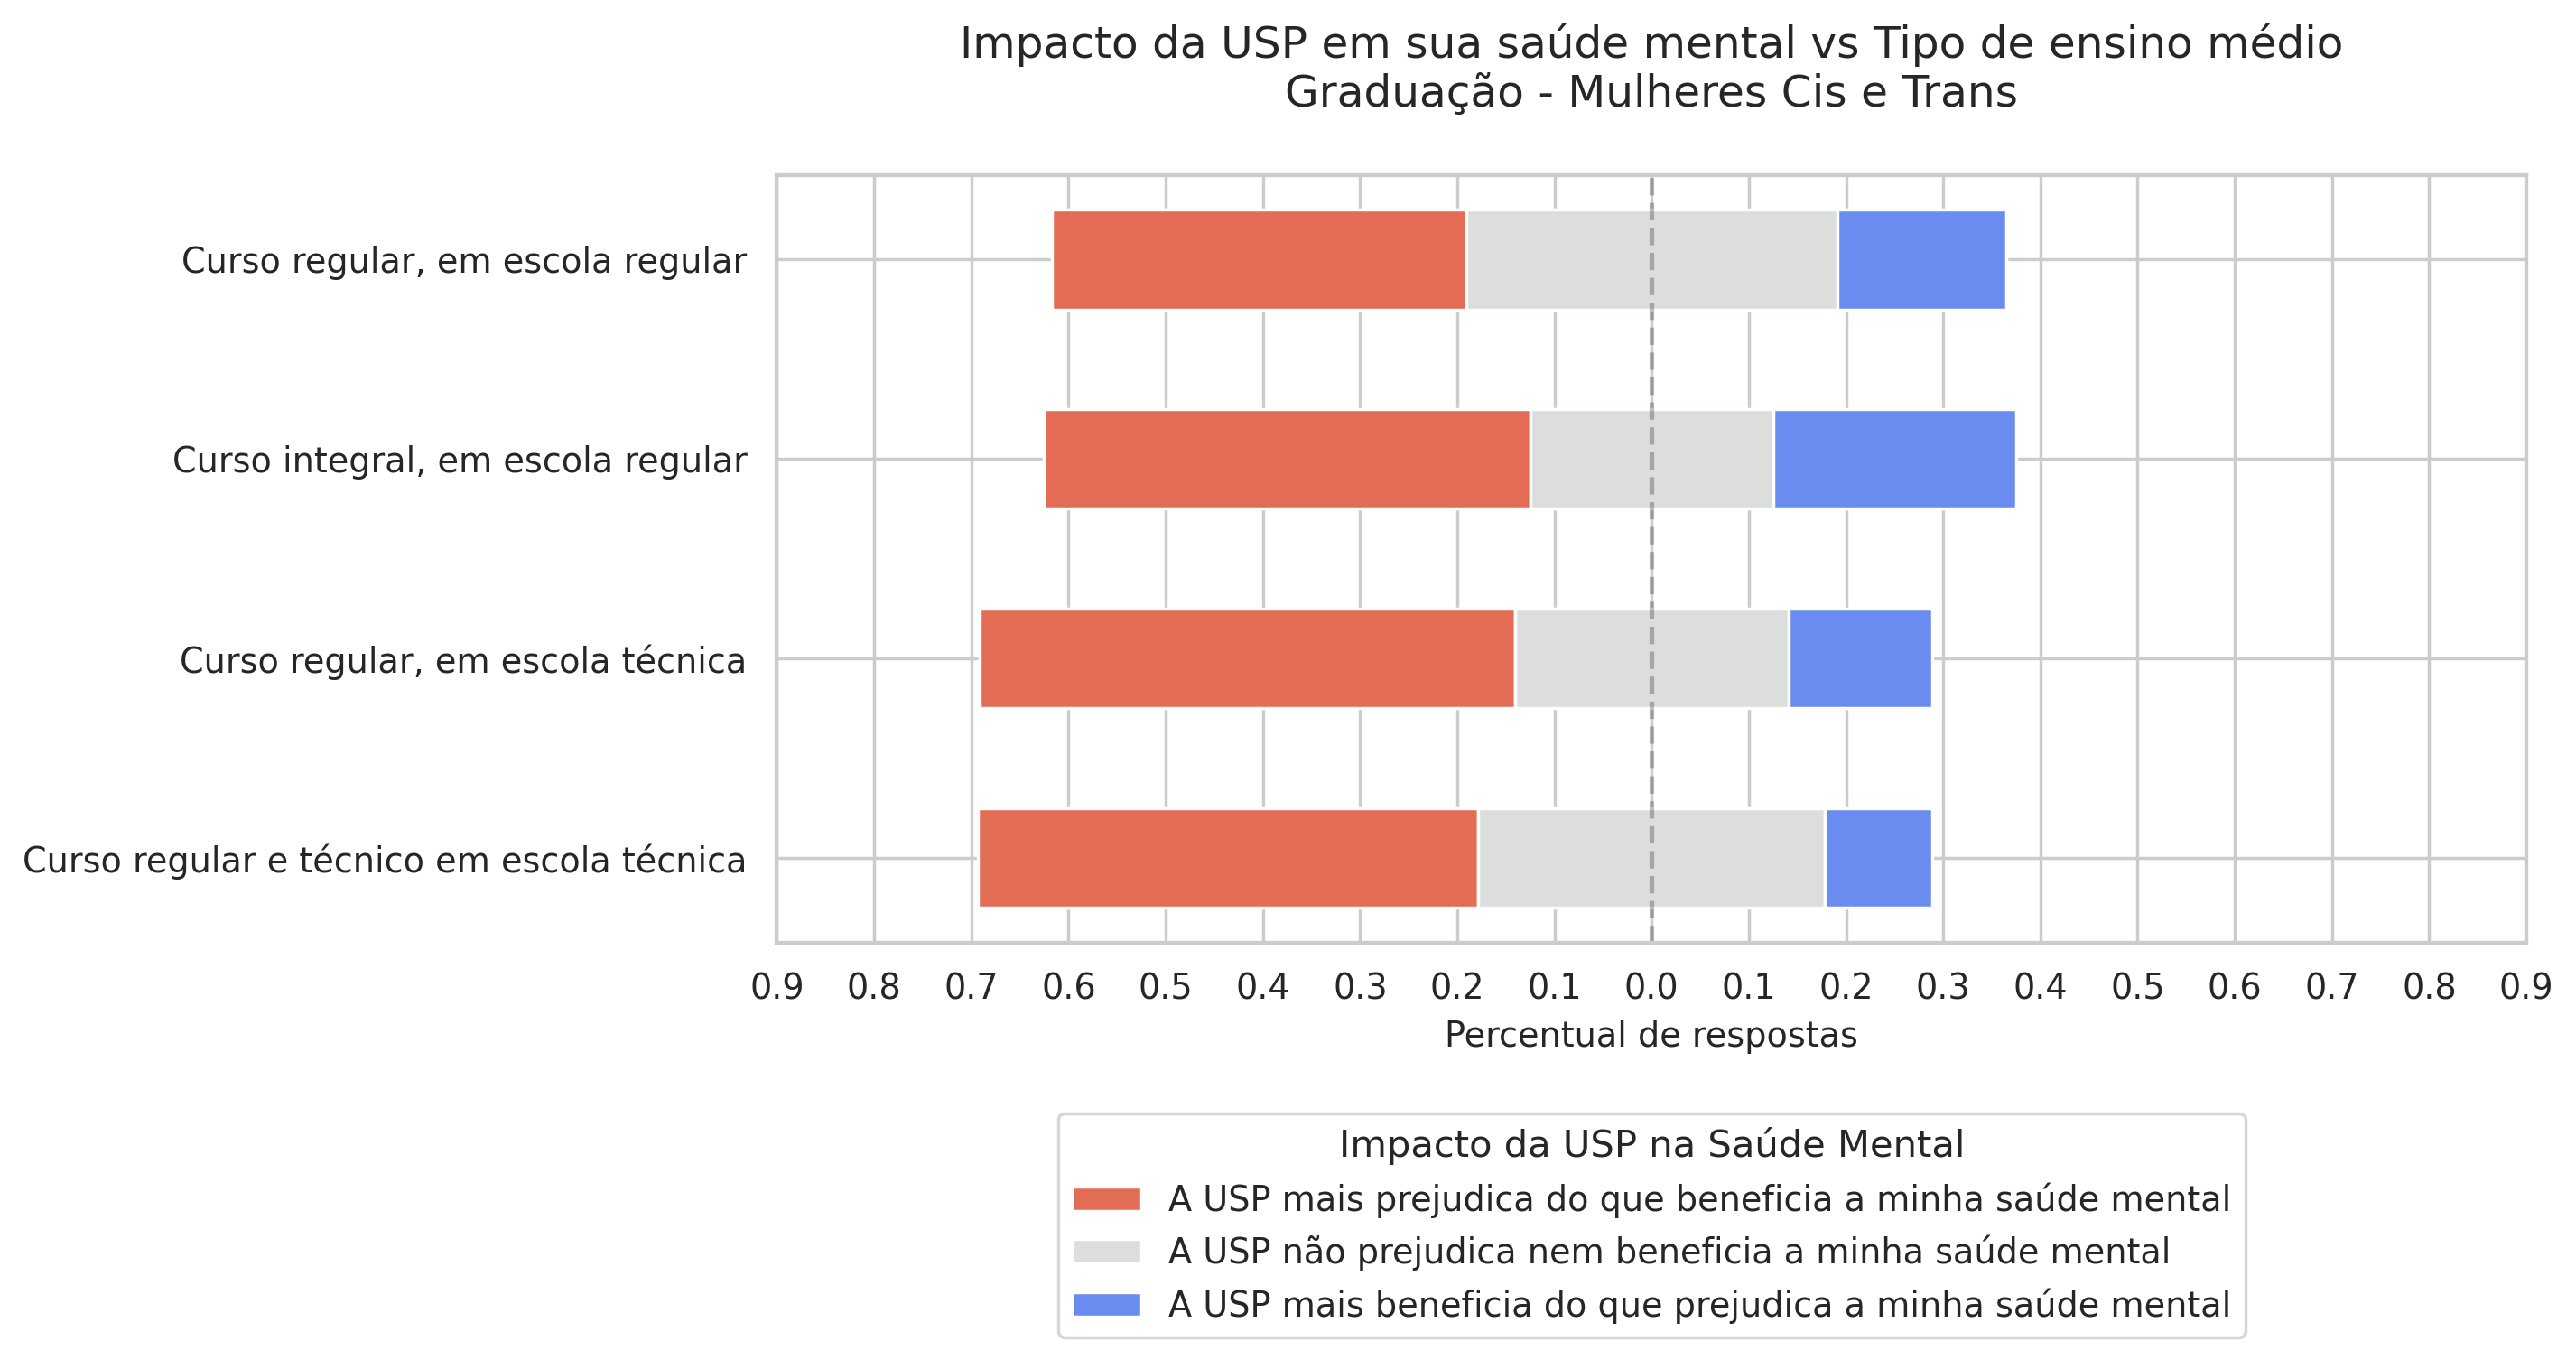

In [ ]:
df = tabcruzada_grad_a9m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Tipo de ensino médio\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/1499306719.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Curso regular, em escola regular',


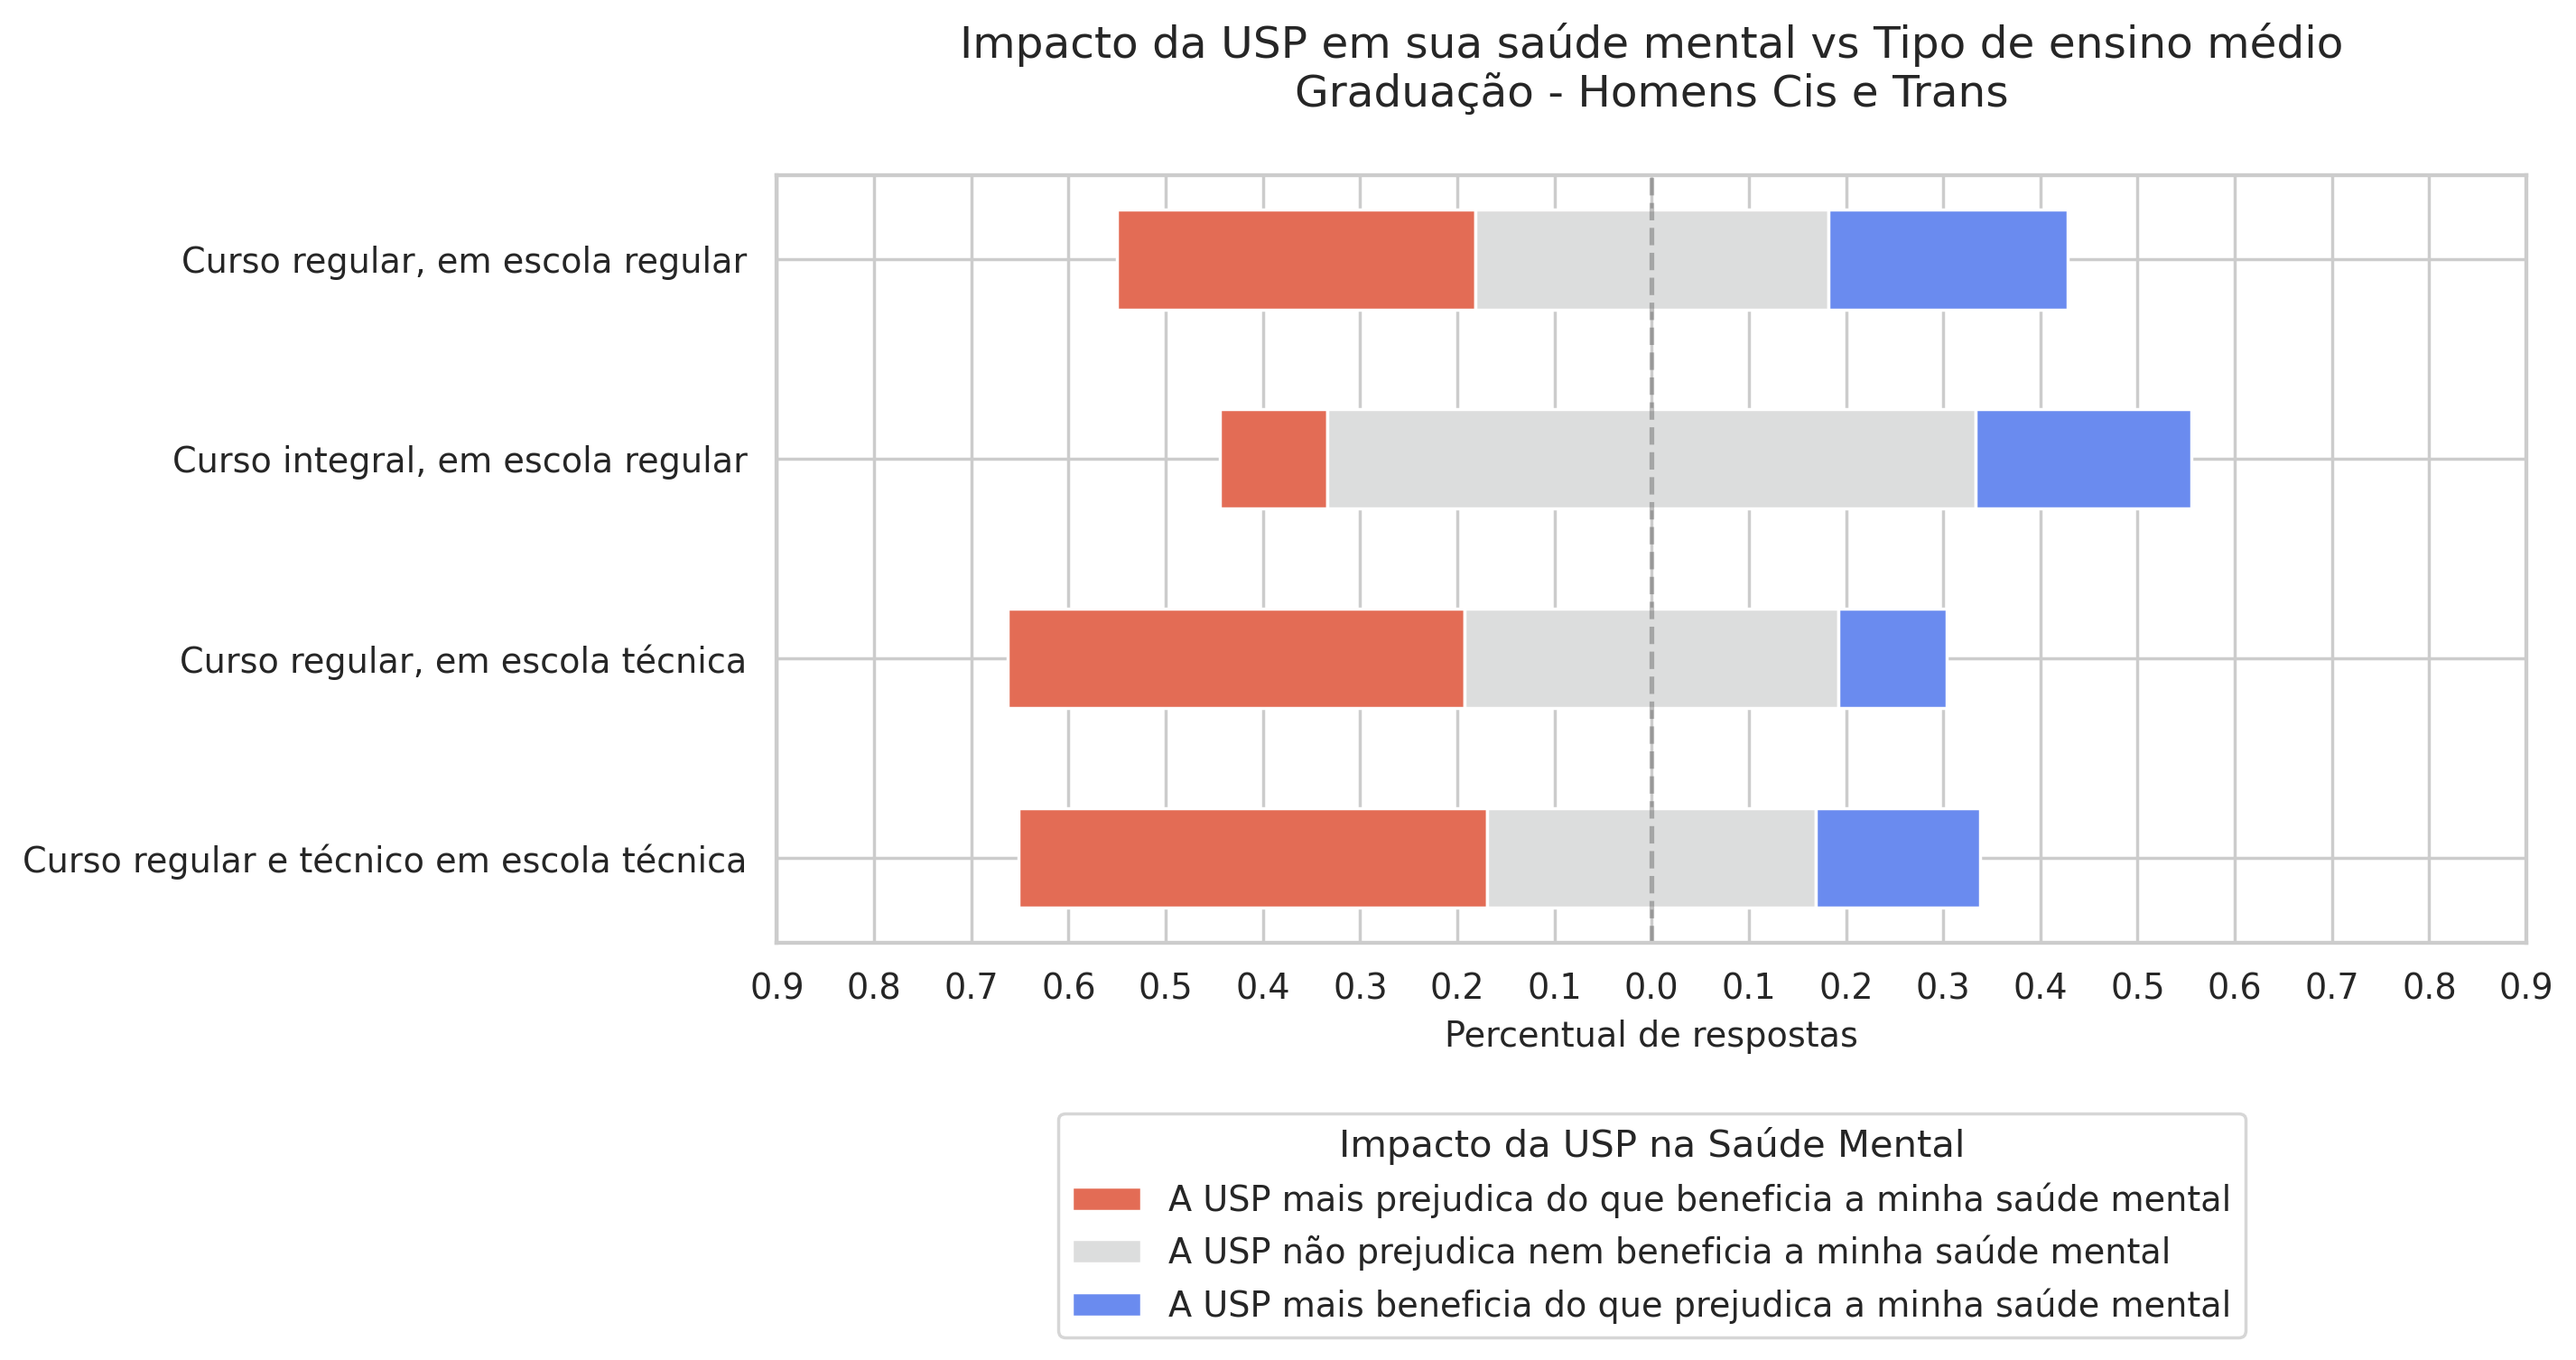

In [ ]:
df = tabcruzada_grad_a9h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Tipo de ensino médio\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 10: Onde cursou o seu ensino médio? vs Impacto da USP na Saúde Mental.


In [ ]:
tabcruzada_grad_a10m = pd.crosstab(df_grad_mulheres['Onde cursou o seu ensino médio?'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a10m = tabcruzada_grad_a10m.astype(float)
tabcruzada_grad_a10m = tabcruzada_grad_a10m.reindex(index=['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'], columns=ordem_saude_mental)

tabcruzada_grad_a10m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Onde cursou o seu ensino médio?                                                                                                                                  
Só em escola(s) pública(s)                                                                                                                   0.500000            
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.375000            
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.333333            
Só em escola(a) privada(s), com bolsa integral                                                                                               0.422078            
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.394904            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Onde cursou o seu ensino médio?                                                                                                                                                                                           
Só em escola(s) pública(s)                                                                                                                   0.338395                                                                     
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.250000                                                                     
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.377778                                                                     
Só em escola(a) privada(s), com bolsa integral                                                                                               0.428571                                                                     
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.403397                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Onde cursou o seu ensino médio?                                                                                                                                 
Só em escola(s) pública(s)                                                                                                                   0.143167           
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.333333           
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.288889           
Só em escola(a) privada(s), com bolsa integral                                                                                               0.136364           
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.182590

In [ ]:
tabcruzada_grad_a10h = pd.crosstab(df_grad_homens['Onde cursou o seu ensino médio?'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a10h = tabcruzada_grad_a10h.astype(float)
tabcruzada_grad_a10h = tabcruzada_grad_a10h.reindex(index=['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'], columns=ordem_saude_mental)

tabcruzada_grad_a10h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Onde cursou o seu ensino médio?                                                                                                                                  
Só em escola(s) pública(s)                                                                                                                   0.445748            
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.300000            
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.285714            
Só em escola(a) privada(s), com bolsa integral                                                                                               0.429487            
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.322751            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Onde cursou o seu ensino médio?                                                                                                                                                                                           
Só em escola(s) pública(s)                                                                                                                   0.362170                                                                     
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.400000                                                                     
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.371429                                                                     
Só em escola(a) privada(s), com bolsa integral                                                                                               0.339744                                                                     
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.367725                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Onde cursou o seu ensino médio?                                                                                                                                 
Só em escola(s) pública(s)                                                                                                                   0.171554           
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.200000           
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.314286           
Só em escola(a) privada(s), com bolsa integral                                                                                               0.217949           
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.291005

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Onde cursou o seu ensino médio?'])

Qui2   p-Valor
Onde cursou o seu ensino médio?  32.062371  0.006313

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Onde cursou o seu ensino médio?'])

Qui2   p-Valor
Onde cursou o seu ensino médio?  34.051339  0.003349

### Plot Likert

/tmp/ipykernel_6935/3845156182.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Só em escola(s) pública(s)',


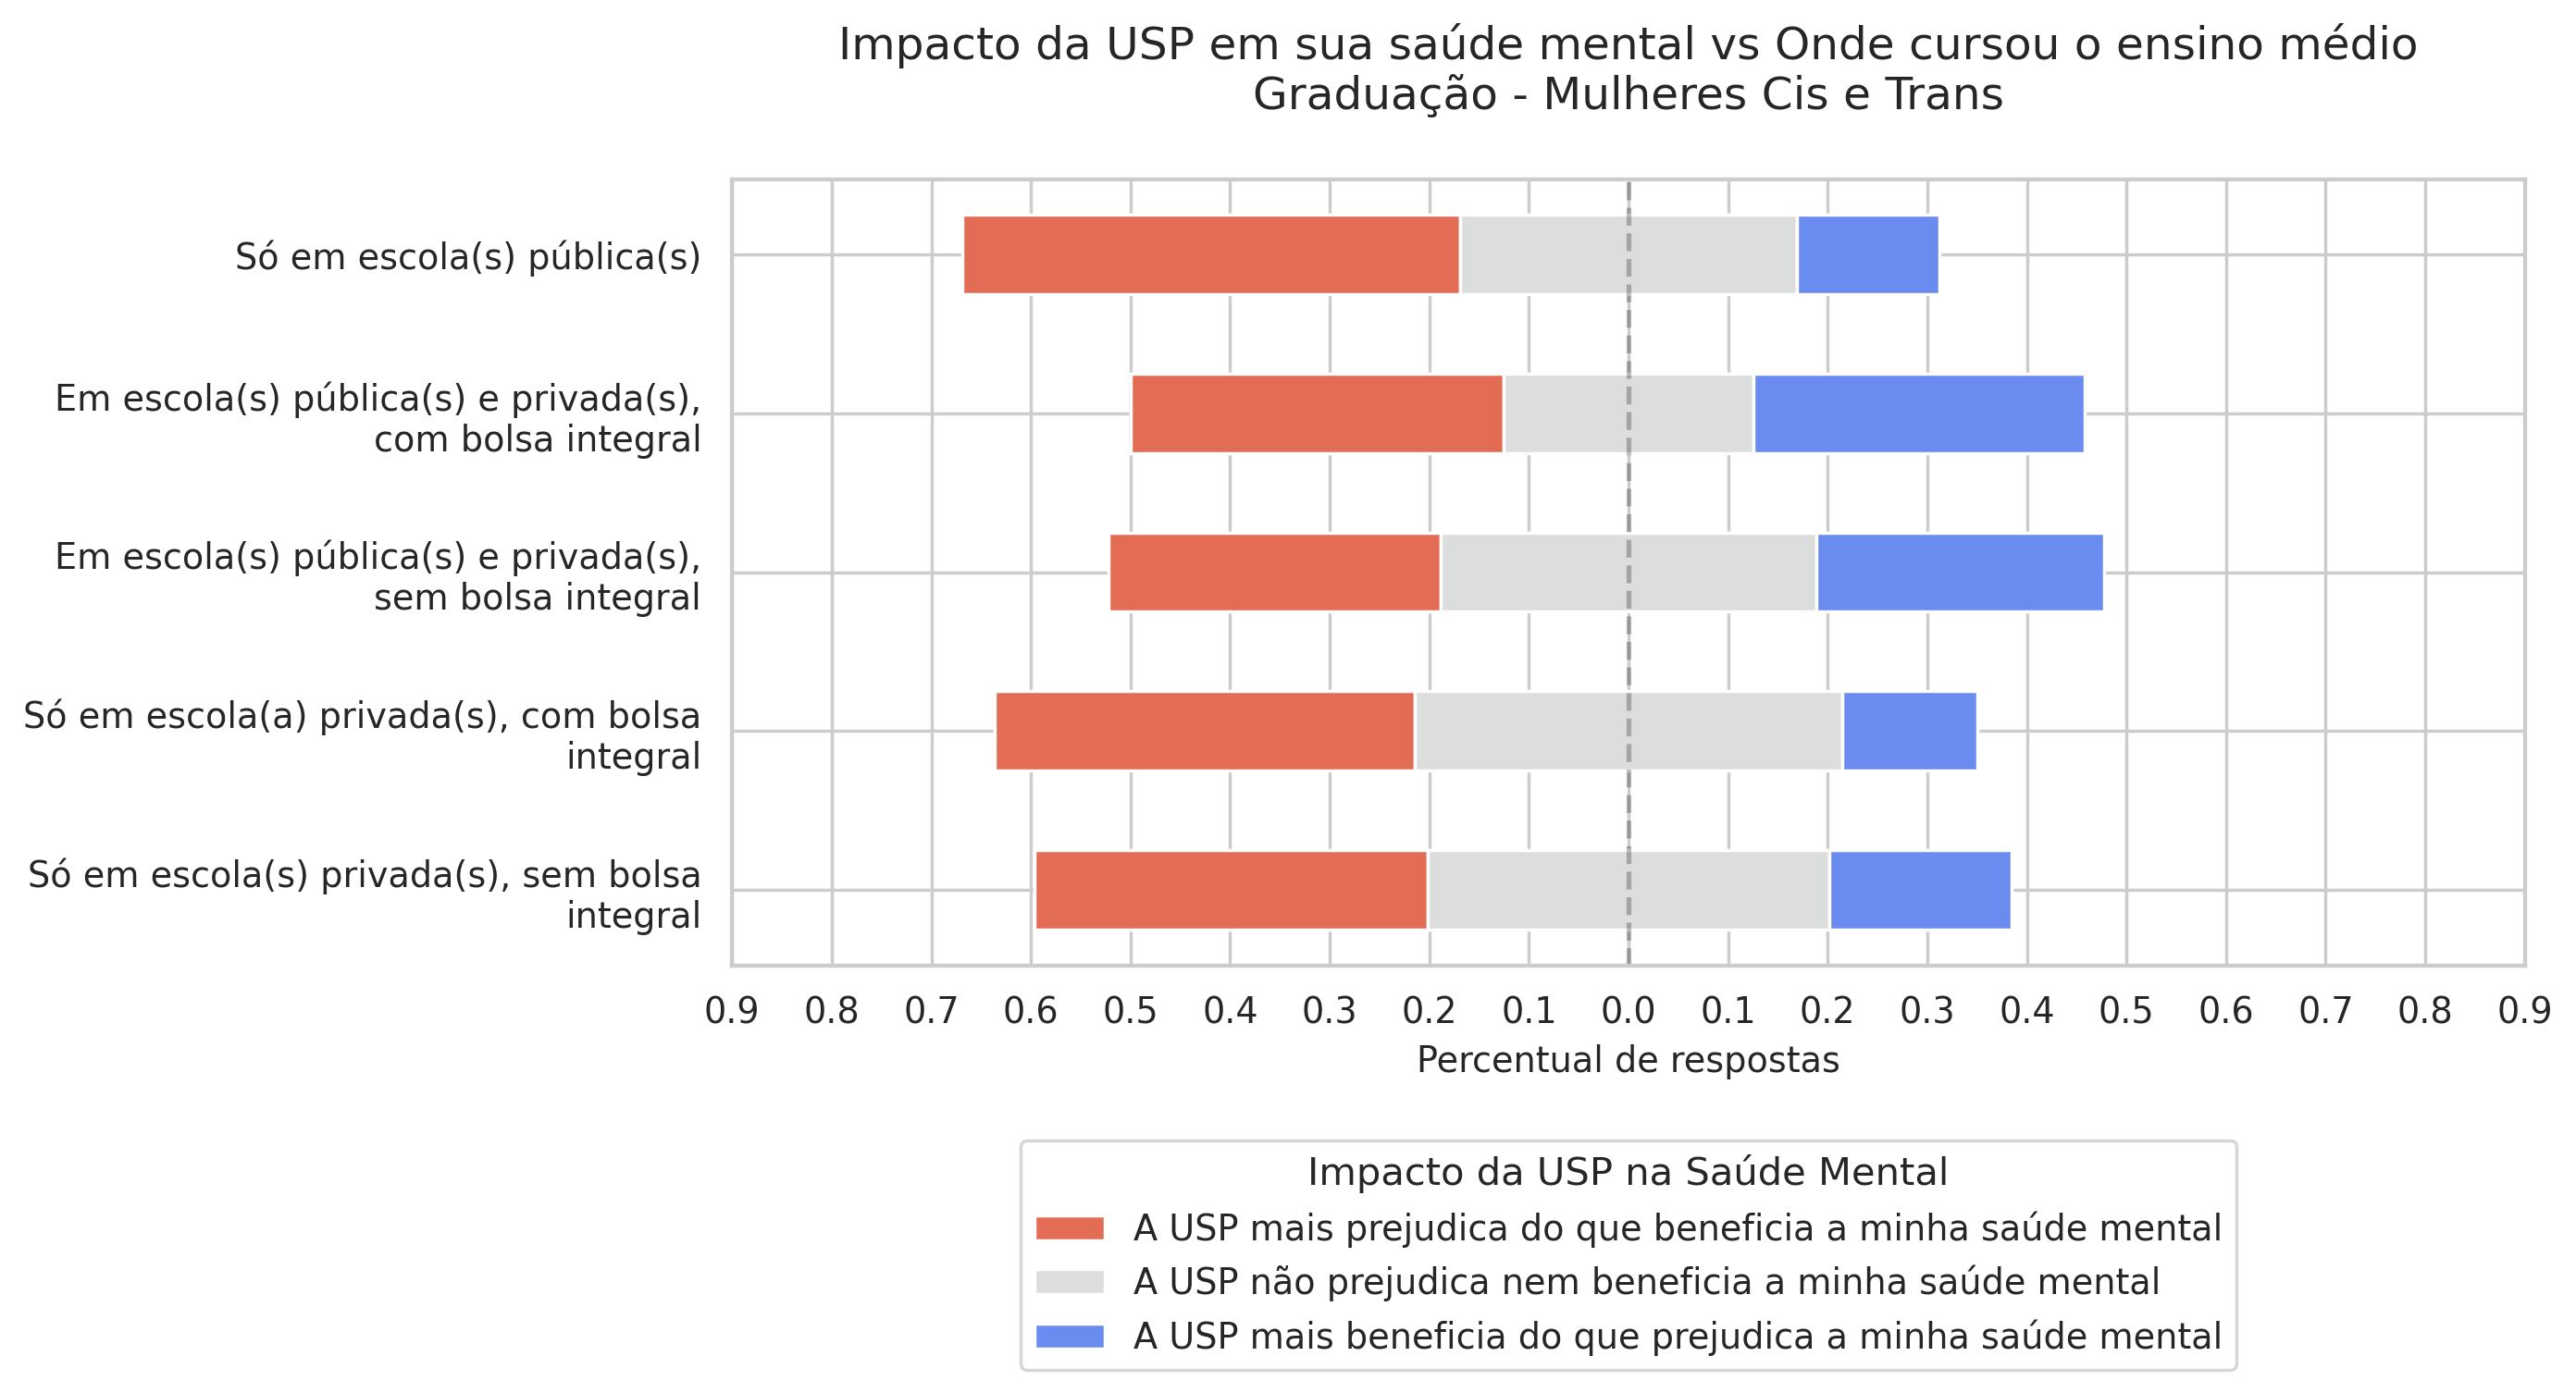

In [ ]:
df = tabcruzada_grad_a10m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Onde cursou o ensino médio\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s),\ncom bolsa integral',
'Em escola(s) pública(s) e privada(s),\nsem bolsa integral',
'Só em escola(a) privada(s), com bolsa\nintegral',
'Só em escola(s) privada(s), sem bolsa\nintegral'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/1680308686.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Só em escola(s) pública(s)',


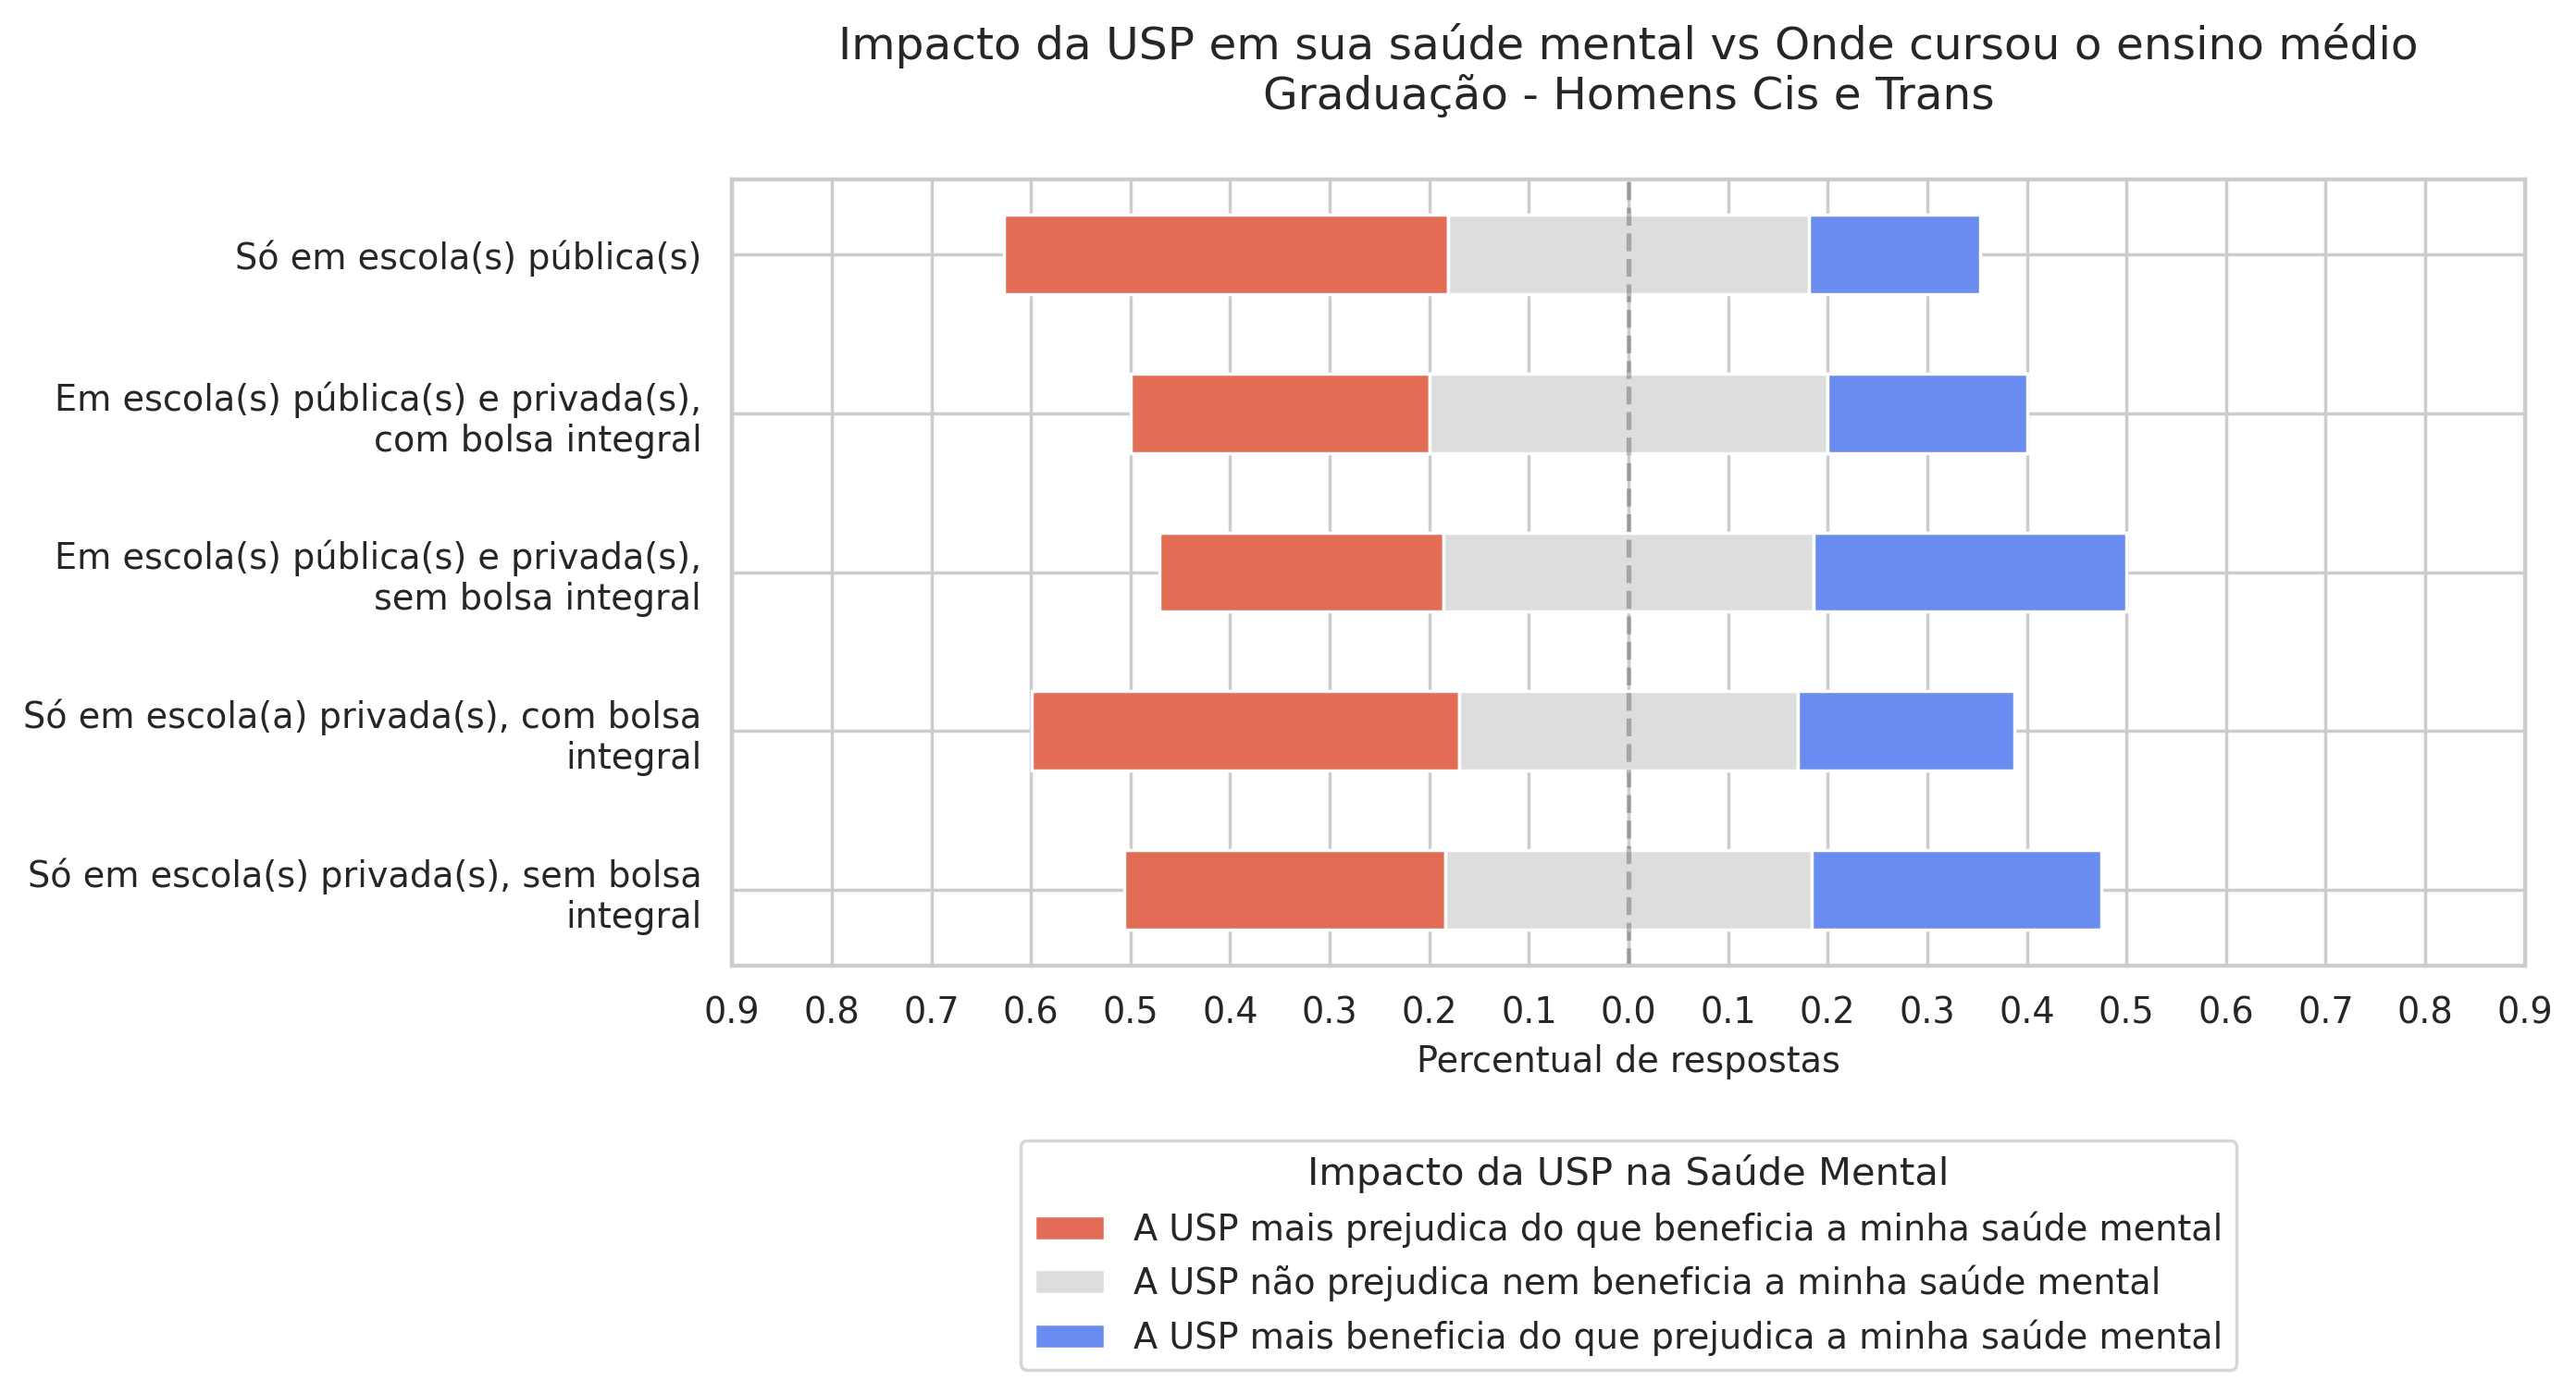

In [ ]:
df = tabcruzada_grad_a10h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Onde cursou o ensino médio\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s),\ncom bolsa integral',
'Em escola(s) pública(s) e privada(s),\nsem bolsa integral',
'Só em escola(a) privada(s), com bolsa\nintegral',
'Só em escola(s) privada(s), sem bolsa\nintegral'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 11:  Cor/Raça vs Impacto da USP na Saúde Mental


In [ ]:
df_graduacao['Qual sua cor/raça (critério IBGE)']

In [ ]:
tabcruzada_grad_a11m = pd.crosstab(df_grad_mulheres['Qual sua cor/raça (critério IBGE)'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a11m = tabcruzada_grad_a11m.astype(float)
tabcruzada_grad_a11m = tabcruzada_grad_a11m.reindex(index=['preta', 'parda', 'indígena', 'amarela', 'branca'], columns=ordem_saude_mental)

tabcruzada_grad_a11m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual sua cor/raça (critério IBGE)                                                                                                                                
preta                                                                                                                                        0.576271            
parda                                                                                                                                        0.488764            
indígena                                                                                                                                     0.250000            
amarela                                                                                                                                      0.381579            
branca                                                                                                                                       0.426246            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual sua cor/raça (critério IBGE)                                                                                                                                                                                         
preta                                                                                                                                        0.271186                                                                     
parda                                                                                                                                        0.351124                                                                     
indígena                                                                                                                                     0.750000                                                                     
amarela                                                                                                                                      0.421053                                                                     
branca                                                                                                                                       0.382503                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Qual sua cor/raça (critério IBGE)                                                                                                                               
preta                                                                                                                                        0.146893           
parda                                                                                                                                        0.134831           
indígena                                                                                                                                     0.000000           
amarela                                                                                                                                      0.184211           
branca                                                                                                                                       0.172940

In [ ]:
tabcruzada_grad_a11h = pd.crosstab(df_grad_homens['Qual sua cor/raça (critério IBGE)'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a11h = tabcruzada_grad_a11h.astype(float)
tabcruzada_grad_a11h = tabcruzada_grad_a11h.reindex(index=['preta', 'parda', 'indígena', 'amarela', 'branca'], columns=ordem_saude_mental)

tabcruzada_grad_a11h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual sua cor/raça (critério IBGE)                                                                                                                                
preta                                                                                                                                        0.503597            
parda                                                                                                                                        0.412214            
indígena                                                                                                                                          NaN            
amarela                                                                                                                                      0.480000            
branca                                                                                                                                       0.370277            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual sua cor/raça (critério IBGE)                                                                                                                                                                                         
preta                                                                                                                                        0.330935                                                                     
parda                                                                                                                                        0.358779                                                                     
indígena                                                                                                                                          NaN                                                                     
amarela                                                                                                                                      0.300000                                                                     
branca                                                                                                                                       0.372796                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Qual sua cor/raça (critério IBGE)                                                                                                                               
preta                                                                                                                                        0.136691           
parda                                                                                                                                        0.217557           
indígena                                                                                                                                          NaN           
amarela                                                                                                                                      0.180000           
branca                                                                                                                                       0.236776

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Qual sua cor/raça (critério IBGE)'])

Qui2   p-Valor
Qual sua cor/raça (critério IBGE)  32.220501  0.055607

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Qual sua cor/raça (critério IBGE)'])

Qui2   p-Valor
Qual sua cor/raça (critério IBGE)  21.601935  0.118674

### Plot likert

/tmp/ipykernel_6935/1106777758.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Preta', 'Parda', 'Indígena', 'Amarela', 'Branca'])


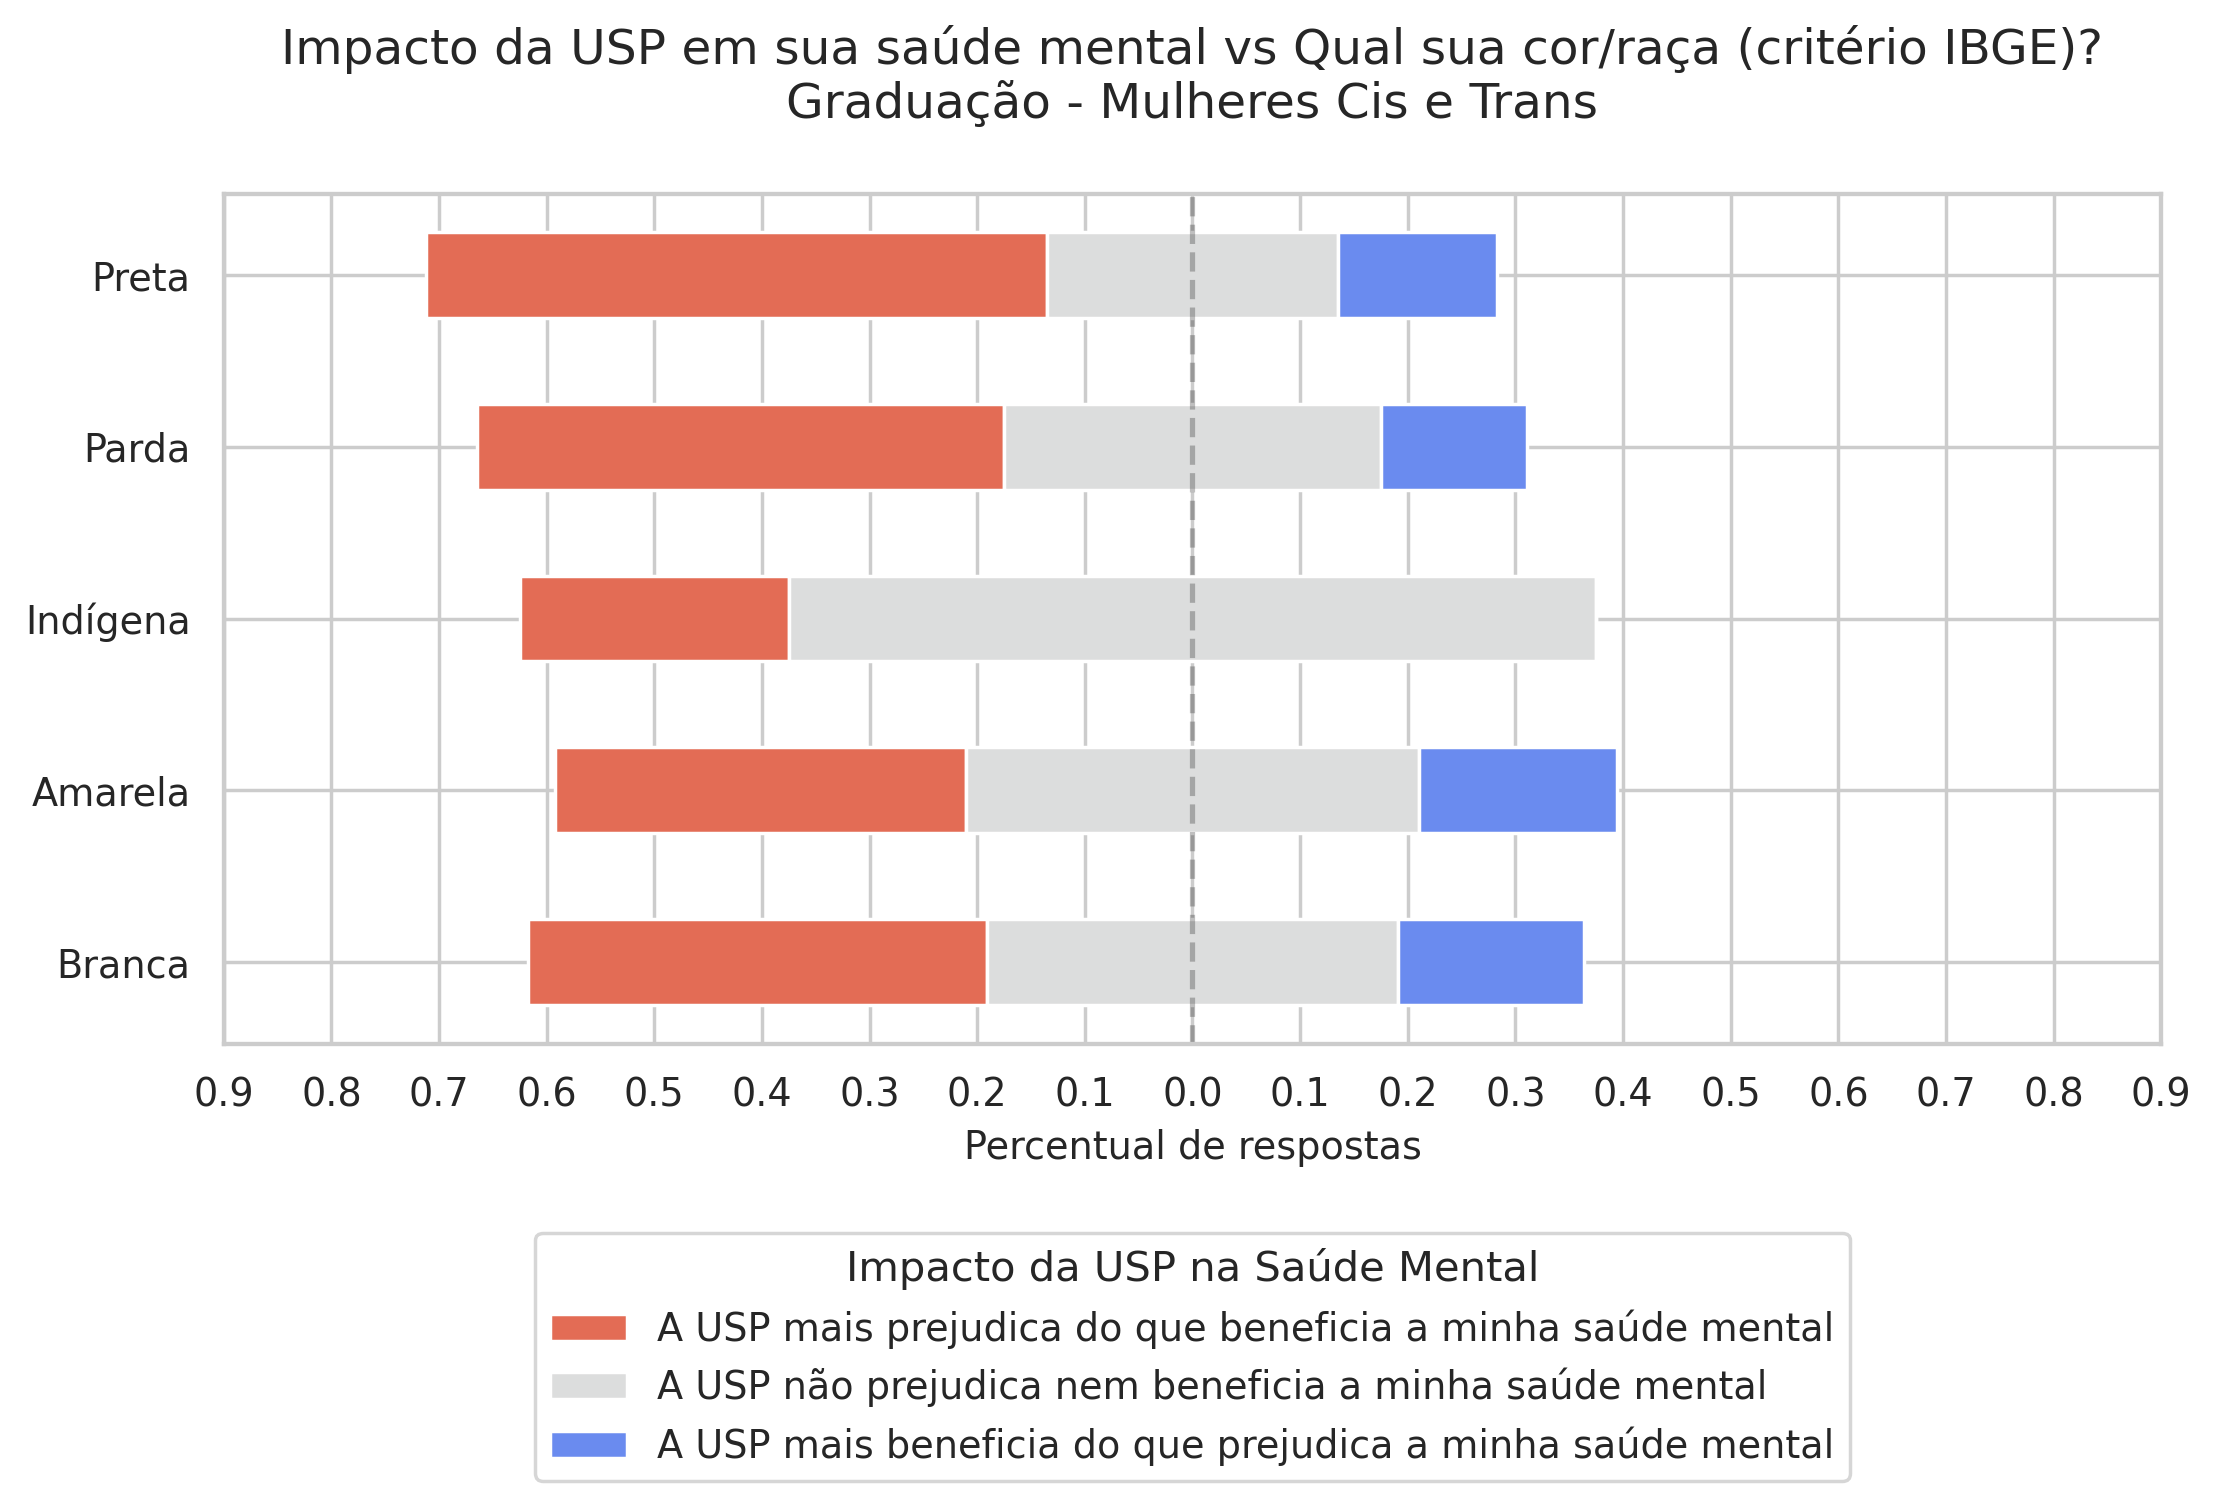

In [ ]:
df = tabcruzada_grad_a11m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['preta', 'parda', 'indígena', 'amarela', 'branca'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Qual sua cor/raça (critério IBGE)?\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Preta', 'Parda', 'Indígena', 'Amarela', 'Branca'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/2108044703.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Preta', 'Parda', 'Indígena', 'Amarela', 'Branca'])


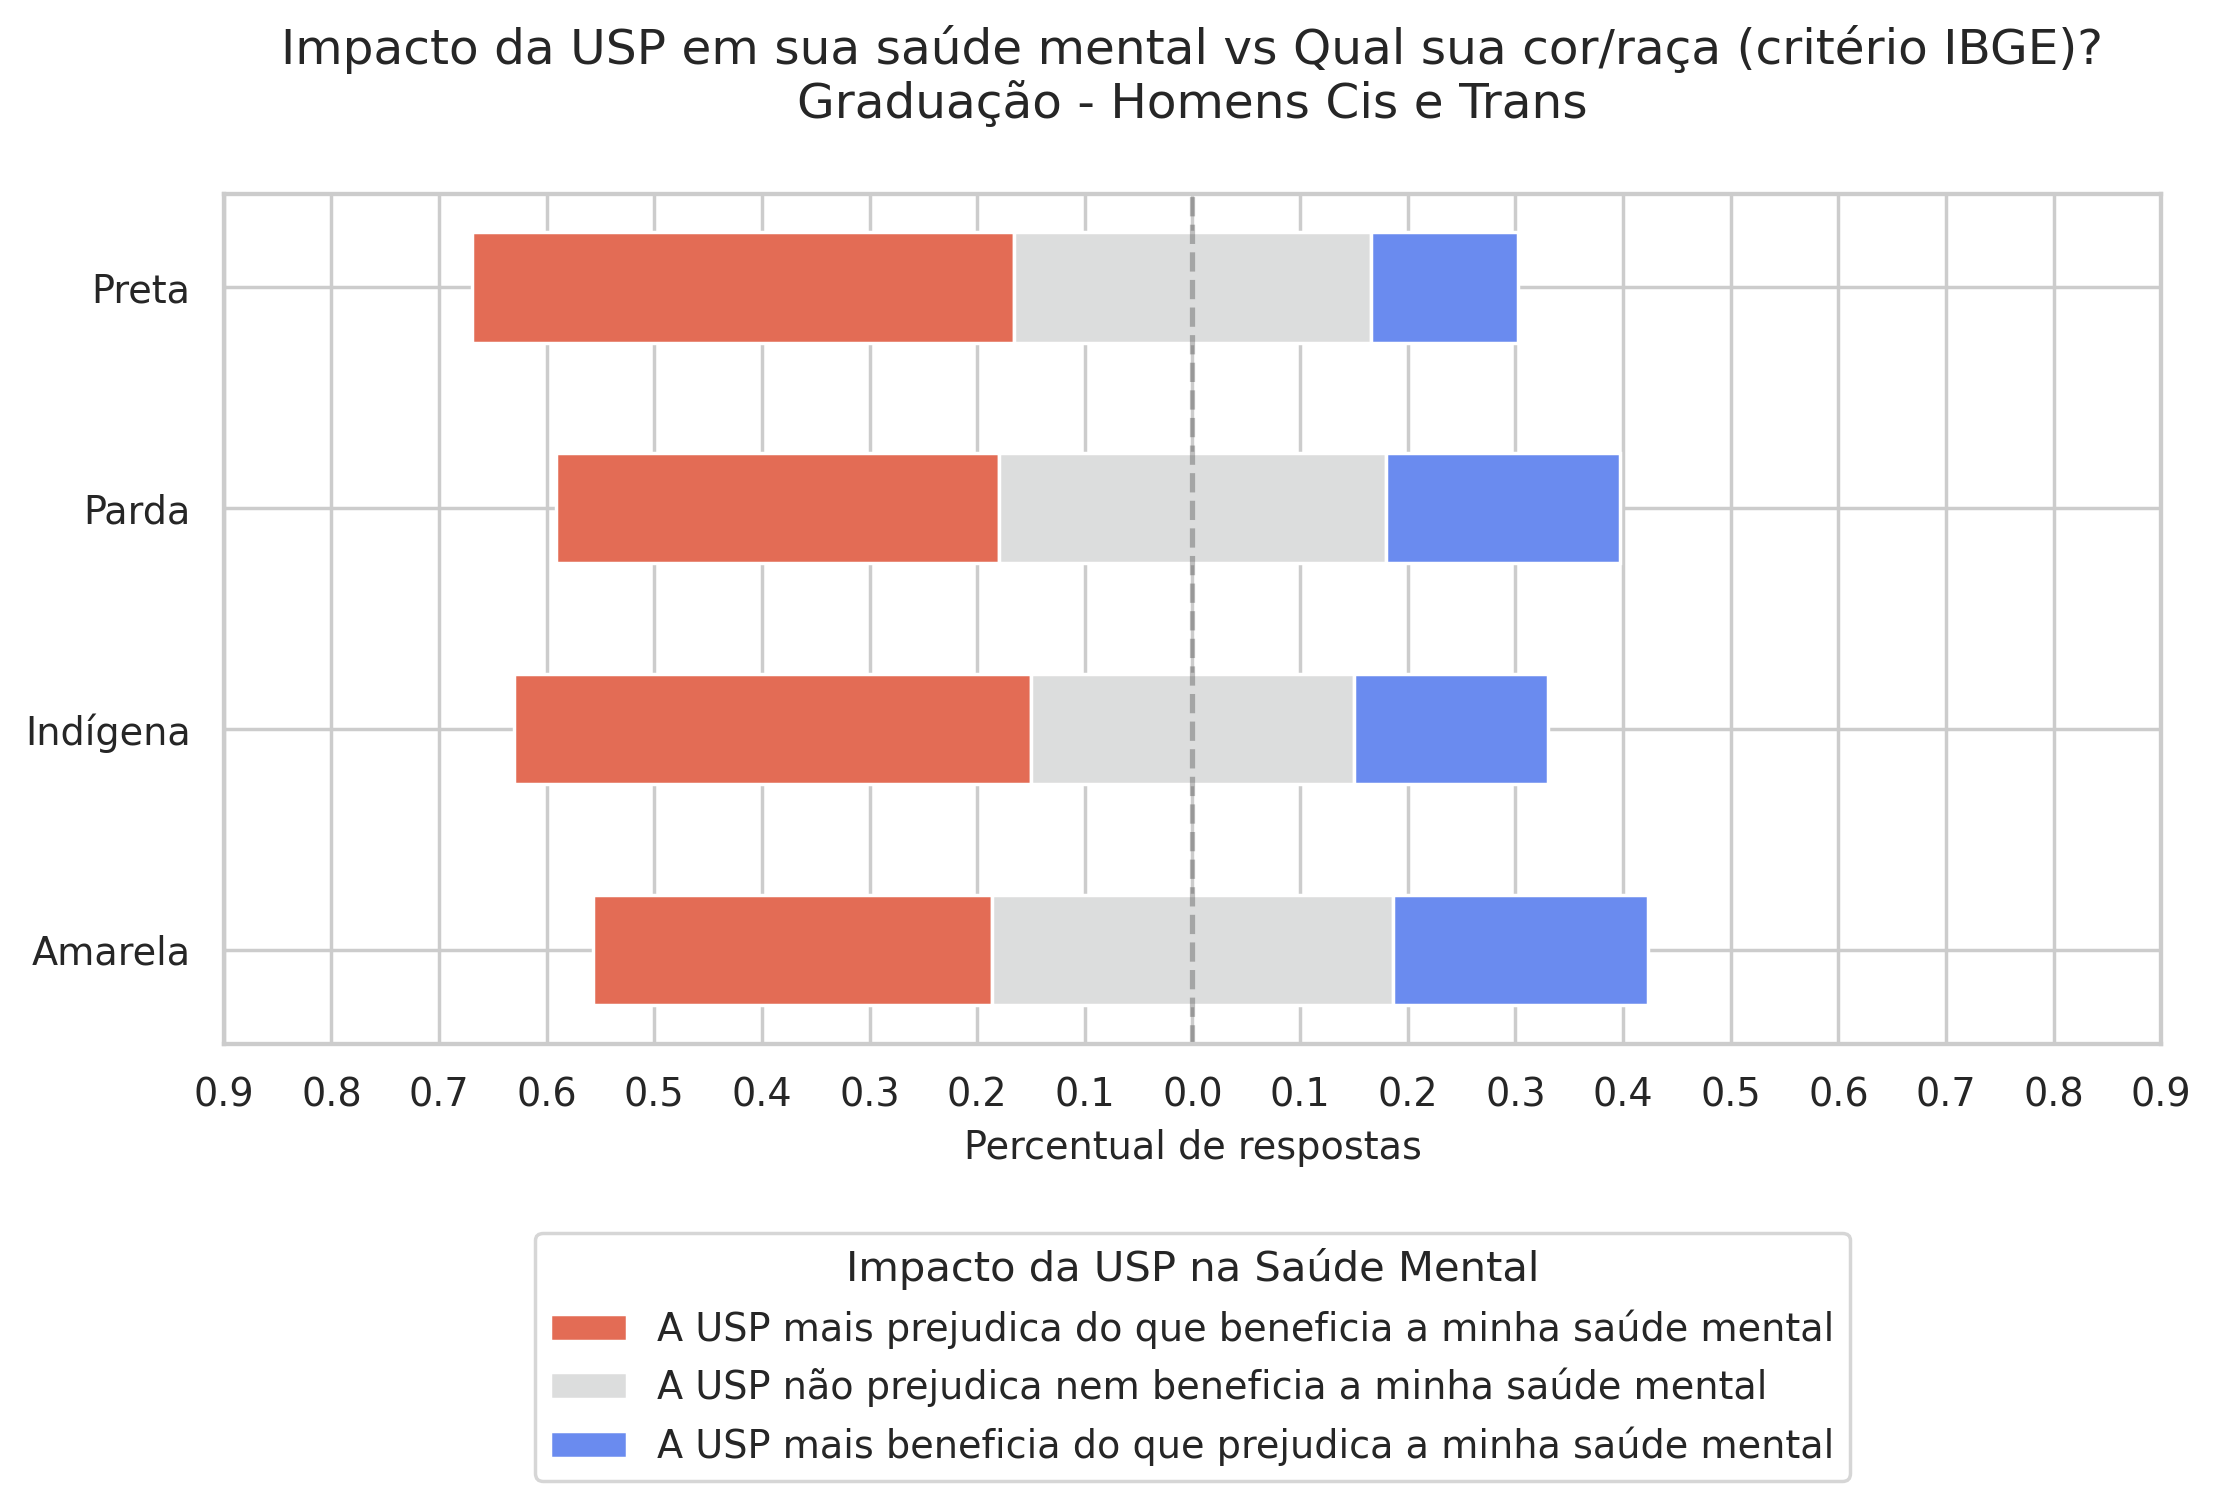

In [ ]:
df = tabcruzada_grad_a11h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['preta', 'parda', 'indígena', 'amarela', 'branca'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Qual sua cor/raça (critério IBGE)?\nGraduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Preta', 'Parda', 'Indígena', 'Amarela', 'Branca'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 12:  Nível educacional mais alto responsável 1? vs Impacto da USP na Saúde Mental (Graduação).

### Tabela cruzada

In [ ]:
# Dicionário de mapeamento para as substituições
mapeamento = {
    'Técnico em enfermagem': 'Ensino técnico completo',
    'Ensino Médio e Técnico de Nível Médio completos': 'Ensino técnico completo',
    'Ensino médio Completo e Nível Técnico': 'Ensino técnico completo',
    'Supletivo + Ensino Técnico ': 'Ensino técnico completo',
    'Ensino técnico completo': 'Ensino técnico completo',
    'Ensino técnico de enfermagem ': 'Ensino técnico completo',
    'Ensino Tecnico em Enfermagem': 'Ensino técnico completo',
    'Magisterio': 'Ensino técnico completo',
    'Até o ano passado, nível médio incompleto. Agora, depois de mais de 20 anos sem estudar, ensino médio completo - porquê incentivei a realização da prova do Encceja.': 'Ensino médio completo',
    'Minha mãe e responsável legal é graduada em farmácia. Minha vó, com quem moro, tem ensino fundamental incompleto.': 'Graduação completa',
    'Ensino superior completo': 'Graduação completa',
    'Livre-docência ': 'Doutorado completo',
    'Ensino superior incompleto': 'Graduação incompleta',
    'Graduação': 'Graduação completa',
    'Mestrado':'Mestrado completo',
    'Doutorado':'Doutorado completo',
    'Técnico' : 'Ensino técnico completo',
    'Não sei' : 'Não se aplica',
    'MInha mãe faleceu em 2019, eu tenho 58 anos de idade.' : 'Não se aplica'
}

df_grad_mulheres['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'] = df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'].replace(mapeamento)

df_grad_homens['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'] = df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'].replace(mapeamento)

/tmp/ipykernel_6935/387878313.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_mulheres['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'] = df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'].replace(mapeamento)
/tmp/ipykernel_6935/387878313.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_homens['Qual é o nível educacional mais alto alcança

In [ ]:
ordem_nivel_educacional = ['Ensino fundamental incompleto',
                            'Ensino fundamental completo',
                            'Ensino médio incompleto',
                            'Ensino médio completo',
                            'Ensino técnico completo',
                            'Graduação incompleta',
                            'Graduação completa',
                            'Mestrado completo',
                            'Doutorado completo',
                            'Pós-graduação incompleta',
                            'Pós-graduação completa',
                            'Não frequentou escola',
                            'Não se aplica']

In [ ]:
df_grad_mulheres['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.']

In [ ]:
tabcruzada_grad_a12m = pd.crosstab(df_grad_mulheres['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a12m = tabcruzada_grad_a12m.astype(float)
tabcruzada_grad_a12m = tabcruzada_grad_a12m.reindex(index=['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'], columns=ordem_saude_mental)

tabcruzada_grad_a12m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                0.432927            
Ensino fundamental completo                                                                                                                  0.402439            
Ensino médio incompleto                                                                                                                      0.508772            
Ensino médio completo                                                                                                                        0.475177            
Ensino técnico completo                                                                                                                      0.666667            
Graduação incompleta                                                                                                                         0.470588            
Graduação completa                                                                                                                           0.458738            
Mestrado completo                                                                                                                            0.355556            
Doutorado completo                                                                                                                           0.432432            
Pós-graduação incompleta                                                                                                                     0.517241            
Pós-graduação completa                                                                                                                       0.453744            
Não frequentou escola                                                                                                                        0.312500            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                0.329268                                                                     
Ensino fundamental completo                                                                                                                  0.390244                                                                     
Ensino médio incompleto                                                                                                                      0.350877                                                                     
Ensino médio completo                                                                                                                        0.356974                                                                     
Ensino técnico completo                                                                                                                      0.333333                                                                     
Graduação incompleta                                                                                                                         0.352941                                                 

In [ ]:
tabcruzada_grad_a12h = pd.crosstab(df_grad_homens['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'], df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a12h = tabcruzada_grad_a12h.astype(float)
tabcruzada_grad_a12h = tabcruzada_grad_a12h.reindex(index=['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'], columns=ordem_saude_mental)

tabcruzada_grad_a12h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                0.400000            
Ensino fundamental completo                                                                                                                  0.482759            
Ensino médio incompleto                                                                                                                      0.372881            
Ensino médio completo                                                                                                                        0.453947            
Ensino técnico completo                                                                                                                      0.600000            
Graduação incompleta                                                                                                                         0.351648            
Graduação completa                                                                                                                           0.395210            
Mestrado completo                                                                                                                            0.451613            
Doutorado completo                                                                                                                           0.178571            
Pós-graduação incompleta                                                                                                                     0.545455            
Pós-graduação completa                                                                                                                       0.360976            
Não frequentou escola                                                                                                                        0.333333            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                0.352000                                                                     
Ensino fundamental completo                                                                                                                  0.344828                                                                     
Ensino médio incompleto                                                                                                                      0.389831                                                                     
Ensino médio completo                                                                                                                        0.328947                                                                     
Ensino técnico completo                                                                                                                      0.200000                                                                     
Graduação incompleta                                                                                                                         0.384615                                                 

### Qui quadrado

In [ ]:
qui_quadrado(df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_mulheres['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'])

Qui2   p-Valor
Qual é o nível educacional mais alto alcançado ...  41.078742  0.257753

In [ ]:
qui_quadrado(df_grad_homens['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_grad_homens['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'])

Qui2   p-Valor
Qual é o nível educacional mais alto alcançado ...  30.520076  0.726457

### Plot likert

/tmp/ipykernel_6935/3542341702.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Ensino fundamental incompleto',


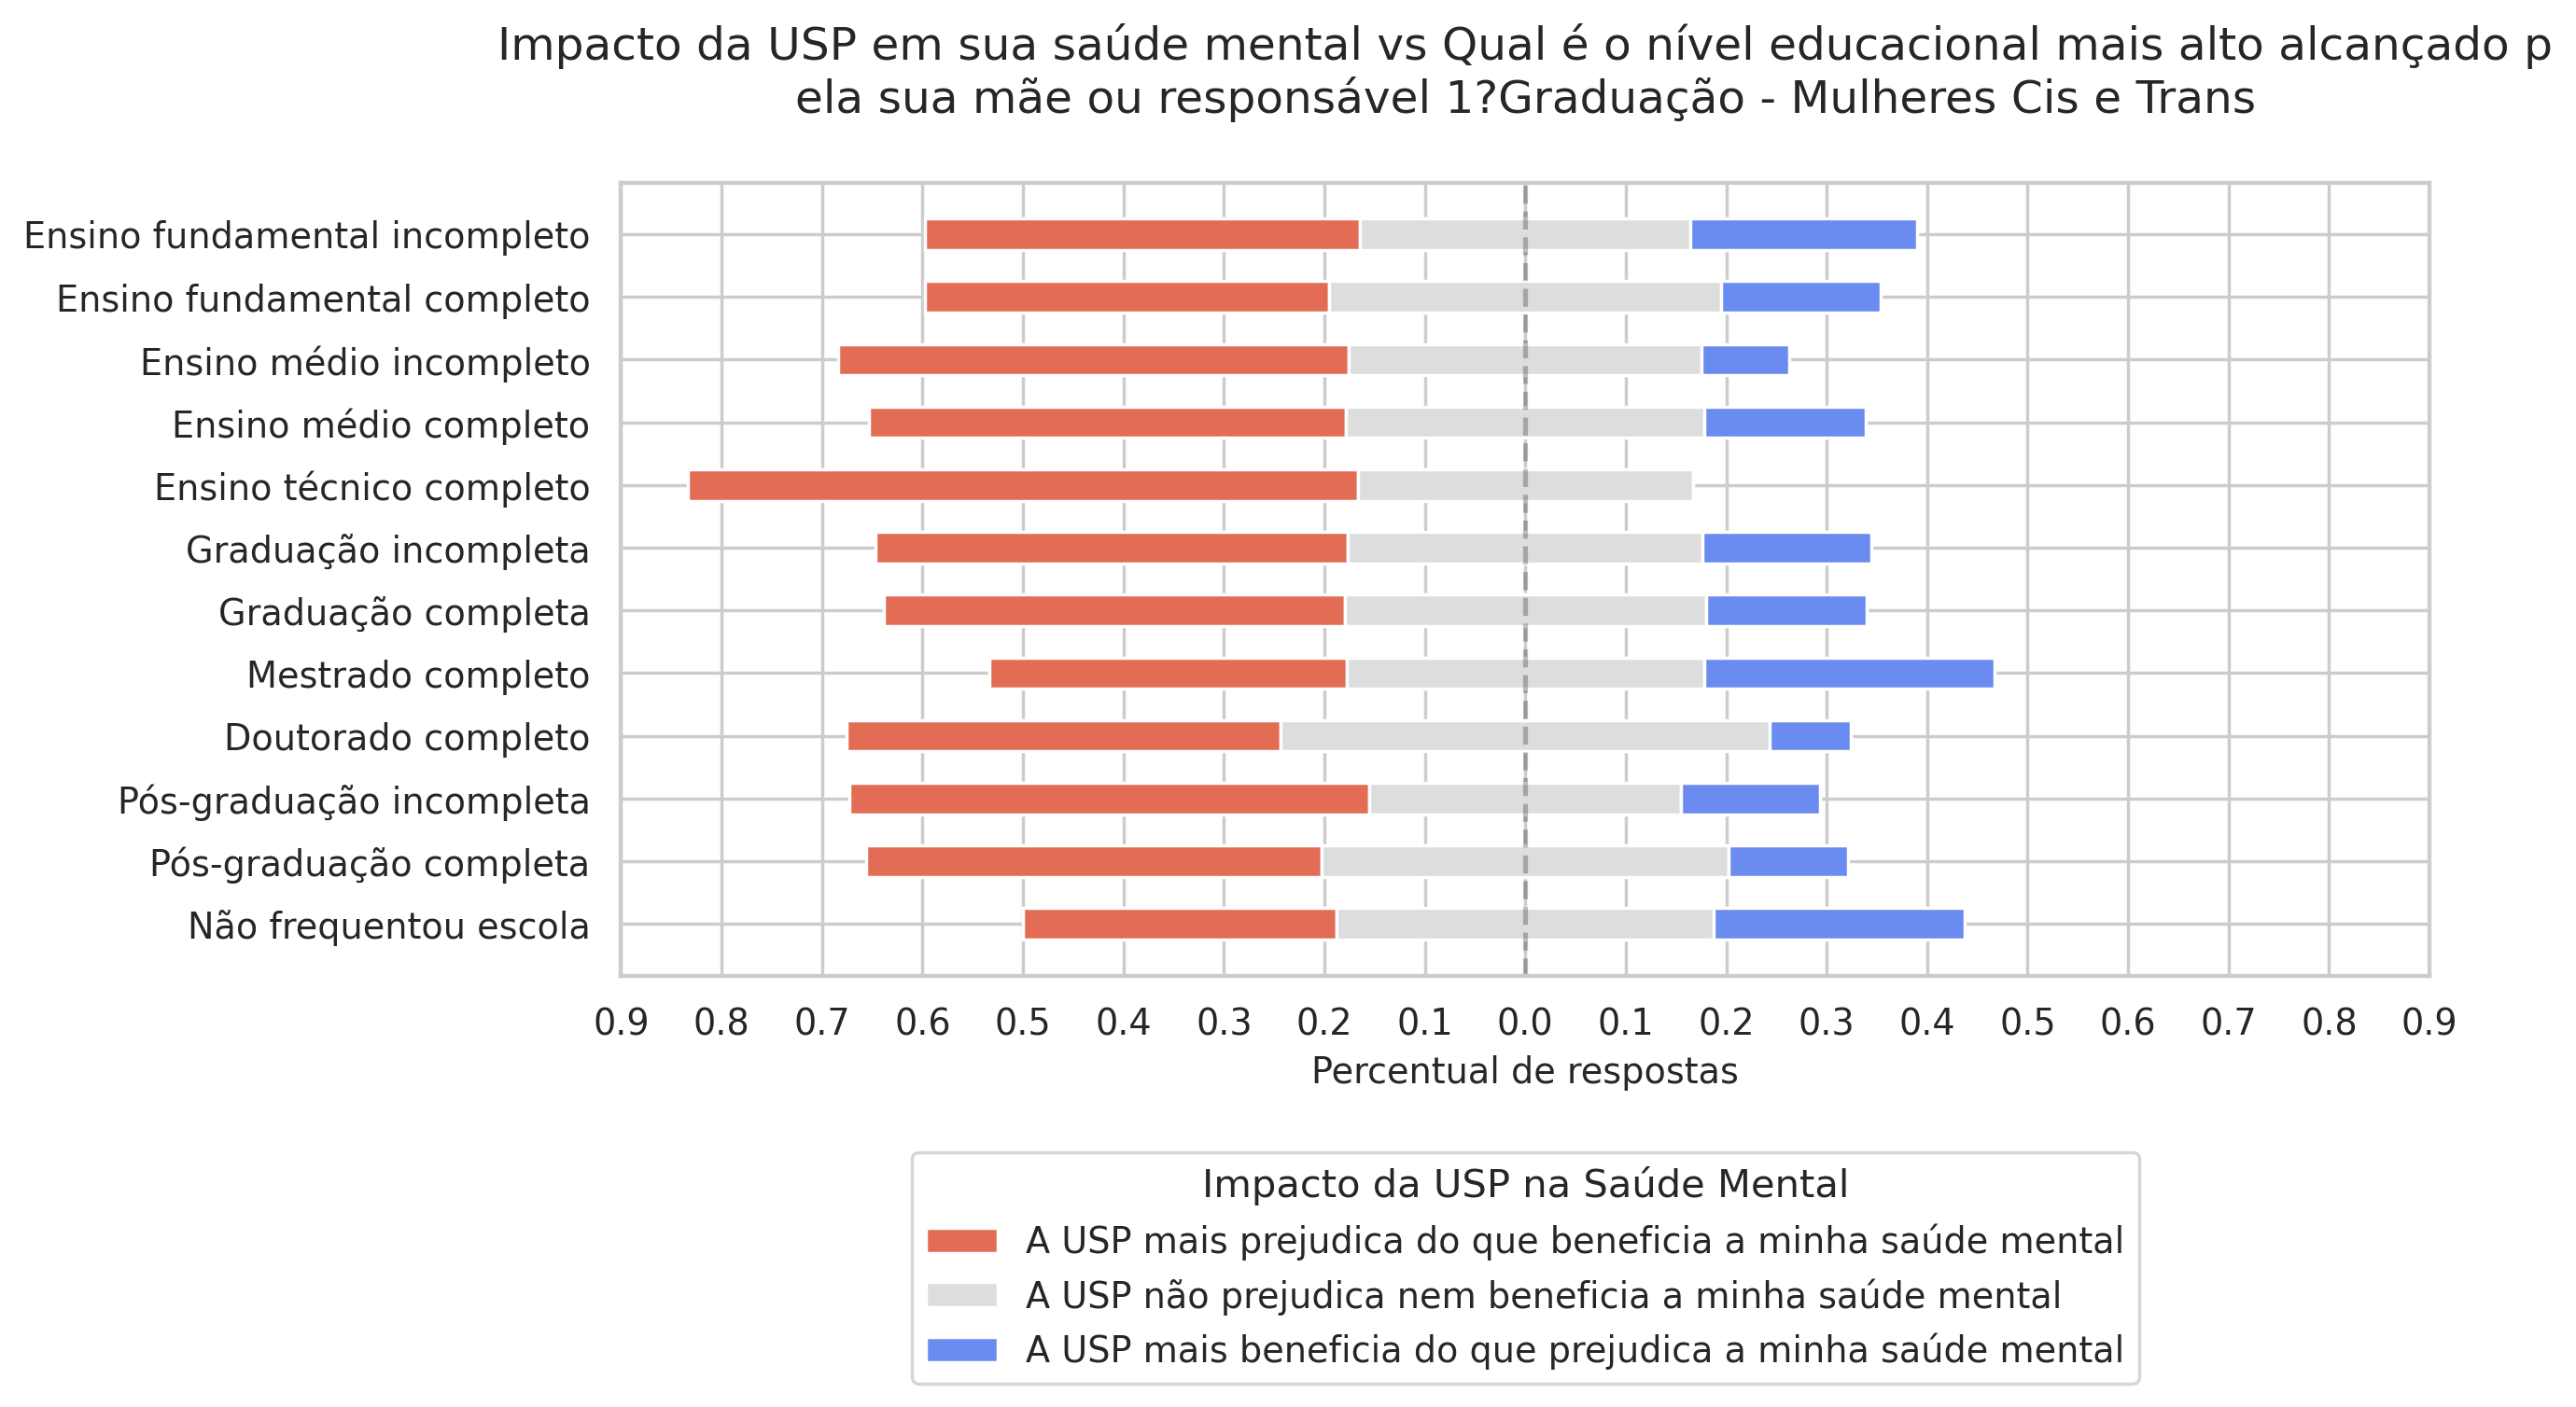

In [ ]:
df = tabcruzada_grad_a12m.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Qual é o nível educacional mais alto alcançado p\nela sua mãe ou responsável 1?Graduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

/tmp/ipykernel_6935/864916790.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Ensino fundamental incompleto',


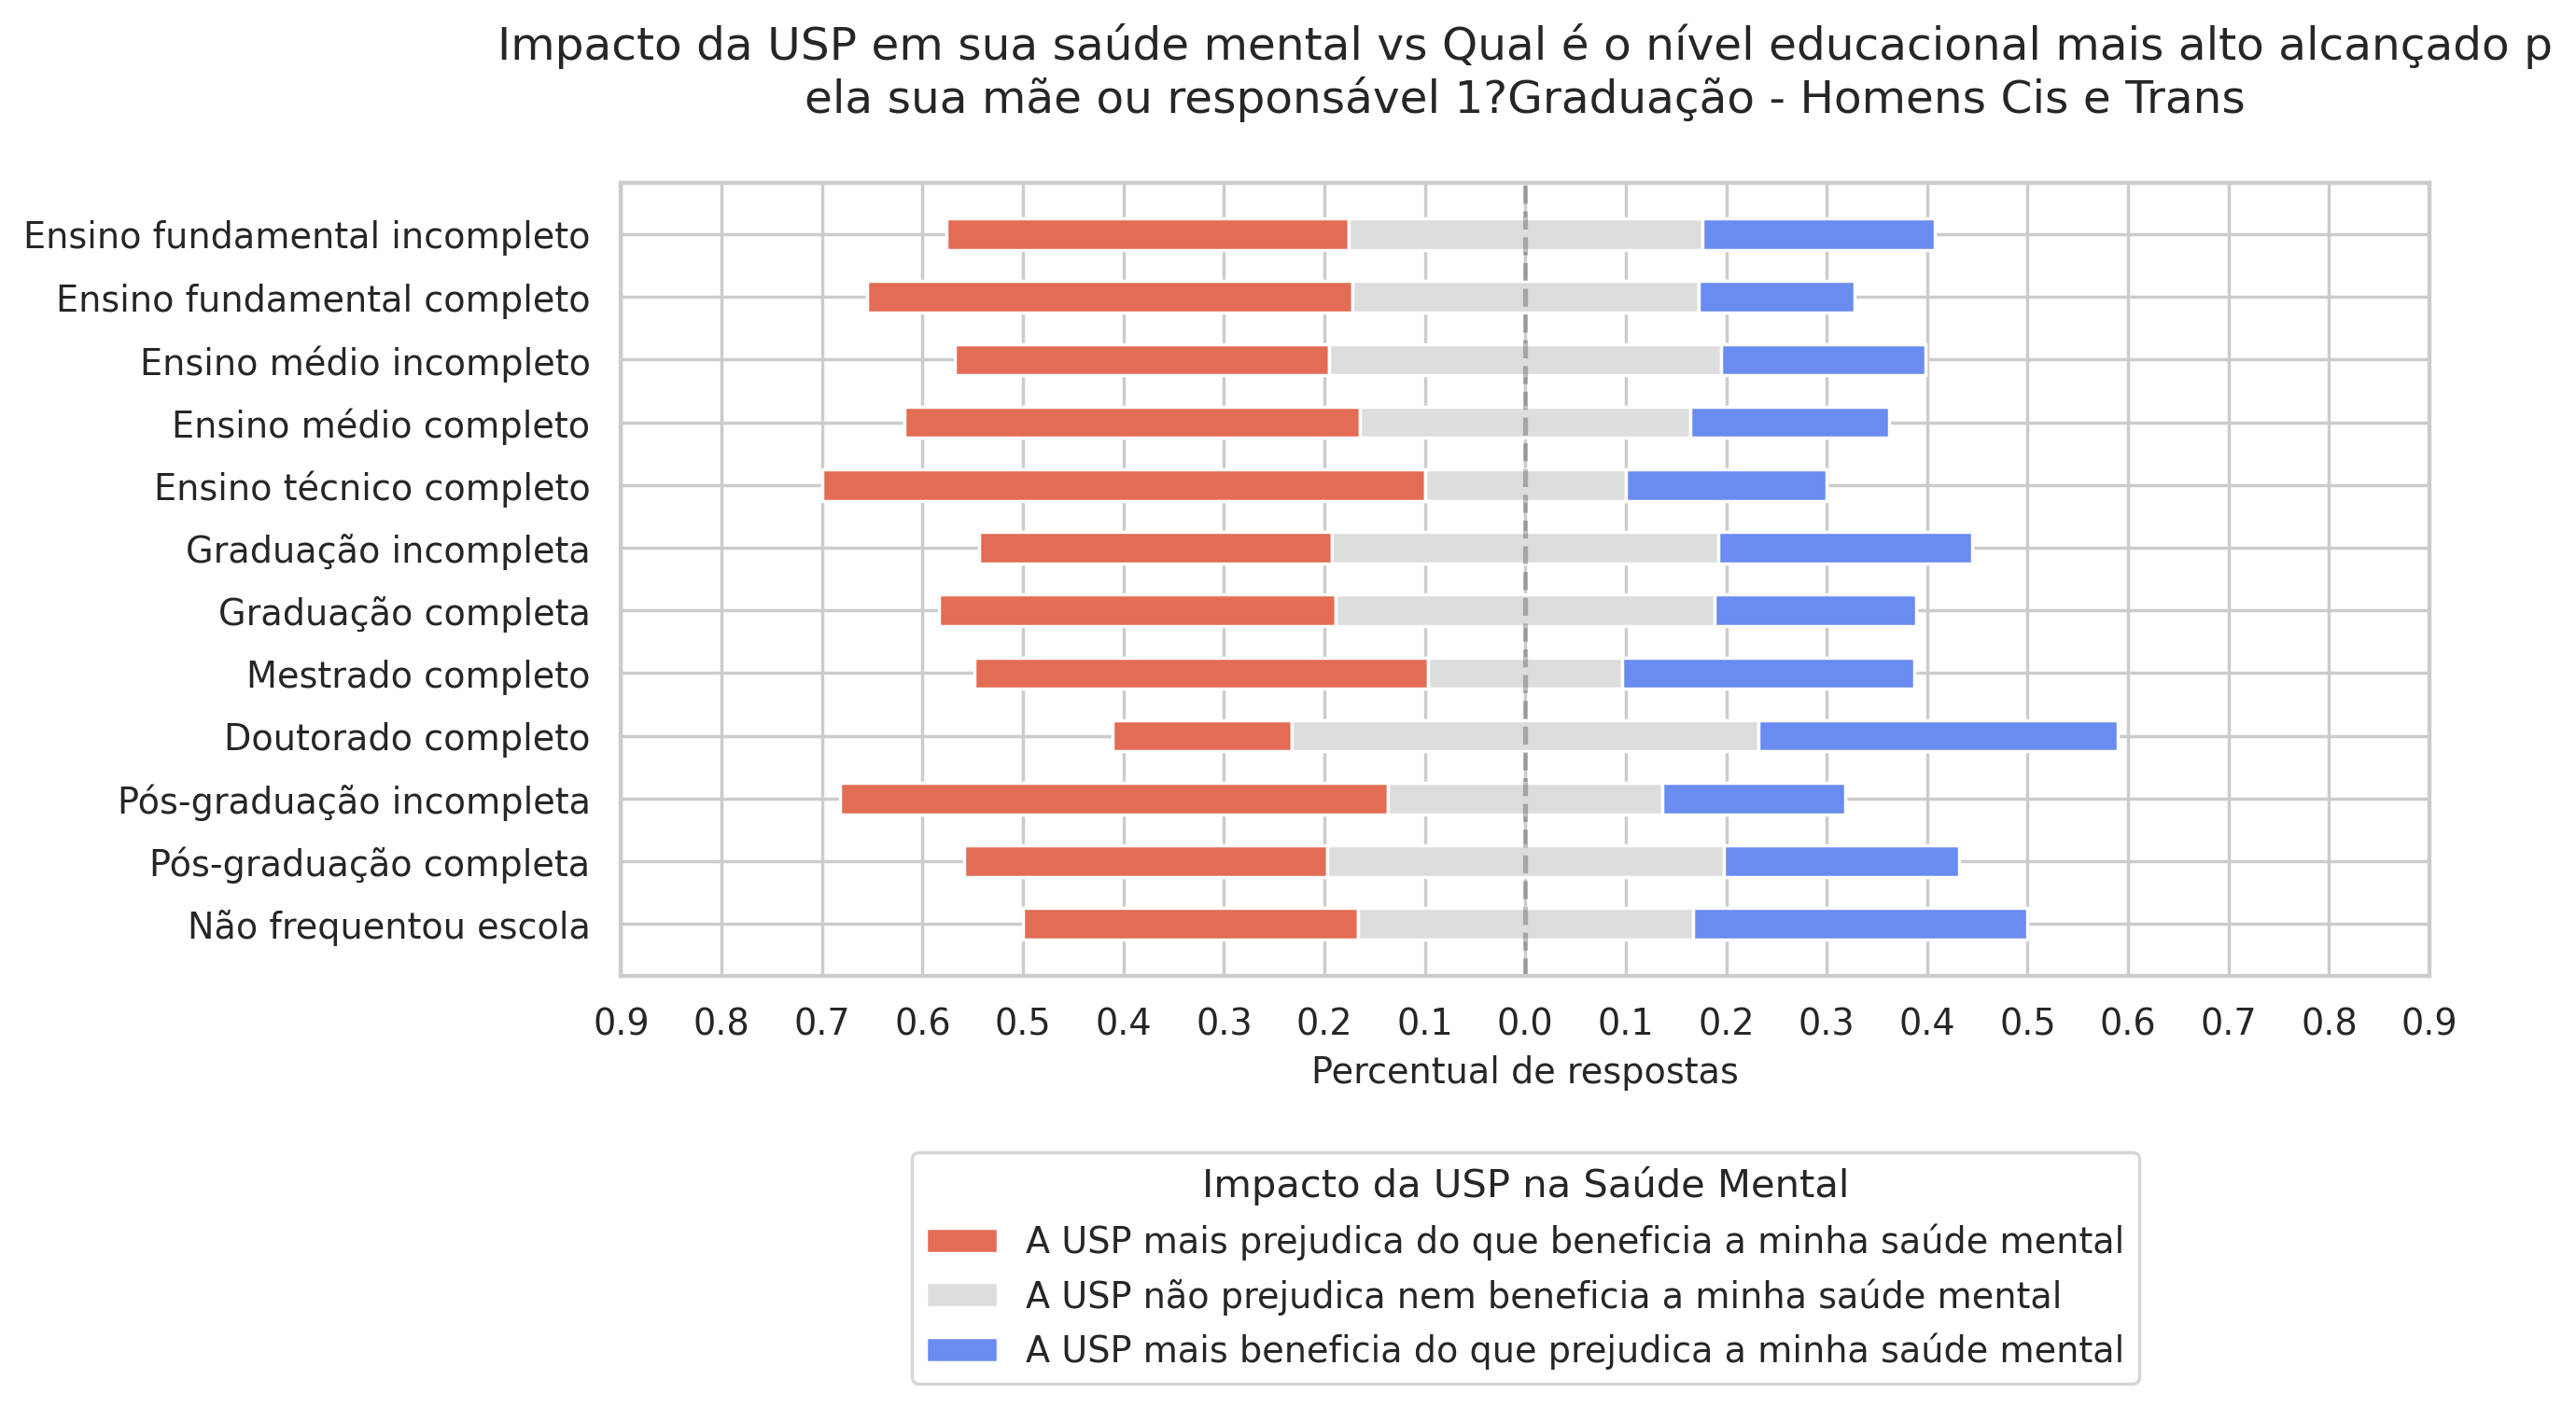

In [ ]:
df = tabcruzada_grad_a12h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Qual é o nível educacional mais alto alcançado p\nela sua mãe ou responsável 1?Graduação - Homens Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

# Análise 13:  Nível educacional mais alto responsável 2? vs Impacto da USP na Saúde Mental (Graduação).


In [ ]:
# Dicionário de mapeamento para as substituições
mapeamento = {
    'Técnico em enfermagem': 'Ensino técnico completo',
    'Ensino Médio e Técnico de Nível Médio completos': 'Ensino técnico completo',
    'Ensino médio Completo e Nível Técnico': 'Ensino técnico completo',
    'Supletivo + Ensino Técnico ': 'Ensino técnico completo',
    'Ensino técnico completo': 'Ensino técnico completo',
    'Ensino técnico de enfermagem ': 'Ensino técnico completo',
    'Ensino Tecnico em Enfermagem': 'Ensino técnico completo',
    'Magisterio': 'Ensino técnico completo',
    'Até o ano passado, nível médio incompleto. Agora, depois de mais de 20 anos sem estudar, ensino médio completo - porquê incentivei a realização da prova do Encceja.': 'Ensino médio completo',
    'Minha mãe e responsável legal é graduada em farmácia. Minha vó, com quem moro, tem ensino fundamental incompleto.': 'Graduação completa',
    'Ensino superior completo': 'Graduação completa',
    'Livre-docência ': 'Doutorado completo',
    'Ensino superior incompleto': 'Graduação incompleta',
    'Graduação': 'Graduação completa',
    'Mestrado':'Mestrado completo',
    'Doutorado':'Doutorado completo',
    'Técnico' : 'Ensino técnico completo',
    'Não sei' : 'Não se aplica',
    'Livre-docência' : 'Doutorado completo',
    'Ensino técnico' : 'Ensino técnico completo',
    'Residência de Urologia' : 'Graduação completa',
    'Alfabetização/mobral' : 'Ensino fundamental incompleto',
    'Ensino Técnico completo ' : 'Ensino técnico completo',
    'Técnico ' : 'Ensino técnico completo',
    'cursando ensino superior' : 'Ensino médio completo',
    'Nível médio e técnico ' : 'Ensino médio completo',
    'Ensino Técnico' : 'Ensino técnico completo',
    'Técnico em Enfermagem' : 'Ensino técnico completo',
    'Ensino Técnico ' : 'Ensino técnico completo',
    'Ensino técnico ' : 'Ensino técnico completo',
    '.' : 'Não se aplica',
    'minha avó morreu mas ela tinha o médio incompleto ' : 'Ensino médio incompleto',
    'Ensino técnico completo ' : 'Ensino técnico completo',
    'Mue pai faleceu em 2014, eu tenho 58 anos de idade.' : 'Não se aplica'
}

df_grad_mulheres['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'] = df_grad_mulheres['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'].replace(mapeamento)

df_grad_homens['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'] = df_grad_homens['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'].replace(mapeamento)

/tmp/ipykernel_6935/842803517.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_mulheres['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'] = df_grad_mulheres['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'].replace(mapeamento)
/tmp/ipykernel_6935/842803517.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad_homens['Qual é o nível educacional mais alto alc

In [ ]:
tabcruzada_grad_a13m = pd.crosstab(df_grad_mulheres['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a13m = tabcruzada_grad_a13m.astype(float)
tabcruzada_grad_a13m = tabcruzada_grad_a13m.reindex(index=['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'], columns=ordem_saude_mental)

tabcruzada_grad_a13m

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                0.462185            
Ensino fundamental completo                                                                                                                  0.486111            
Ensino médio incompleto                                                                                                                      0.428571            
Ensino médio completo                                                                                                                        0.484615            
Ensino técnico completo                                                                                                                      0.166667            
Graduação incompleta                                                                                                                         0.575758            
Graduação completa                                                                                                                           0.430052            
Mestrado completo                                                                                                                            0.381818            
Doutorado completo                                                                                                                           0.264706            
Pós-graduação incompleta                                                                                                                     0.384615            
Pós-graduação completa                                                                                                                       0.410714            
Não frequentou escola                                                                                                                        0.363636            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                0.365546                                                                     
Ensino fundamental completo                                                                                                                  0.375000                                                                     
Ensino médio incompleto                                                                                                                      0.357143                                                                     
Ensino médio completo                                                                                                                        0.346154                                                                     
Ensino técnico completo                                                                                                                      0.833333                                                                     
Graduação incompleta                                                                                                                         0.272727                                                 

In [ ]:
tabcruzada_grad_a13h = pd.crosstab(df_grad_mulheres['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'], df_grad_mulheres['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tabcruzada_grad_a13h = tabcruzada_grad_a13h.astype(float)
tabcruzada_grad_a13h = tabcruzada_grad_a13h.reindex(index=['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'], columns=ordem_saude_mental)

tabcruzada_grad_a13h

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                0.462185            
Ensino fundamental completo                                                                                                                  0.486111            
Ensino médio incompleto                                                                                                                      0.428571            
Ensino médio completo                                                                                                                        0.484615            
Ensino técnico completo                                                                                                                      0.166667            
Graduação incompleta                                                                                                                         0.575758            
Graduação completa                                                                                                                           0.430052            
Mestrado completo                                                                                                                            0.381818            
Doutorado completo                                                                                                                           0.264706            
Pós-graduação incompleta                                                                                                                     0.384615            
Pós-graduação completa                                                                                                                       0.410714            
Não frequentou escola                                                                                                                        0.363636            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                0.365546                                                                     
Ensino fundamental completo                                                                                                                  0.375000                                                                     
Ensino médio incompleto                                                                                                                      0.357143                                                                     
Ensino médio completo                                                                                                                        0.346154                                                                     
Ensino técnico completo                                                                                                                      0.833333                                                                     
Graduação incompleta                                                                                                                         0.272727                                                 

### Plot likert

/tmp/ipykernel_6935/747648434.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Ensino fundamental incompleto',


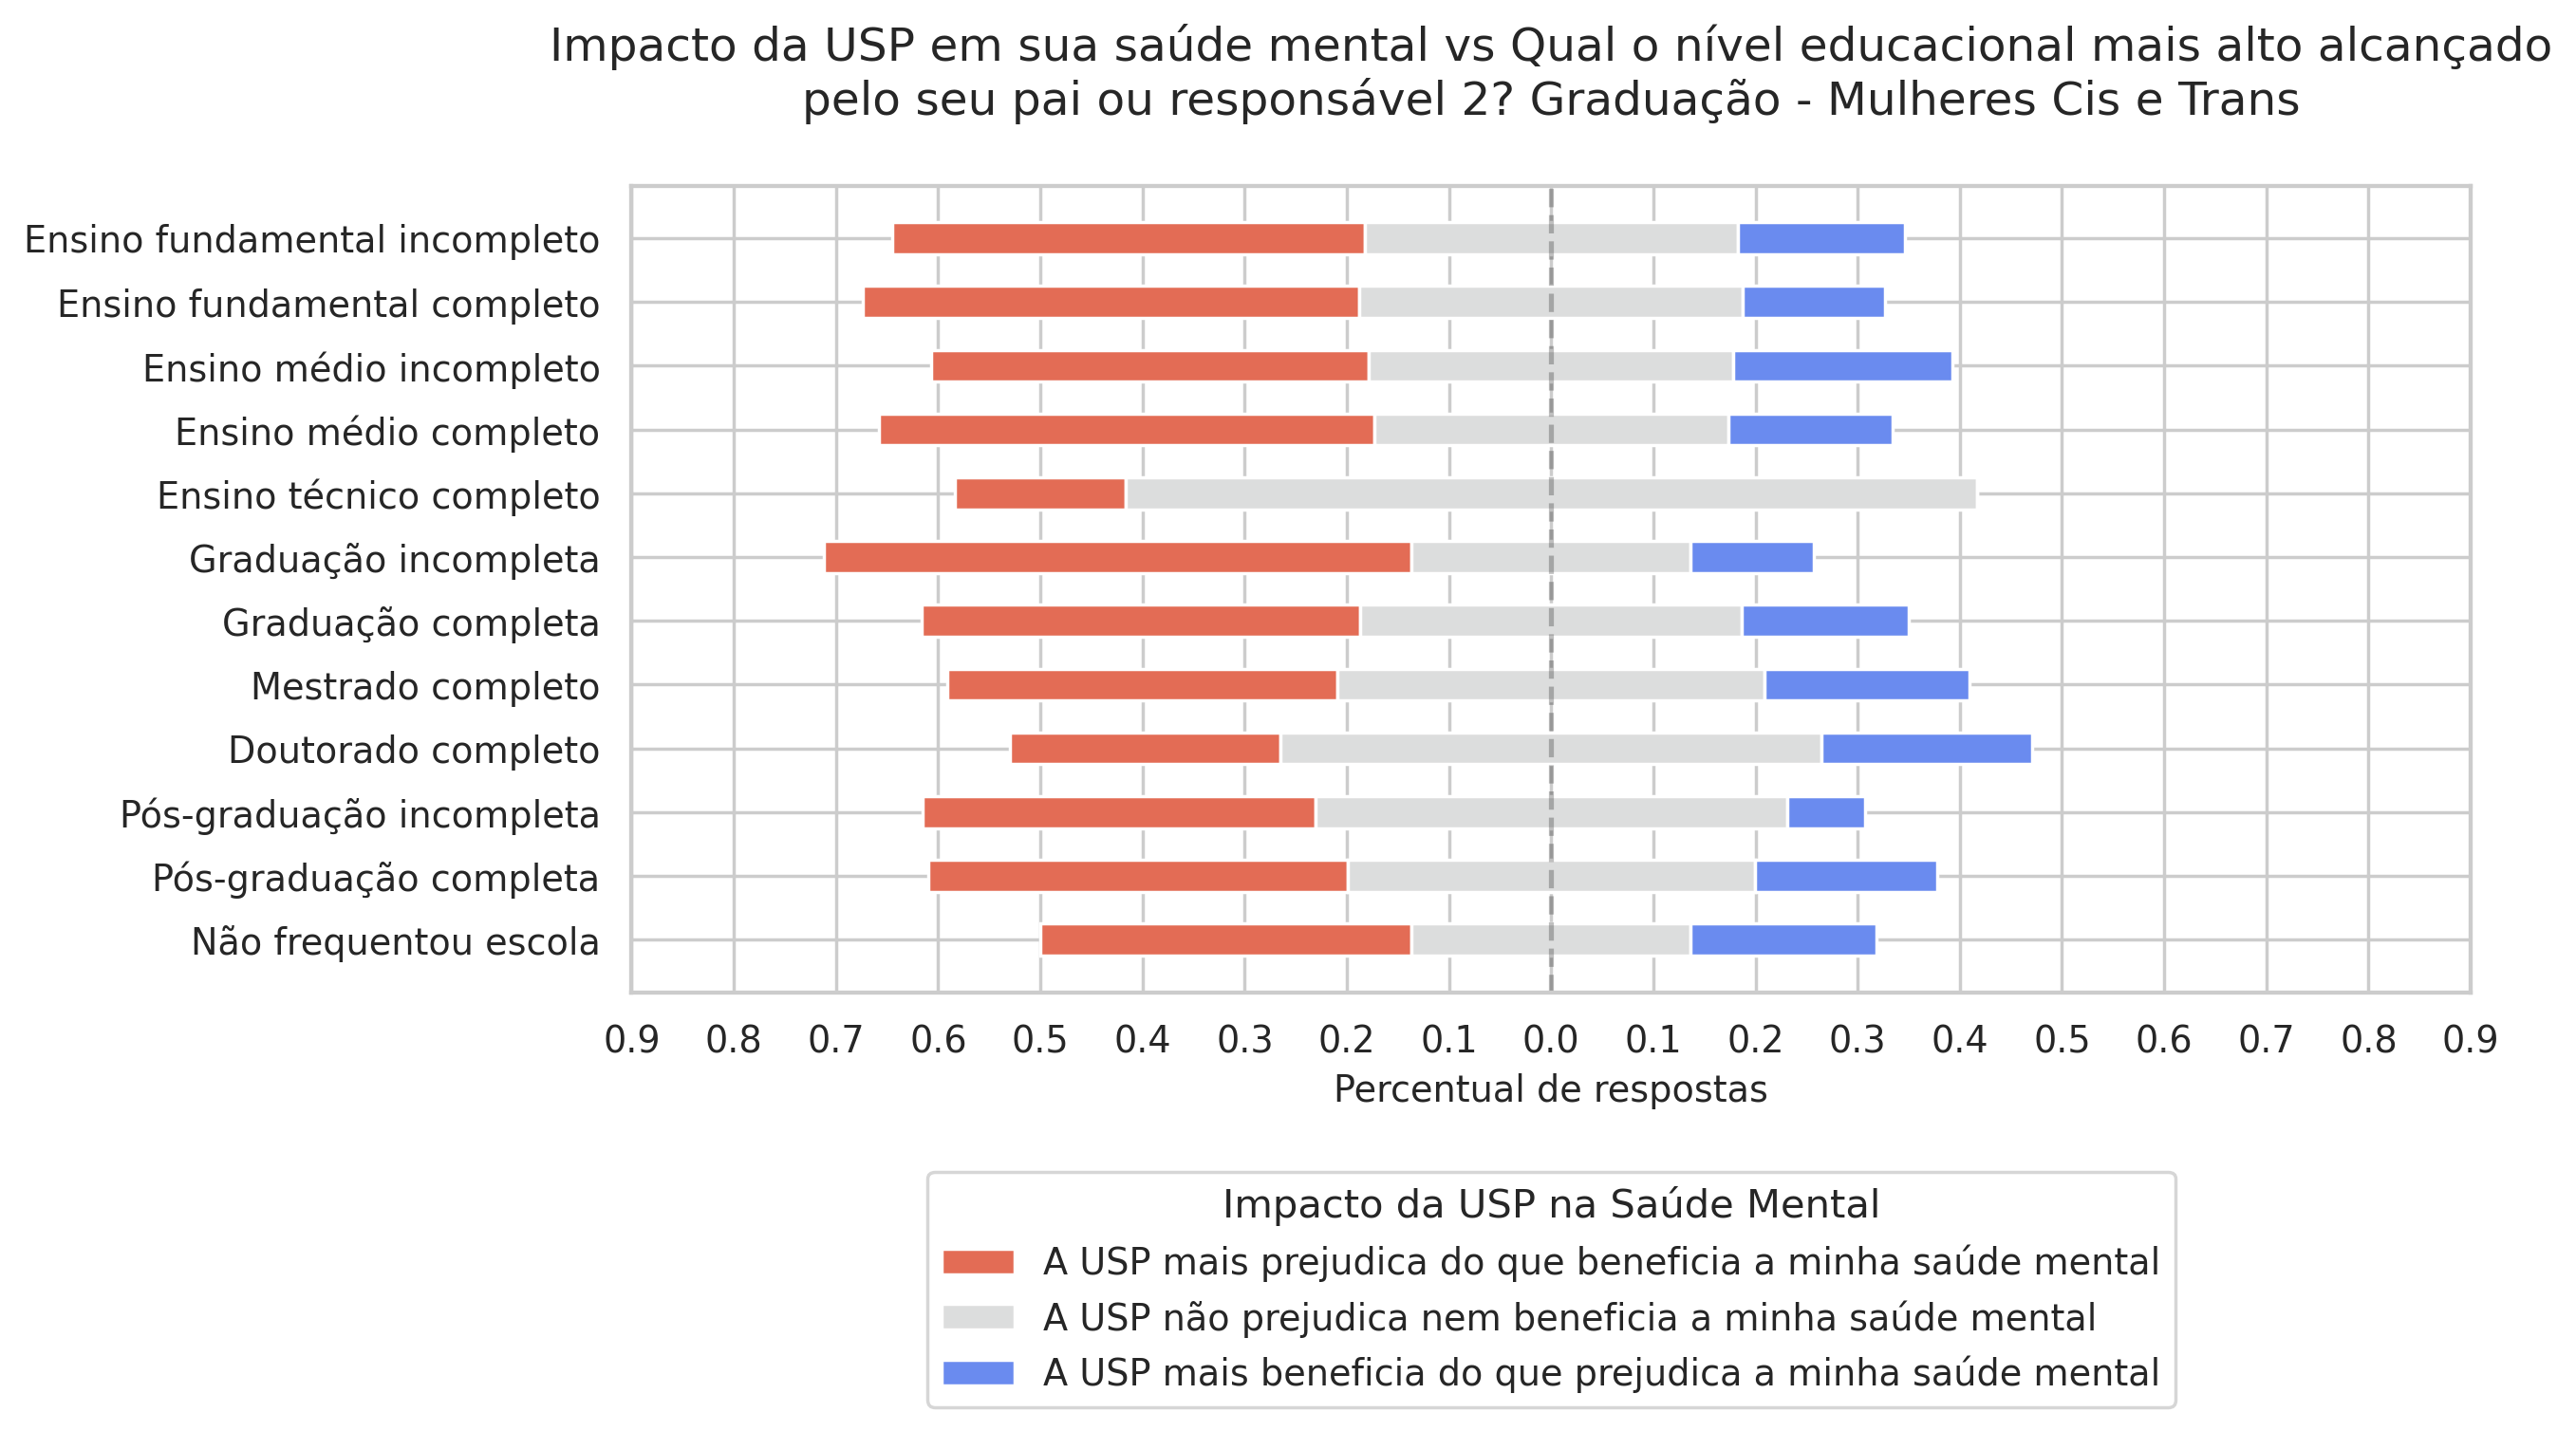

In [ ]:
df = tabcruzada_grad_a13h.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

ax.set_title('Impacto da USP em sua saúde mental vs Qual o nível educacional mais alto alcançado\npelo seu pai ou responsável 2? Graduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()